# Capstone Project: Ted Talk View Count Prediction using Features

**Data science process demonstrated:**
- Data Cleaning
- Natural Language Processing (WordCloud, Tokenization, TfidfVectorizer, Countvectorizer)
- Visualization
- SelectKBest feature selection
- Confusion Matrix
- Classification Modeling
- Recommender


## Problem Statement

In this project, we analyse the [Ted Talk kaggle dataset](urlhttps://www.kaggle.com/thegupta/ted-talk) which was obtained through webscraping the TED homepage, to determine what features affects the view count of TED talks. Through the development of selected best model - logistic classification model, the view count of TED talks will be predicted using various features (variables) of TED talks from the [Ted Talk dataset](urlhttps://www.kaggle.com/thegupta/ted-talk).

This is a binary classification problem which predicts whether a TED talk is popular and unpopular based on its features.

**Questions that we need to answer:**
- Which features makes a TED talk popular?
- Based on the features, can we tell a TED talk video is popular or unpopular?

**Types of models that will be developed:**
- Logistic Regression with or without Tfidf and cvec
- Multinomial Naive Bayes with Tfidf and cvec
- Random Forest Classifier
- KNeighborsClassifier
- Support Vector Classifier

I am a data scientist working in TED organization. My aim of this project is provide a useful prediction model for our primary stakeholder, TED organization fundraising and marketing department. TED organization is a non profit corporation, to foster the spread of great ideas and spark conversation. Through conference attendance fees, sponsorships, foundation support, licensing fees and book sales, TED raise funds for video editing, web development and hosting for TED Talks, supporting extraordinary new voices as they develop their careers in science, arts, social justice and of course, The Audacious Project. The Audacious Project is a collaborative funding initiative between TED and non-profits that convenes funders and social entrepreneurs in order to scale solutions to the world's most urgent challenges.

TED fundrising department can make use of my model to determine whether a particular talk is popular or unpopular, thereby adjust their fundrising strategy. Also, by knowing factors that will affect/increase view count, TED can invite/advise the speakers accordingly.

Secondary stakholders will be TED speakers to predict view count for their existing or upcoming TED videos, providing useful insights on the effect of different features on view count through our model. TED speakers can adjust their their talk according to what is popular, to increase the outreach of their ideas.

Success of the model will be evaluated based on classification accuracy. Best model will have the least difference in classification accuracy between the training and test dataset. This is to ensure no overfitting and model can still perform upon applying to unseen data. The model is then further interpreted using confusion matrix parameters.


## Executive Summary

The project evaluates what features make a TED talk popular. The top features identified during initial exploratory data analysis showed that comment count, month year has strong correlation to view count. Whereas sentiments and content of transcripts has weak correlation to view count. These findings helped me built my best predictive model (Logistic Regression classifier) to classify a TED talk as popular or unpopular. Accuracy score to be 75%, 0% overfit, with the following parameters:
- C=1
- penalty = l2
- random state = 42

The model demostrates moderately good accuarcy of popularity prediction and has 0% overfit. From there, I found out which are the top predictive features of a popular TED talk. They are:
- comment count
- video age
- number of download languages
- duration
- leadership tag
- happiness tag
- whether it is a ted original video (animated)
- Number of subtitled videos

In a nutshell, characteristics of a popular TED talk is highly commented, published recently, 8 to 16 min long, high number of download languages, non-animated videos, low in number of subtitle language, likely to be about leadership, happiness and success. 

Paired with the domain knowledge of how these features associate with view count, myself, a Data Scientists in TED can now make use of the model, to recommend primary stakeholders from TED fundraising/marketing department and TED speakers to make adjustment to their talks accordingly. This production model can serve as a recommendation so that great ideas can reach out to more people and more funds can be raised to support solutions that are challenging to accomplish. It is therefore a good solution for TED fundraising department and speakers. 

We evaluate the success by choosing a model with the lowest difference in classification accuracy between test and training dataset. By interpreting the confusion metric, we can tell how the features predicts whether a TED talk is popular or unpopular.

On a sidenote, view count based on transcripts and sentiments are less promising. Modeling results and EDA shows that unpopular and popular TED talks have very similar sentiments, which are opinionated and positive. Transcript wise, best model is Naive Bayes + Tfidf achieved 63.1% score on unseen data. This result is not promising because based on EDA and modeling, important words used for popular and unpopular words are similar. They are 'one', 'knowledge', 'think', 'people'. This can be observed from the model coefficients generated, they were all negative. Meaning, no words can predict a unpopular TED talk. The sentiments and transcripts modeling result is however, understandable. Popular and unpopular TED talks all aligned with TED's vision, which is foster the spread of great ideas. It aims to provide a platform for thinkers, visionaries and teachers, so that people around the globe can gain a better understanding of the biggest issues faced by the world, and feed a desire to help create a better future. 

Areas for primary stakeholders (TED organisation fundraising and marketing department):
- Publish less animated videos and focus in more physical human presentations
- Invite more leaders for light hearted talks.
- Increase the number of embedded subtitles as subtitles are usually stored on a separate file.
- Decrease the number of subtitled videos as most non native englishing public prefers to download the video and watch offline (see previous point).

Areas for secondary stakeholders (TED speakers):
- TED speakers can consider my model and make adjustment to their presentation style.

Areas for data scientist's future expansion and future exploration:
- Expand recommender to that applies Collaborative filtering, which is find users who are similar and recommend what they like (user-based). Currently this method is not used by TED, hence great value for exploration.
- Increase the description or attributions from the items the user has interacted to recommend similar items. Examples, year published, speaker, duration, rather than just title alone.
- Evaluate recommender statistically
- Explore depolyment of recommender
- Moving forward, the model can be continuously improved by introducing more new data to it. Currently there is only 4000~ ted talk features. This can be increased as more TED talks were published.
- Other features eg comment content, number of words in the transcripts, speed of the speakers, gender of the speakers to be included into the dataset.
- Since TED is about supporting world's challenging issues, we can expand the model to predict the view count of challenging or less challenging issues.
- Since one of the feature is comment count, we can analyze deeper to see what are the factors that will trigger more comments and discussion of the public. When number comments increases, more people will go and view the video.
- Therefore, data scientist in TED organisation can consider predicting view count using viewer profiles information collected. 
 

## Content
- [Problem Statement](#Problem-Statement)
- [Executive Summary](#Executive-Summary)
- [Data Inspection](#Data-Inspection)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
- [Modeling Evaluation](#Modeling-Evaluation)
- [Developing a content based TED talk Recommender System](#Developing-a-content-based-TED-talk-Recommender-System)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)

In [1]:
# imports

# for maths
import numpy as np
import pandas as pd
from scipy.stats import mode
import itertools
import datetime as dt

# For visuals
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

# text cleaning
import regex as re
import string # for punctuation removal

# display data
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 500
pd.set_option('display.max_colwidth', None) # set full view to inspect text

# text analysis
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Preprocessing and modeling
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from tabulate import tabulate
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Recommender
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# warnings
import warnings
warnings.filterwarnings("ignore")

## Data Inspection

**The Dataset**\
Original dataset was found in [2017 Ted Talk Kaggle](urlhttps://www.kaggle.com/rounakbanik/ted-talks), it consists of 2550 transcripts, a total of 19 columns of perfectly cleaned data with no null values. I thought the data was pretty backdated and decided to start webscraping through [Talk talk website](urlhttps://www.ted.com/talks). During the webscraping processing, I actually found out that someone already webscraped it before me, in June 24 this year and posted it on [2020 June Ted Talk Kaggle dataset](urlhttps://www.kaggle.com/thegupta/ted-talk). This new dataset consist of 4609 transcripts, 52 variables with 27,574 missing values, 0 duplicates, from 2006 July to 2020 June. It is huge and not yet attempted by anyone other than the dataset author who did some analysis.

**Transcripts**\
As the transcript size is huge, I decided to create another notebook [2_Ted Talk View Count Prediction using Transcipts](2_transcript_viewcount_prediction.ipynb) for view count prediction and sentiment analysis focusing on transcripts only. The rest of the text eg topics, speaker description and categorical, numerical data will be analyzed in this notebook.

In [2]:
# import dataset
ted_talk = pd.read_csv('../dataset/TED_Talk.csv')

In [3]:
# display top rows of the dataset
ted_talk.head(1)

talk__id                   talk__name  \
0        66  Do schools kill creativity?   

                                                                                                                                       talk__description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.   

   view_count  comment_count  duration  \
0    65678748         4952.0      1164   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [4]:
# check for duplicates
print("There are", ted_talk.duplicated().sum(), "duplicates for TED_Talk.csv")

There are 0 duplicates for TED_Talk.csv


In [5]:
# Display the number of columns and rows in the dataset
print("There are", len(ted_talk), "ted talk entries")
print("There are", ted_talk.shape[1], "columns in Ted Talk dataset")

There are 4609 ted talk entries
There are 52 columns in Ted Talk dataset


In [6]:
# Display the list of columns
ted_talk.columns

Index(['talk__id', 'talk__name', 'talk__description', 'view_count',
       'comment_count', 'duration', 'transcript', 'video_type_name', 'event',
       'number_of__speakers', 'speaker__id', 'speaker__name',
       'speaker__description', 'speaker__who_he_is', 'speaker__why_listen',
       'speaker__what_others_say', 'speaker__is_published',
       'all_speakers_details', 'is_talk_featured', 'has_talk_citation',
       'recording_date', 'published_timestamp', 'talks__tags',
       'number_of__tags', 'language', 'native_language', 'language_swap',
       'is_subtitle_required', 'url__webpage', 'url__audio', 'url__video',
       'url__photo__talk', 'url__photo__speaker', 'url__subtitled_videos',
       'number_of__subtitled_videos', 'talk__download_languages',
       'number_of__talk__download_languages', 'talk__more_resources',
       'number_of__talk__more_resources', 'talk__recommendations__blurb',
       'talk__recommendations', 'number_of__talk__recommendations',
       'related_tal

In [7]:
# Check data types
ted_talk.info()
# There are many null values. Need to investigate on null values
# Need to analyze 'published_timestamp', 'transcript' separately

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 52 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   talk__id                                           4609 non-null   int64  
 1   talk__name                                         4609 non-null   object 
 2   talk__description                                  4609 non-null   object 
 3   view_count                                         4609 non-null   int64  
 4   comment_count                                      3465 non-null   float64
 5   duration                                           4609 non-null   int64  
 6   transcript                                         4091 non-null   object 
 7   video_type_name                                    4609 non-null   object 
 8   event                                              4609 non-null   object 
 9   number_o

In [8]:
# Compute number of columns with missing values for TED_Talk.csv
null_col = ted_talk.isnull().sum().sort_values(ascending = False)
print("Number of columns with missing values: ", null_col[null_col > 0].count())

# Display column names with its number of missing values for TED_Talk.csv
print("Display column names with its number of missing values as below:")
print(null_col[null_col > 0])

Number of columns with missing values:  22
Display column names with its number of missing values as below:
talk__recommendations__blurb                         3604
talk__recommendations                                3604
speaker__what_others_say                             3230
talks__take_action                                   2510
has_talk_citation                                    2510
talk__more_resources                                 2510
url__audio                                           1928
url__subtitled_videos                                1250
comment_count                                        1144
speaker__why_listen                                  1020
url__video                                            992
url__photo__speaker                                   834
speaker__description                                  616
speaker__who_he_is                                    550
transcript                                            518
talks__player_talks__r

## Data Cleaning

- Null values which data cannot be found via the TED website will be dropped.
- High null values columns will be dropped.
- Important features null values or outliers due to inaccurate data, such as view count, number of speakers will be imputed using mode or interpolate.

**Drop transcript as it was analyszed in another notebook**\
As mentioned previously, transcript was dropped and analyzed in another notebook [2_TED talk view count prediction using transcripts](urlView_count_prediction_using_ted_talk_transcripts.ipynb)

In [9]:
# Drop transcript column
ted_talk = ted_talk.drop(['transcript'], axis=1)

**urls for photos, audio and subtitled videos will be dropped due to high number of null values and I am not analyzing photos and videos**

In [10]:
#Since I am not analyzing any photos, audio. These columns can be dropped
ted_talk[['url__audio', 'url__photo__talk', 'url__photo__speaker', 'url__subtitled_videos', 'url__video']].head(1)

url__audio  \
0  https://download.ted.com/talks/SirKenRobinson_2006.mp3?apikey=acme-roadrunner   

                                                                          url__photo__talk  \
0  https://pe.tedcdn.com/images/ted/6b6eb940bceab359ca676a9b486aae475c1df883_2880x1620.jpg   

                                 url__photo__speaker  \
0  https://pe.tedcdn.com/images/ted/1465_254x191.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [11]:
# However, I Will keep url for url__webpage as there is no null values in this column

ted_talk = ted_talk.drop(['url__audio', 'url__photo__talk', 'url__photo__speaker', 'url__subtitled_videos', \
                          'url__video'], axis=1)

**talks__take_action, has_talk_citation, talk__more_resources columns**

In [12]:
# Study 'talks__take_action', 'has_talk_citation', 'talk__more_resources'

ted_talk[['speaker__name', 'talk__name', 'talks__take_action', 'has_talk_citation', 'talk__more_resources']].\
sort_values(by=['talks__take_action'], ascending = False).head()

# After inspection, they were deemed as not useful data 
# As there are many missing values in these columns and consist of mainly hyperlinks

speaker__name  \
273    Greta Thunberg   
2547       Todd Scott   
1090  Chad Frischmann   
943      Lindsay Amer   
1578      Sara DeWitt   

                                                          talk__name  \
273            The disarming case to act right now on climate change   
2547                 An intergalactic guide to using a defibrillator   
1090                         100 solutions to reverse global warming   
943                Why kids need to learn about gender and sexuality   
1578  3 fears about screen time for kids -- and why they're not true   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               talks__take_action  \
273      [{'status': 'approved', 'blurb': 'Wherever you are, no matter your age, **join me in my climate strike.** Sit outside your parliament or local government building every Friday until your country is on a safe pathway to being well below the two-degree Celsius warming target.', 'link_url': 'https://www.fridaysforfuture.org/', 'visible_url': 'fridaysforfuture.org', 'start_at': None, 'end_at': None, 'published': True, 'eyebrow': '', 'type': 'take_action', 'verb': 'participate'}, {'status': 'approved', 'blurb': '**Follow** Greta Thunberg on Twitter.', 'link_url': 'https://twitter.com/GretaThunberg', 'visible_url': '@GretaThunberg', 'start_at': None, 'end_at': None, 'published': True, 'eyebrow': '', 'type': 'take_action', 'verb': 'follow'}]   
2547  [{'status': 'approved', 'blurb': 'When you\'re out in public (malls, sports stadiums, the office) **play the game of figuring out where the publicly available AED is.** Sometimes it can be harder than finding Waldo. (Maybe he has it?) If you can\'t find it, ASK! If they don\'t have one, ask, "WHY NOT!?" These devices save lives, and when seconds do matter, having them hidden away is hurting more than helping. (I bet you will see more than 20 fire extinguishers to every AED you see.)', 'link_url': 'https://resuscitation.heartandstroke.ca/sites/default/files/downloads/AED_WhoseLife_ENG.pdf', 'visible_url': 'heartandstroke.ca', 'start_at': None, 'end_at': None, 'published': True, 'eyebrow': '', 'type': 'take_action', 'verb': 'participate'}]   
1090                                                                                                                                                                                                                                                                                                                                                                                                 [{'status': 'approved', 'blurb': 'We all can be contributors to reversing global warming and creating the future we want. Learn more about the solutions you can make happen.', 'link_url': 'https://www.drawdown.org/', 'visible_url': 'drawdown.org', 'start_at': None, 'end_at': None, 'published': True, 'eyebrow': None, 'type': 'take_action', 'verb': 'participate'}]   
943                                                                                                                                                                 [{'status': 'approved', 'blurb': 'Watch Lindsay’s web series "Queer Kid Stuff."', 'link_url': 'https://www.youtube.com/c/queerkidstuff', 'visible_url': 'youtube.com/queerkidstuff', 'start_at': None, 'end_at': None, 'published': True

In [13]:
# dropped 'talks__take_action', 'has_talk_citation', 'talk__more_resources' columns
ted_talk = ted_talk.drop(['talks__take_action', 'has_talk_citation', 'talk__more_resources'], axis=1)

**talks__player_talks__resources__h264__00__bitrate, external__start_time, which consist of unbalance categories**

In [14]:
# To drop 'talks__player_talks__resources__h264__00__bitrate' and 'external__start_time' columns as most of the data is
# under 180 and 0 category respectively. No co-relation can be observed from this kind of distribution.

print(ted_talk['talks__player_talks__resources__h264__00__bitrate'].value_counts())
print("")
print("")
print(ted_talk['external__start_time'].value_counts())

180.0    4102
320.0      34
600.0       1
Name: talks__player_talks__resources__h264__00__bitrate, dtype: int64


0.0      4471
94.0        1
267.0       1
310.0       1
221.0       1
385.0       1
628.0       1
15.0        1
20.0        1
40.0        1
Name: external__start_time, dtype: int64


In [15]:
# drop 'talks__take_action', 'has_talk_citation', 'talk__more_resources' columns
ted_talk = ted_talk.drop(['talks__player_talks__resources__h264__00__bitrate', 'external__start_time'], axis=1)

**Recommendation, speaker__what_others_say, speaker related columns**

- The recommendation columns are mostly null values or books/videos outside TED homepage, hence I decided to make a simple ted talk video recommender and drop the above 2 columns instead. 
- Existing [TED recommender](urlhttps://www.ted.com/recommends) at the website allows user to personally select recommended TED Talks, based on interests and motivations. TED homepage recommender also has the capability to fine tune recommendations based on users' previous watched videos. I see a demand for recommender in this area. Thus, I built a simple recommender at the end of this project [Developing a content based TED talk Recommender System](#Developing-a-content-based-TED-talk-Recommender-System) that is based ted talk titles selected by users.

In [16]:
# display recommendations related columns
ted_talk[['talk__name', 'talk__recommendations', 'talk__recommendations__blurb']].head()

talk__name  \
0                        Do schools kill creativity?   
1  This is what happens when you reply to spam email   
2           Your body language may shape who you are   
3                   How great leaders inspire action   
4                         The power of vulnerability   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [17]:
# drop 'talk__recommendations', 'talk__recommendations__blurb' as deemed not useful for view count prediction
ted_talk = ted_talk.drop(['talk__recommendations', 'talk__recommendations__blurb'], axis=1)

In [18]:
# display ted talk related talks
ted_talk['related_talks'].head(2)

0    [{'id': '865', 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Sir Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_learning_revolution', 'viewed_count': 9404739}, {'id': '1738', 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Sir Ken Robinson', 'title': "How to escape education's death valley", 'duration': 1151, 'slug': 'sir_ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 10179741}, {'id': '2276', 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 2176523}, {'id': '2182', 'hero': 'https://pe.tedcdn.com/images/ted/07ece83dd77f758dd2c92e3fcb0

In [19]:
# Drop the related talks since it is all hyperlinks
ted_talk = ted_talk.drop(['related_talks'], axis=1)

In [20]:
# drop 'speaker__what_others_say' as deemed not useful for view count prediction and there is 3230 null values
ted_talk = ted_talk.drop(['speaker__what_others_say'], axis=1)

**Comment count**
- Interpolate null comment counts

In [21]:
# plot the scatter plots to investigate continueous datas
def scatterplot(dataframe, list_of_columns):
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(y=dataframe.view_count, x=dataframe[column]).set_title(column + " and View count comparison",\
                                                                           fontsize=14)
        # Set titles, labels, etc here for each subplot

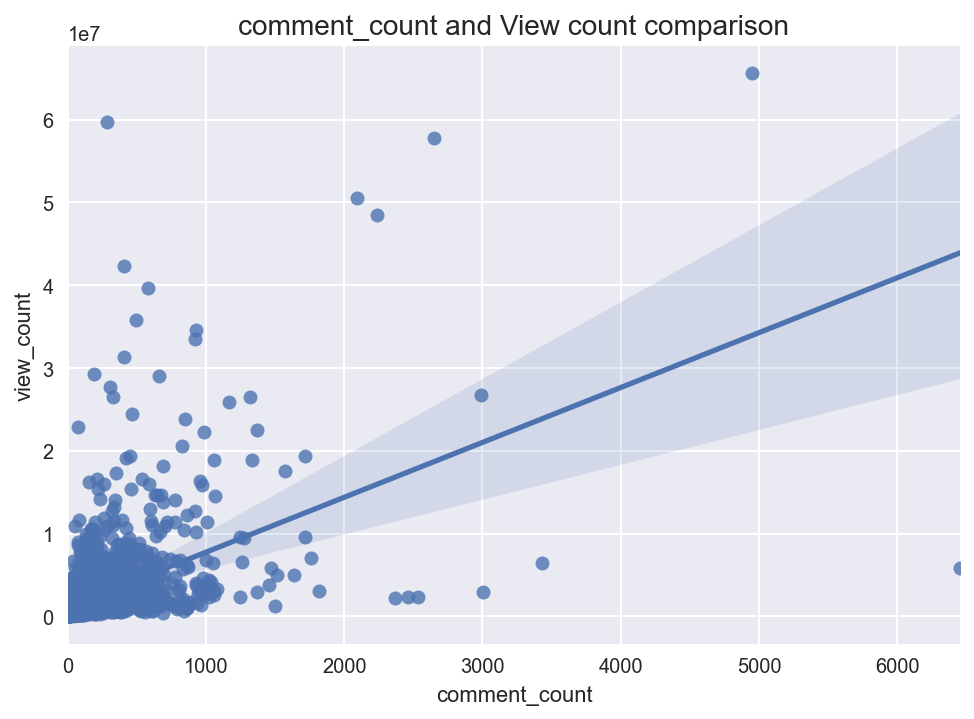

In [22]:
# comment count before interpolate null values
scatterplot(ted_talk, ['comment_count'])

In [23]:
# interpolate null comment values based on timestamp as 
ted_talk['comment_count'] = ted_talk['comment_count'].interpolate()

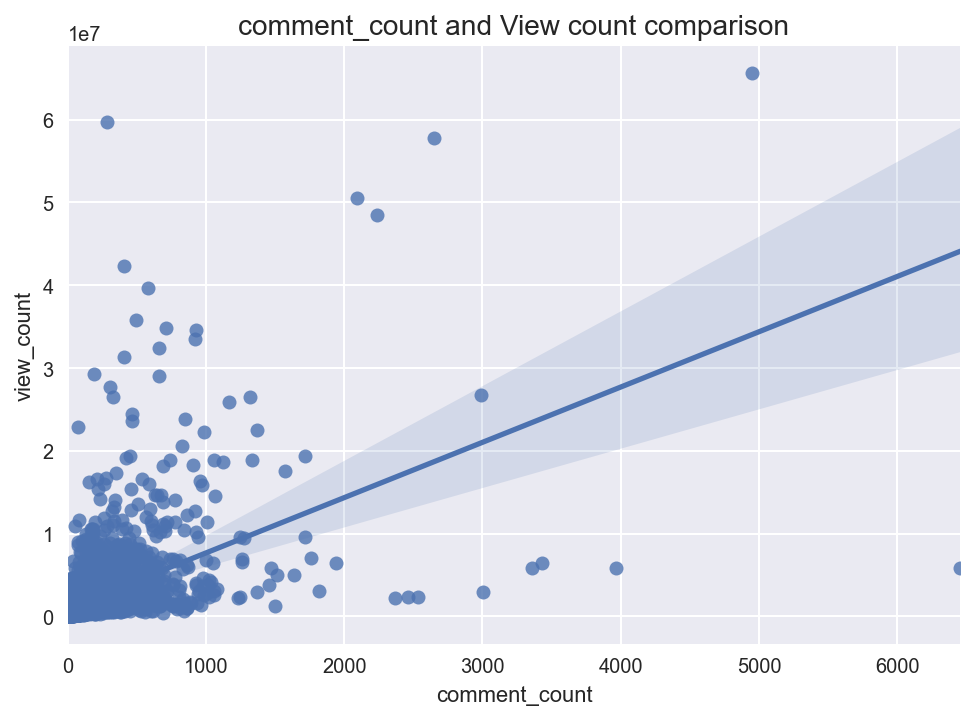

In [24]:
# scatter plot after interpolate null values
scatterplot(ted_talk, ['comment_count'])
# shape of view count is similar after impute

**Language columns**

In [25]:
# display non english ted_talks
ted_talk['language'].value_counts()

en    4591
es      17
fr       1
Name: language, dtype: int64

In [26]:
# drop non english ted talk
ted_talk = ted_talk[~ted_talk['language'].isin(['es', 'fr'])]

In [27]:
# check non english talks are dropped
ted_talk['language'].value_counts()

en    4591
Name: language, dtype: int64

In [28]:
# all language swap are of the same value. Hence, they are not useful for prediction
ted_talk['language_swap'].value_counts()

False    4591
Name: language_swap, dtype: int64

In [29]:
# drop language swap as there is very few True category in this feature, hence it cant really help me predict the view count
ted_talk = ted_talk.drop(['language_swap'], axis=1)

In [30]:
# Drop the languages columns since the default is english
ted_talk = ted_talk.drop(['native_language','language', 'talk__download_languages'], axis=1)

**Speaker related columns**
- Impute speaker__is_published using mode
- Correct incorrect number_of__speakers == 0 with 1

In [31]:
# Display speaker related columns
ted_talk[(ted_talk.speaker__who_he_is.isnull())&(ted_talk.speaker__why_listen.isnull())& \
         (ted_talk.speaker__description.isnull())][['speaker__why_listen', 'speaker__description', 'speaker__who_he_is']].\
head()
# all where null values, hence I will impute using the name of the speaker

speaker__why_listen speaker__description speaker__who_he_is
30                 NaN                  NaN                NaN
33                 NaN                  NaN                NaN
34                 NaN                  NaN                NaN
38                 NaN                  NaN                NaN
63                 NaN                  NaN                NaN

In [32]:
# for quick solution, impute with name of the speaker

cols = ['speaker__why_listen', 'speaker__description', 'speaker__who_he_is' ]
for col in cols:
    ted_talk[col] = ted_talk[col].fillna(value=ted_talk['talk__name'])

In [33]:
# display 'speaker__is_published'
ted_talk.speaker__is_published.value_counts()

1.0    3551
0.0    1029
Name: speaker__is_published, dtype: int64

In [34]:
# impute NaN in 'speaker__is_published' with median == mode

cols = ['speaker__is_published']
for col in cols:
    ted_talk[col] = ted_talk[col].fillna(value=ted_talk[col].median())

In [35]:
# drop 'speak__id' as no corelation.
ted_talk = ted_talk.drop(['speaker__id'], axis=1)

In [36]:
# check number of speakers unique values
ted_talk.number_of__speakers.value_counts()
# Notice that there are some data points with 0 speakers. When online and checked. 3 of them consists of 1 speaker and 
# 1 video is an animated video narrated by 1 speaker. Hence I will impute all to 1 speaker

1    4424
2     122
3      29
0      11
4       3
6       1
5       1
Name: number_of__speakers, dtype: int64

In [37]:
# impute those 0 speakers with 1 
ted_talk.number_of__speakers.replace({0: 1}, inplace=True)

In [38]:
# display value count
ted_talk.number_of__speakers.value_counts()
# 0 speaker is imputed wih 1

1    4435
2     122
3      29
4       3
6       1
5       1
Name: number_of__speakers, dtype: int64

In [39]:
# display null speaker__name
ted_talk[(ted_talk.speaker__name.isnull())][['talk__name', 'talk__id', 'speaker__name', 'view_count']]

talk__name  talk__id speaker__name  view_count
4530  Year In Ideas 2015      2386           NaN           0

In [40]:
# drop row 4530 due to lack of information in the dataset
ted_talk.drop([4530], axis = 0, inplace=True) 

**view count column cleaning (ouliers removal)**

In [41]:
# display describe
ted_talk.describe().T

count          mean           std  min  \
talk__id                             4590.0  1.447081e+04  1.880064e+04  1.0   
view_count                           4590.0  1.951622e+06  3.377952e+06  0.0   
comment_count                        4590.0  1.453653e+02  2.583247e+02  0.0   
duration                             4590.0  7.266588e+02  3.942977e+02  0.0   
number_of__speakers                  4590.0  1.043137e+00  2.545977e-01  1.0   
speaker__is_published                4590.0  7.758170e-01  4.170886e-01  0.0   
number_of__tags                      4590.0  7.543573e+00  3.857925e+00  0.0   
number_of__subtitled_videos          4590.0  1.924052e+01  1.373077e+01  0.0   
number_of__talk__download_languages  4590.0  2.257647e+01  1.159882e+01  0.0   
number_of__talk__more_resources      4590.0  4.063181e-01  7.742895e-01  0.0   
number_of__talk__recommendations     4590.0  2.727669e-01  6.496048e-01  0.0   
number_of__related_talks             4590.0  5.774946e+00  7.892444e-01  2.0   
intro_duration                       4590.0  8.794183e+00  5.159010e+00  0.0   
ad_duration                          4590.0  2.477549e+00  1.453427e+00  0.0   
post_ad_duration                     4590.0  6.175272e-01  3.622655e-01  0.0   
external__duration                   4462.0  7.128747e+02  3.806134e+02  0.0   
number_of__talks__take_actions       4590.0  2.736383e-01  6.411321e-01  0.0   

                                           25%         50%          75%  \
talk__id                               1362.25     2595.50    24139.500   
view_count                           655975.00  1277025.00  2018566.000   
comment_count                            26.00       76.00      169.625   
duration                                410.25      722.00      959.000   
number_of__speakers                       1.00        1.00        1.000   
speaker__is_published                     1.00        1.00        1.000   
number_of__tags                           5.00        7.00        9.000   
number_of__subtitled_videos               0.00       22.00       29.000   
number_of__talk__download_languages      17.00       24.00       30.000   
number_of__talk__more_resources           0.00        0.00        1.000   
number_of__talk__recommendations          0.00        0.00        0.000   
number_of__related_talks                  6.00        6.00        6.000   
intro_duration                            0.00       11.82       11.820   
ad_duration                               0.00        3.33        3.330   
post_ad_duration                          0.00        0.83        0.830   
external__duration                      387.00      715.00      967.000   
number_of__talks__take_actions            0.00        0.00        0.000   

                                             max  
talk__id                                64598.00  
view_count                           65678748.00  
comment_count                            6456.00  
duration                                 5257.00  
number_of__speakers                         6.00  
speaker__is_published                       1.00  
number_of__tags                            33.00  
number_of__subtitled_videos                71.00  
number_of__talk__download_languages        73.00  
number_of__talk__more_resources             7.00  
number_of__talk__recommendations           16.00  
number_of__related_talks                    6.00  
intro_duration                             11.82  
ad_duration                                 3.33  
post_ad_duration                            0.83  
external__duration                       5257.00  
number_of__talks__take_actions              4.00

In [42]:
# view count = 0 is due to no view count monitoring at the ted talk home page
ted_talk[(ted_talk.view_count < 100)][['view_count', 'talk__name']]

view_count  \
4412           0   
4413           0   
4414           0   
4415           0   
4416           0   
4417           0   
4418           0   
4419           0   
4420           0   
4421           0   
4422           0   
4423           0   
4424           0   
4425           0   
4426           0   
4428           0   
4429           0   
4430           0   
4431           0   
4432           0   
4433           0   
4434           0   
4435           0   
4436           0   
4437           0   
4438           0   
4439           0   
4440           0   
4441           0   
4442           0   
4443           0   
4444           0   
4445           0   
4446           0   
4447           0   
4448           0   
4449           0   
4450           0   
4451           0   
4452           0   
4453           0   
4454           0   
4455           0   
4456           0   
4457           0   
4458           0   
4459           0   
4460           0   
4461           0   
4462           0   
4463           0   
4464           0   
4465           0   
4466           0   
4467           0   
4468           0   
4469           0   
4470           0   
4471           0   
4472           0   
4473           0   
4474           0   
4475           0   
4476           0   
4477           0   
4478           0   
4479           0   
4480           0   
4481           0   
4482           0   
4483           0   
4484           0   
4485           0   
4486           0   
4487           0   
4488           0   
4489           0   
4490           0   
4491           0   
4492           0   
4493           0   
4494           0   
4495           0   
4496           0   
4497           0   
4498           0   
4499           0   
4500           0   
4501           0   
4502           0   
4503           0   
4504           0   
4505           0   
4506           0   
4508           0   
4509           0   
4510           0   
4511           0   
4512           0   
4513           0   
4514           0   
4515           0   
4516           0   
4517           0   
4518           0   
4519           0   
4520           0   
4521           0   
4522           0   
4523           0   
4524           0   
4525           0   
4526           0   
4527           0   
4528           0   
4529           0   
4531           0   
4532           0   
4533           0   
4534           0   
4535           0   
4536           0   
4537           0   
4538           0   
4539           0   
4540           0   
4541           0   
4542           0   
4543           0   
4544           0   
4545           0   
4546           0   
4547           0   
4548           0   
4549           0   
4550           0   
4551           0   
4552           0   
4553           0   
4554           0   
4555           0   
4556           0   
4557           0   
4558           0   
4559           0   
4560           0   
4561           0   
4562           0   
4563           0   
4564           0   
4565           0   
4566           0   
4567           0   
4568           0   
4569           0   
4570           0   
4571           0   
4572           0   
4573           0   
4574           0   
4575           0   
4576           0   
4577           0   
4578           0   
4579           0   
4580           0   
4581           0   
4582           0   
4583           0   
4584           0   
4585           0   
4586           0   
4587           0   
4588           0   
4589           0   
4590           0   
4591           0   
4592           0   
4593           0   
4594           0   
4595           0   
4596           0   
4597           0   
4598           0   
4599           0   
4600           0   
4601           0   
4602           0   
4604           0   
4605           0   
4606           0   
4607           0   
4608           0   

                                                                                   talk__name  
4412                         

In [43]:
# drop ted talk view count = 0 as these are outliers which video website does not have view count monitoring
ted_talk = ted_talk.drop(ted_talk[ted_talk.view_count ==0].index)

**Date, duration related features**

In [44]:
# display duration
ted_talk[(ted_talk.duration < 60)]['duration']

4376    0
Name: duration, dtype: int64

In [45]:
# drop talks that has no duration. This is probability an error
ted_talk.drop([4376], axis = 0, inplace=True)

In [46]:
# remove recording date since we have published timestamp which is more applicable to view count prediction
ted_talk = ted_talk.drop(['recording_date'], axis=1)

In [47]:
# display intro duration column values
ted_talk['intro_duration'].value_counts()

11.82    3410
0.00      986
Name: intro_duration, dtype: int64

In [48]:
# Based on the boxplot above, drop intro_duration as I think it is strange to have only 2 categories of introduction 
# duration. Hence I believe is an arbitary number.

# drop external duration since there is a duration column already
ted_talk = ted_talk.drop(['external__duration', 'intro_duration'], axis=1)

In [49]:
# convert timestamp to datetime
ted_talk['published_timestamp']= pd.DatetimeIndex(ted_talk['published_timestamp'])

In [50]:
# timestamp display
ted_talk['published_timestamp'].head()

0   2006-06-27 00:11:00
1   2016-01-08 16:03:40
2   2012-10-01 15:00:08
3   2010-05-04 09:31:00
4   2010-12-23 14:45:00
Name: published_timestamp, dtype: datetime64[ns]

In [51]:
# sort timestamp
ted_talk.sort_values(by=['published_timestamp'], ascending=False).head(2)

talk__id  \
4100     64428   
4247     64458   

                                                                        talk__name  \
4100  Why colonialist stereotypes persist -- and how to stop romanticizing history   
4247           How digital innovation can fight pandemics and strengthen democracy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             talk__description  \
4100                                                              Colonialism remains an inescapable blight on the present, lingering in the toxic, internalized mythologies and stereotypes that have outlived the regimes that created them, says historian Farish Ahmad-Noor. Examining why these prejudices and narratives persist (and sometimes thrive), he suggests a multidisciplinary approach to reject cultural obsessions with romanticized history and prevent this nostalgia from perpetuating past oppressions.   
4247  Can technology create a democracy that's fast, fair ... and even fun? Digital minister Audrey Tang shares how Taiwan avoided a COVID-19 shutdown in early 2020 through innovations like developing apps to map mask availability, crowdsourcing ideas that could become laws and creating a "humor over rumor" campaign to combat disinformation with comedy. (This virtual conversation, hosted by TED science curator David Biello and current affairs curator Whitney Pennington Rodgers, was recorded June 1, 2020.)   

      view_count  comment_count  duration video_type_name     event  \
4100      143965            3.0       738       TEDx Talk   TEDxNTU   
4247       30737            6.0      2945  TED Stage Talk  TED2020    

      number_of__speakers      speaker__name        speaker__description  \
4100                    1  Farish Ahmad-Noor                   Historian   
4247                    3        Audrey Tang  Digital Minister of Taiwan   

                                                                                              speaker__who_he_is  \
4100  Farish Ahmad-Noor believes that we can never truly escape history but we need not be victims of it either.   
4247                                    Audrey Tang is Taiwan's digital minister in charge of social innovation.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         speaker__why_listen  \
4100  Farish Ahmad-Noor, PhD, is a political scientist and historian of Southeast Asia, whose focus has been on the impact of colonialism in Asia. He has written extensively about the power of ideas and how colonization was never simply a case of violent conquest but also subtle transformation and coercion. His latest, forthcoming book is entitled Data-collecting in 19th Century Colonial Southeast Asia: Framing the Other.He is a tenured Associate Professor at the S. Rajaratnam School of International Studies (RSIS) at Nanyang Technological University in Singapore and coordinator of the RSIS doctoral program. He is also a member of the United Nat

In [52]:
# Separate timestamp related features to another DataFrame
# create month, year, month_year cols for timestamp correaltion later

ted_talk['month'] = pd.DatetimeIndex(ted_talk['published_timestamp']).month
ted_talk['year'] = pd.DatetimeIndex(ted_talk['published_timestamp']).year
ted_talk['month_year'] = pd.to_datetime(ted_talk['published_timestamp']).dt.to_period('M')

In [53]:
# remove time related features to analyze separately
ted_talk_published = ted_talk.loc[:, ['month', 'year', 'month_year', 'published_timestamp', 'view_count']]

In [54]:
# drop time related features since already created a separate dataframe
ted_talk = ted_talk.drop(['month', 'year', 'month_year', 'published_timestamp'], axis=1)

**Text Cleaning**

In [55]:
# skip cleaning for ted talk title and speaker__name to preserve the original meaning
# create another dataframe for columns that needs to avoid cleaning
ted_talk_title = ted_talk[['talk__name', 'speaker__name', 'url__webpage']]

In [56]:
# drop ted_talk_title from ted_talk to avoid cleaning
ted_talk = ted_talk.drop(['talk__name', 'speaker__name', 'url__webpage'], axis=1)

In [57]:
# list with only text columns
col_text = [col for col in ted_talk.columns if ted_talk[col].dtype == np.object]

In [58]:
# extract text columns
ted_talk[col_text].head(1)

talk__description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.   

  video_type_name    event speaker__description  \
0  TED Stage Talk  TED2006     Author, educator   

                                                                                                                                                                                                   speaker__who_he_is  \
0  Creativity expert Sir Ken Robinson challenges the way we're educating our children. He champions a radical rethink of our school systems, to cultivate creativity and acknowledge multiple types of intelligence.    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  speaker__why_listen  \
0  Why don't we get the best out of people? Sir Ken Robinson argues that it's because we've been educated to become good workers, rather than creative thinkers. Students with restless minds and bodies -- far from being cultivated for their energy and curiosity -- are ignored or even stigmatized, with terrible consequences. "We are educating people out of their creativity," Robinson says. It's a message with deep resonance. Robinson's TED Talk has been distributed widely around the Web since its release in June 2006. The most popular words framing blog posts on his talk? "Everyone should watch this."A visionary cultural leader, Sir Ken led the British government's 1998 advisory committee on creative and cultural education, a massive inquiry into the significance of creativity in the educational system and the economy, and was knighted in 2003 for his achievements. His 2009 book, The Element: How Finding Your Passion Changes Everything, is a New York Times bestseller and has been translated into 21 languages. A 10th-anniversary edition of his classic work on creativity and innovation, Out of Our Minds: Learning to be Creative, was published in 2011. His 2013 book, Finding Your Element: How to Discover Your Talents and Passions and Transform Your Life, is a practical guide that answers questions about finding your personal Element. And in Creative Schools: The Grassroots Revolution That’s Transforming Education, he argues for an end to our outmoded industrial educational system and proposes a highly personalized, organic approach that draws on today’s unprecedented technological and professional resourc

In [59]:
# Convert text data to string for easy cleaning
for col in col_text:
    ted_talk[col] = ted_talk[col].astype(str)

In [60]:
# import string punctuation for cleaning using regex before apply function
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
# function to clean data using regex library
# remove special signs and punctuation marks

# function to clean text
def process_columns(col):
    # Remove words with 2 or fewer letters. Purposefully placed at the top to remove short words like i, me, do etc
    col = re.sub(r'\b\w{1,2}\b', '', col)
    
    # Remove emoji
    col = re.sub(r'[^\x00-\x7F]+', '', col)
    
    # Remove HTML special entities (e.g. &amp;)
    col = re.sub(r'\&\w*;', '', col)
    
    #Convert @username to AT_USER
    col = re.sub('@[^\s]+','',col)
    
    # Remove tickers
    col = re.sub(r'\$\w*', '', col)
    col = re.sub(r'\£\w*', '', col)
    
    # To lowercase
    col = col.lower()
    
    # Remove hyperlinks
    col = re.sub(r'https?:\/\/.*\/\w*', '', col)
    
    # Remove whitespace (including new line characters)
    col = re.sub(r'\s\s+', ' ', col)
    
    # Remove Punctuation and split 's, 't, 've with a space for filter
    col = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', col)
    
    # remove Standalone numbers but keep numbers if it is integrated with words eg ps4, ps5, 2K21, 60Hz
    col = re.sub(r'\s*(?<!\B|-)\d+(?!\B|-)\s*', ' ', col)
    
    # remove quotes
    col = re.sub(r'[\"\',]', '', col)  
    
    # Remove single space remaining at the front of the text.
    col = col.lstrip(' ')

    
    return col

In [62]:
# apply cleaning function to all text columns
for col in col_text:
    ted_talk[col] = ted_talk[col].apply(process_columns)

In [63]:
# display results
ted_talk[col_text].head(1)

talk__description  \
0  sir ken robinson makes entertaining and profoundly moving case for creating education system that nurtures  rather than undermines  creativity    

  video_type_name    event speaker__description  \
0  ted stage talk  ted2006     author  educator   

                                                                                                                                                                                 speaker__who_he_is  \
0  creativity expert sir ken robinson challenges the way   educating our children  champions radical rethink our school systems  cultivate creativity and acknowledge multiple types intelligence     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          speaker__why_listen  \
0  why don  get the best out people  sir ken robinson argues that   because   been educated become good workers  rather than creative thinkers  students with restless minds and bodies   far from being cultivated for their energy and curiosity   are ignored even stigmatized  with terrible consequences    are educating people out their creativity  robinson says    message with deep resonance  robinson  ted talk has been distributed widely around the web since its release june the most popular words framing blog posts his talk   everyone should watch this  visionary cultural leader  sir ken led the british government advisory committee creative and cultural education  massive inquiry into the significance creativity the educational system and the economy  and was knighted for his achievements  his book  the element  how finding your passion changes everything  new york times bestseller and has been translated into languages  10th anniversary edition his classic work creativity and innovation out our minds  learning creative  was published his book finding your element  how discover your talents and passions and transform your life  practical guide that answers questions about finding your personal element  and creative schools  the grassroots revolution that transforming education  argues for end our outmoded industrial educational system and proposes highly personalized  organic approach that draws today unprecedented technological and professional resources engage all students    

                                                                                                                                                   all_speakers_details  \
0  slug   sir ken robinson   is published  true   firstname   sir ken   lastname   robinson   middleinitial     title     description   author  

In [64]:
# combine the clean and non clean dataframe
ted_talk = pd.concat([ted_talk, ted_talk_title], axis=1, sort=False)

**check data is cleaned**

In [65]:
# display using info()
ted_talk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 0 to 4411
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   talk__id                             4396 non-null   int64  
 1   talk__description                    4396 non-null   object 
 2   view_count                           4396 non-null   int64  
 3   comment_count                        4396 non-null   float64
 4   duration                             4396 non-null   int64  
 5   video_type_name                      4396 non-null   object 
 6   event                                4396 non-null   object 
 7   number_of__speakers                  4396 non-null   int64  
 8   speaker__description                 4396 non-null   object 
 9   speaker__who_he_is                   4396 non-null   object 
 10  speaker__why_listen                  4396 non-null   object 
 11  speaker__is_published         

In [66]:
# display data related dataframe using info
ted_talk_published.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 0 to 4411
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                4396 non-null   int64         
 1   year                 4396 non-null   int64         
 2   month_year           4396 non-null   period[M]     
 3   published_timestamp  4396 non-null   datetime64[ns]
 4   view_count           4396 non-null   int64         
dtypes: datetime64[ns](1), int64(3), period[M](1)
memory usage: 206.1 KB


In [67]:
# Output: saving ted_talk after_cleaned dataframe posts to csv
ted_talk.to_csv('../dataset/ted_talk_after_cleaned.csv', index = False)
ted_talk_published.to_csv('../dataset/ted_talk_published_after_cleaned.csv', index = False)

# Exploratory Data Analysis

- Observed strong linear correlation between comment count and view count.
- Observed fair to weak correlation between view count and\
    1) duration\
    2) number of subtitle videos\
    3) number of talk download languages\
    4) number of tags

In [68]:
ted_talk.describe().T

count          mean           std  \
talk__id                             4396.0  1.393166e+04  1.865214e+04   
view_count                           4396.0  2.037747e+06  3.426179e+06   
comment_count                        4396.0  1.517356e+02  2.621391e+02   
duration                             4396.0  7.312905e+02  3.977491e+02   
number_of__speakers                  4396.0  1.042084e+00  2.547454e-01   
speaker__is_published                4396.0  8.064149e-01  3.951524e-01   
number_of__tags                      4396.0  7.692675e+00  3.862536e+00   
number_of__subtitled_videos          4396.0  2.008963e+01  1.340873e+01   
number_of__talk__download_languages  4396.0  2.356938e+01  1.082257e+01   
number_of__talk__more_resources      4396.0  4.237944e-01  7.863267e-01   
number_of__talk__recommendations     4396.0  2.848044e-01  6.611991e-01   
number_of__related_talks             4396.0  5.868744e+00  6.054860e-01   
ad_duration                          4396.0  2.583098e+00  1.389158e+00   
post_ad_duration                     4396.0  6.438353e-01  3.462466e-01   
number_of__talks__take_actions       4396.0  2.854868e-01  6.524155e-01   

                                         min        25%           50%  \
talk__id                                 1.0    1311.75  2.494500e+03   
view_count                           10124.0  758733.50  1.315869e+06   
comment_count                            0.0      31.75  8.166667e+01   
duration                                60.0     404.00  7.310000e+02   
number_of__speakers                      1.0       1.00  1.000000e+00   
speaker__is_published                    0.0       1.00  1.000000e+00   
number_of__tags                          1.0       5.00  7.000000e+00   
number_of__subtitled_videos              0.0      10.00  2.300000e+01   
number_of__talk__download_languages      0.0      19.00  2.400000e+01   
number_of__talk__more_resources          0.0       0.00  0.000000e+00   
number_of__talk__recommendations         0.0       0.00  0.000000e+00   
number_of__related_talks                 2.0       6.00  6.000000e+00   
ad_duration                              0.0       3.33  3.330000e+00   
post_ad_duration                         0.0       0.83  8.300000e-01   
number_of__talks__take_actions           0.0       0.00  0.000000e+00   

                                             75%          max  
talk__id                               24033.500     64548.00  
view_count                           2066515.000  65678748.00  
comment_count                            175.625      6456.00  
duration                                 966.000      5257.00  
number_of__speakers                        1.000         6.00  
speaker__is_published                      1.000         1.00  
number_of__tags                            9.000        33.00  
number_of__subtitled_videos               30.000        71.00  
number_of__talk__download_languages       30.000        73.00  
number_of__talk__more_resources            1.000         7.00  
number_of__talk__recommendations           0.000        16.00  
number_of__related_talks                   6.000         6.00  
ad_duration                                3.330         3.33  
post_ad_duration                           0.830         0.83  
number_of__talks__take_actions             0.000         4.00

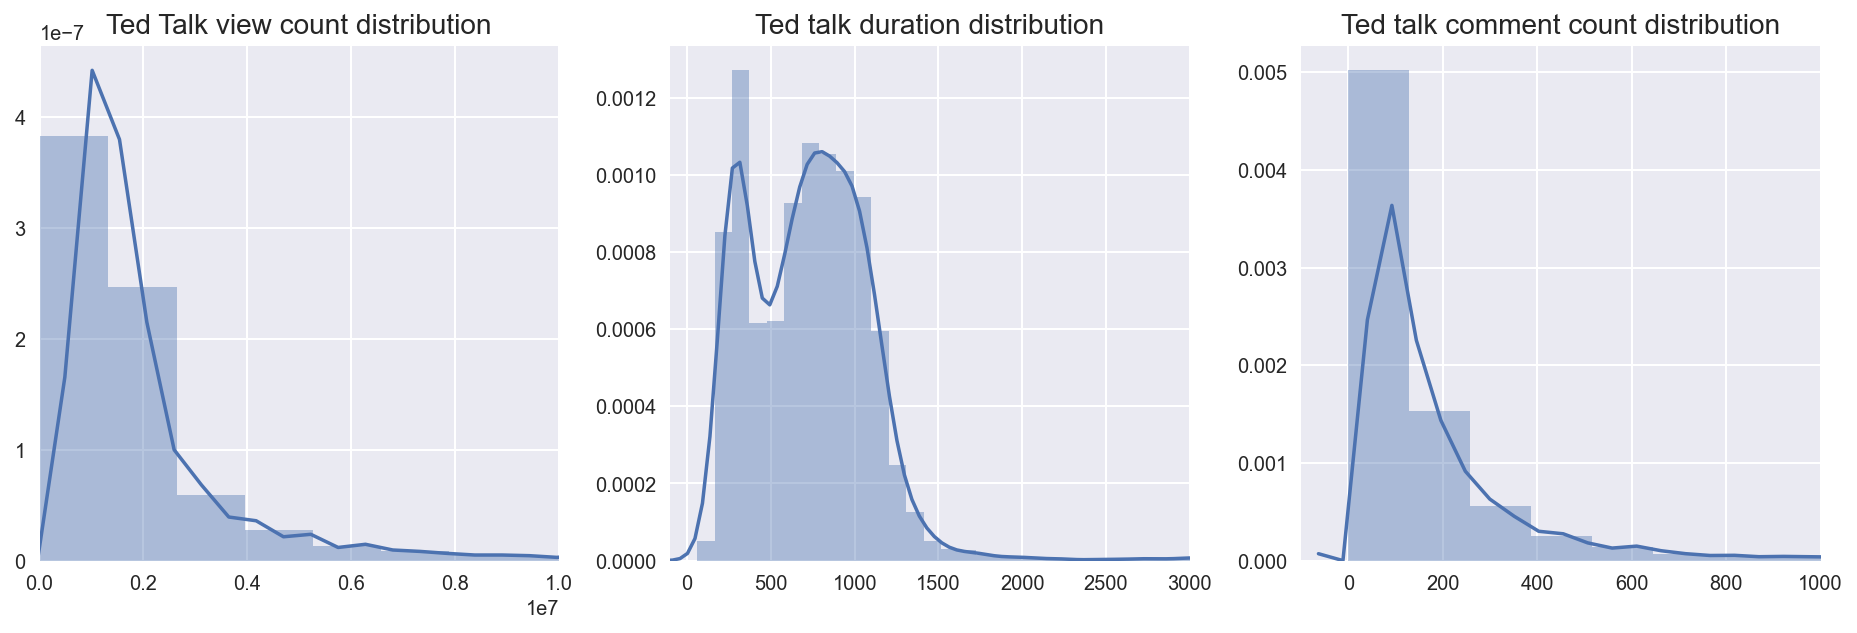

In [69]:
# plot distributions for views and duration
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 4.5))


#let's see the distribution of views
sns.distplot(ted_talk['view_count'], ax = ax[0])
ax[0].set_xlabel('')
ax[0].set_xlim(-100,10000000)
ax[0].set_title('Ted Talk view count distribution', fontsize=14)
#let's see the distribution of duration
sns.distplot(ted_talk['duration'], ax = ax[1])
ax[1].set_xlabel('')
ax[1].set_xlim(-100,3000)
ax[1].set_title('Ted talk duration distribution', fontsize=14)

#let's see the distribution of comment
sns.distplot(ted_talk['comment_count'], ax = ax[2])
ax[2].set_xlabel('')
ax[2].set_xlim(-100,1000)
ax[2].set_title('Ted talk comment count distribution', fontsize=14)


plt.tight_layout()

## Summary Statistics

The average number of views on TED Talks in 2.04 million. and the median number of views is 1.31 million. We also notice from the distribution plot below that the majority of talks have views less than 4 million. For the scope of this project, I will consider talks with view count greater than median as popular and view count lesser than median as unpopular.

Duration of talks is closer to a normal distribution, but with a wide right-side tail of a few talks at longer duration, around a mean and median of 12 minutes. Almost all talks range between 1–18 minutes (maximum length of a normal Ted talk).

On average, there are 151.7 comments on every TED Talk. Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.
There is a huge standard deviation associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.
The minimum number of comments on a talk is 0 and the maximum is 6456. The range is 6456. The minimum number, is a result of the talk being posted extremely recently, in this case Feb 2020. From the distribution, majority of the comments count is less than 600. This clearly suggests that the mean obtained above has been heavily influenced by outliers.

Another question that I am interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out.

In [70]:
# create a classification column to define TED talks view count higher than median to be popular and ted talk view count
# less than median to be unpopular

# create column with column that classify 0 for ted talks with view count > median
# create column with column that classify 1 for ted talks with view count < median

ted_talk['unpopular'] = np.where(ted_talk['view_count'] < 1.315674e+06, 1, 0)

In [71]:
# print the proportion of unpopular ted talk videos
ted_talk['unpopular'].value_counts(normalize=True)

0    0.500227
1    0.499773
Name: unpopular, dtype: float64

In [72]:
# create a function to plot features by popular and unpopular view counts
def plot_scatter(name):
    sns.lmplot(x=name, y="view_count", hue="unpopular", data=ted_talk)
    plt.suptitle(name + ' and view count comparision');

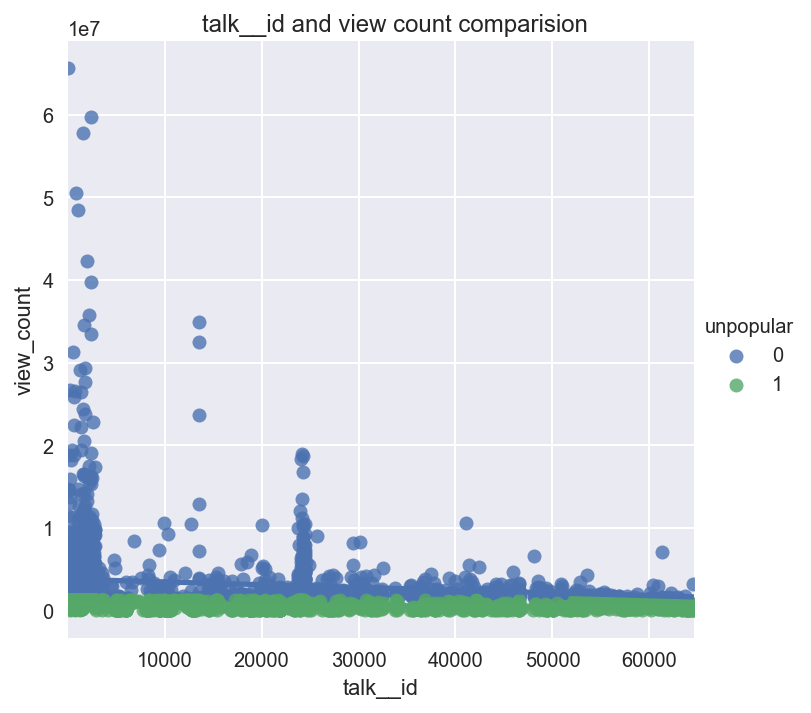

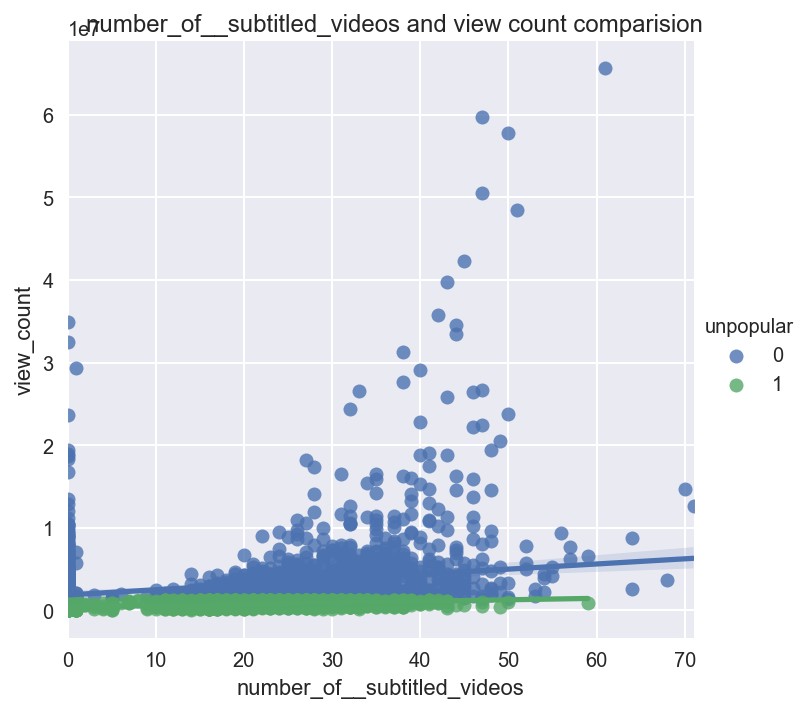

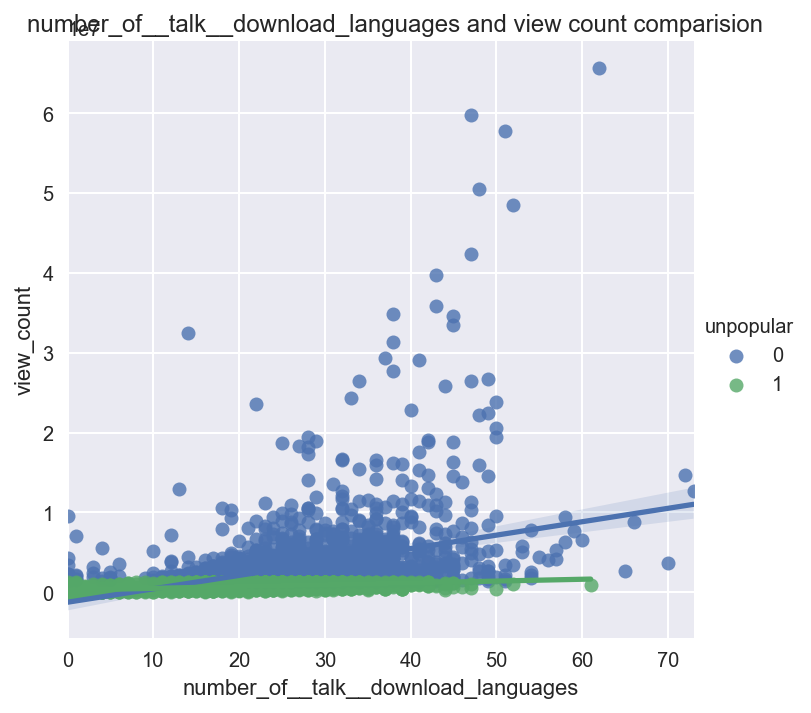

In [73]:
# plot charts using function
dfs = [
    ('talk__id'),
    ('number_of__subtitled_videos'),
    ('number_of__talk__download_languages'),
]

# Plot each feature.
[plot_scatter(name) for name in dfs];

talk__id is the id number of the TED talks. Logically there should not be any relationship between view count and talk id.

In [74]:
# Plot boxplot for categorical columns for cleaning
def subplot_boxp(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x = dataframe[column], y = dataframe.view_count, width = 0.3, ax = ax[i])
        ax[i].set_ylim([0, 2.5e7]) # cut off at 2.5e7 y-limits to have a better view of the boxplots
        ax[i].set_title(column + " and View count comparison")
        # Set titles, labels, etc here for each subplot

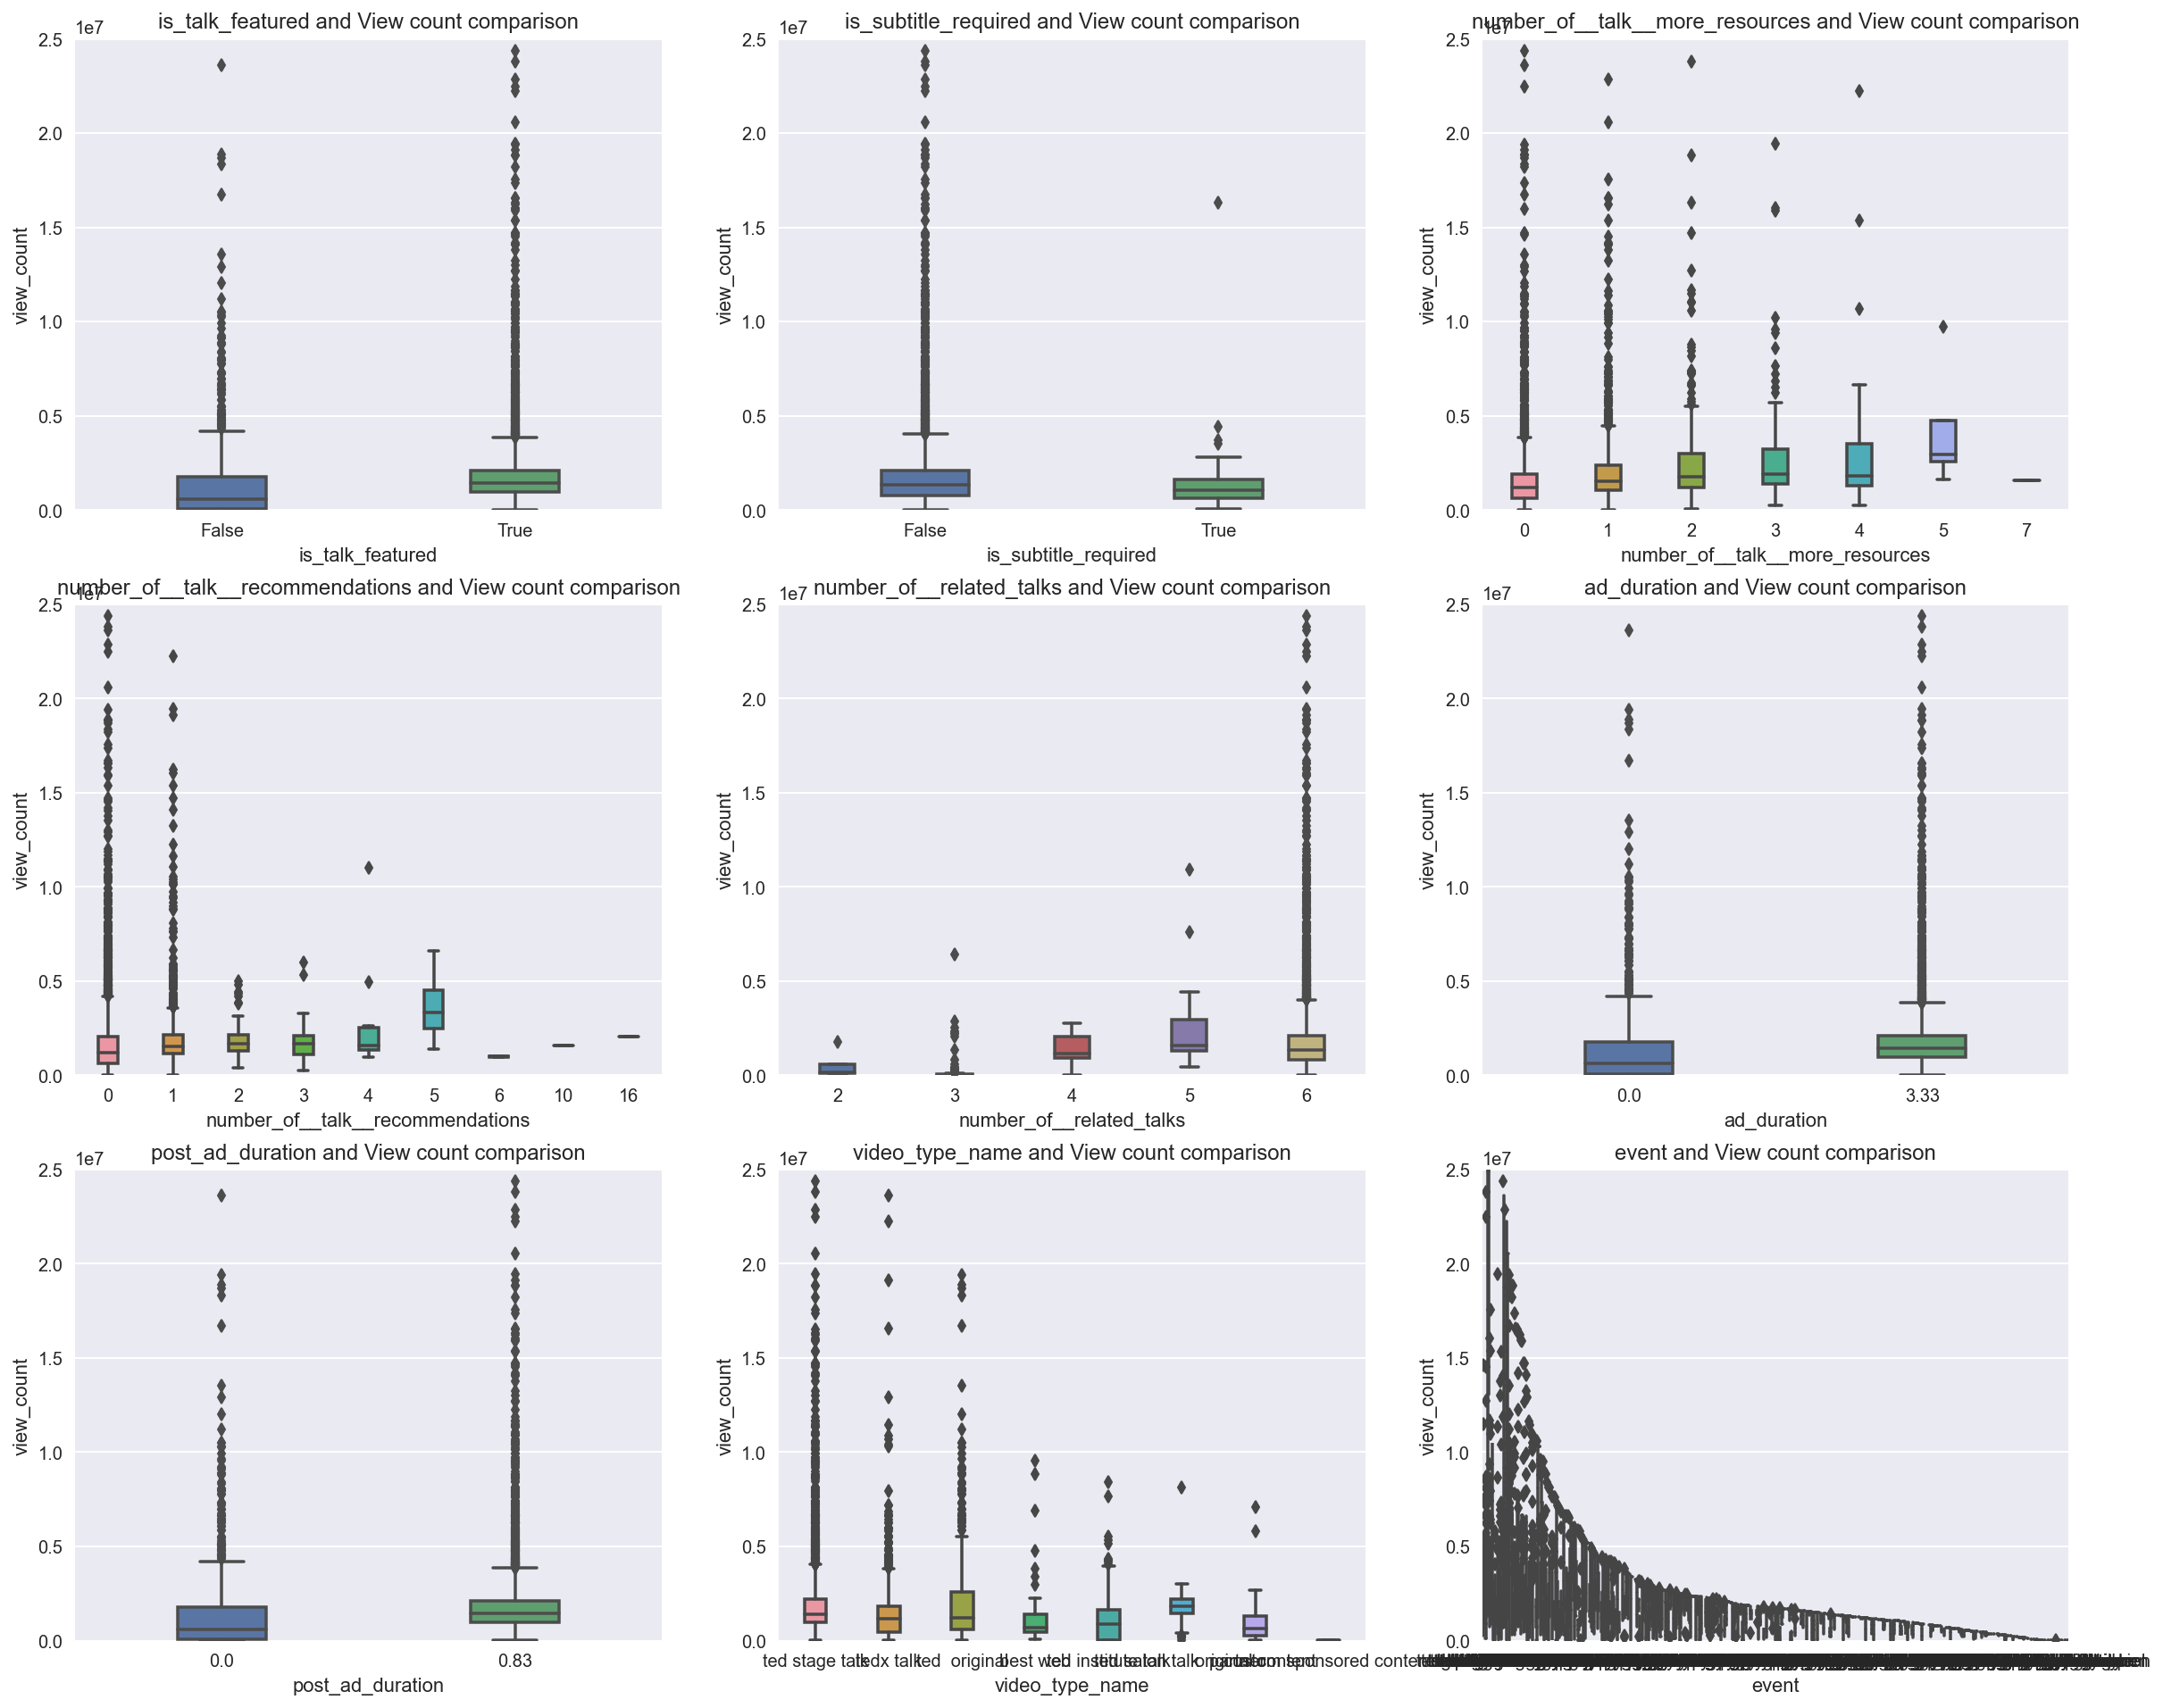

In [75]:
# plot categorical data
# set limit at 4e7 view count for a better view of boxplot(disregard outliers)

subplot_boxp(ted_talk, ['is_talk_featured','is_subtitle_required','number_of__talk__more_resources'\
                        , 'number_of__talk__recommendations', 'number_of__related_talks', 'ad_duration', 'post_ad_duration',\
                        'video_type_name', 'event']);

Features inversely correlated to view count:
- 'video_type_name'
- 'number_of__talk__more_resources'
- 'number_of__related_talks'
- 'number_of__talk__recommendations'

In [76]:
# define columns for histogram plotting
col_numerical_hist = ['talk__id', 'comment_count', 'duration', 'number_of__subtitled_videos', 
                      'number_of__talk__download_languages', 'number_of__tags', 'number_of__talks__take_actions', 
                      'number_of__speakers', 'number_of__talk__more_resources', 'number_of__talk__recommendations',
                     'number_of__related_talks']

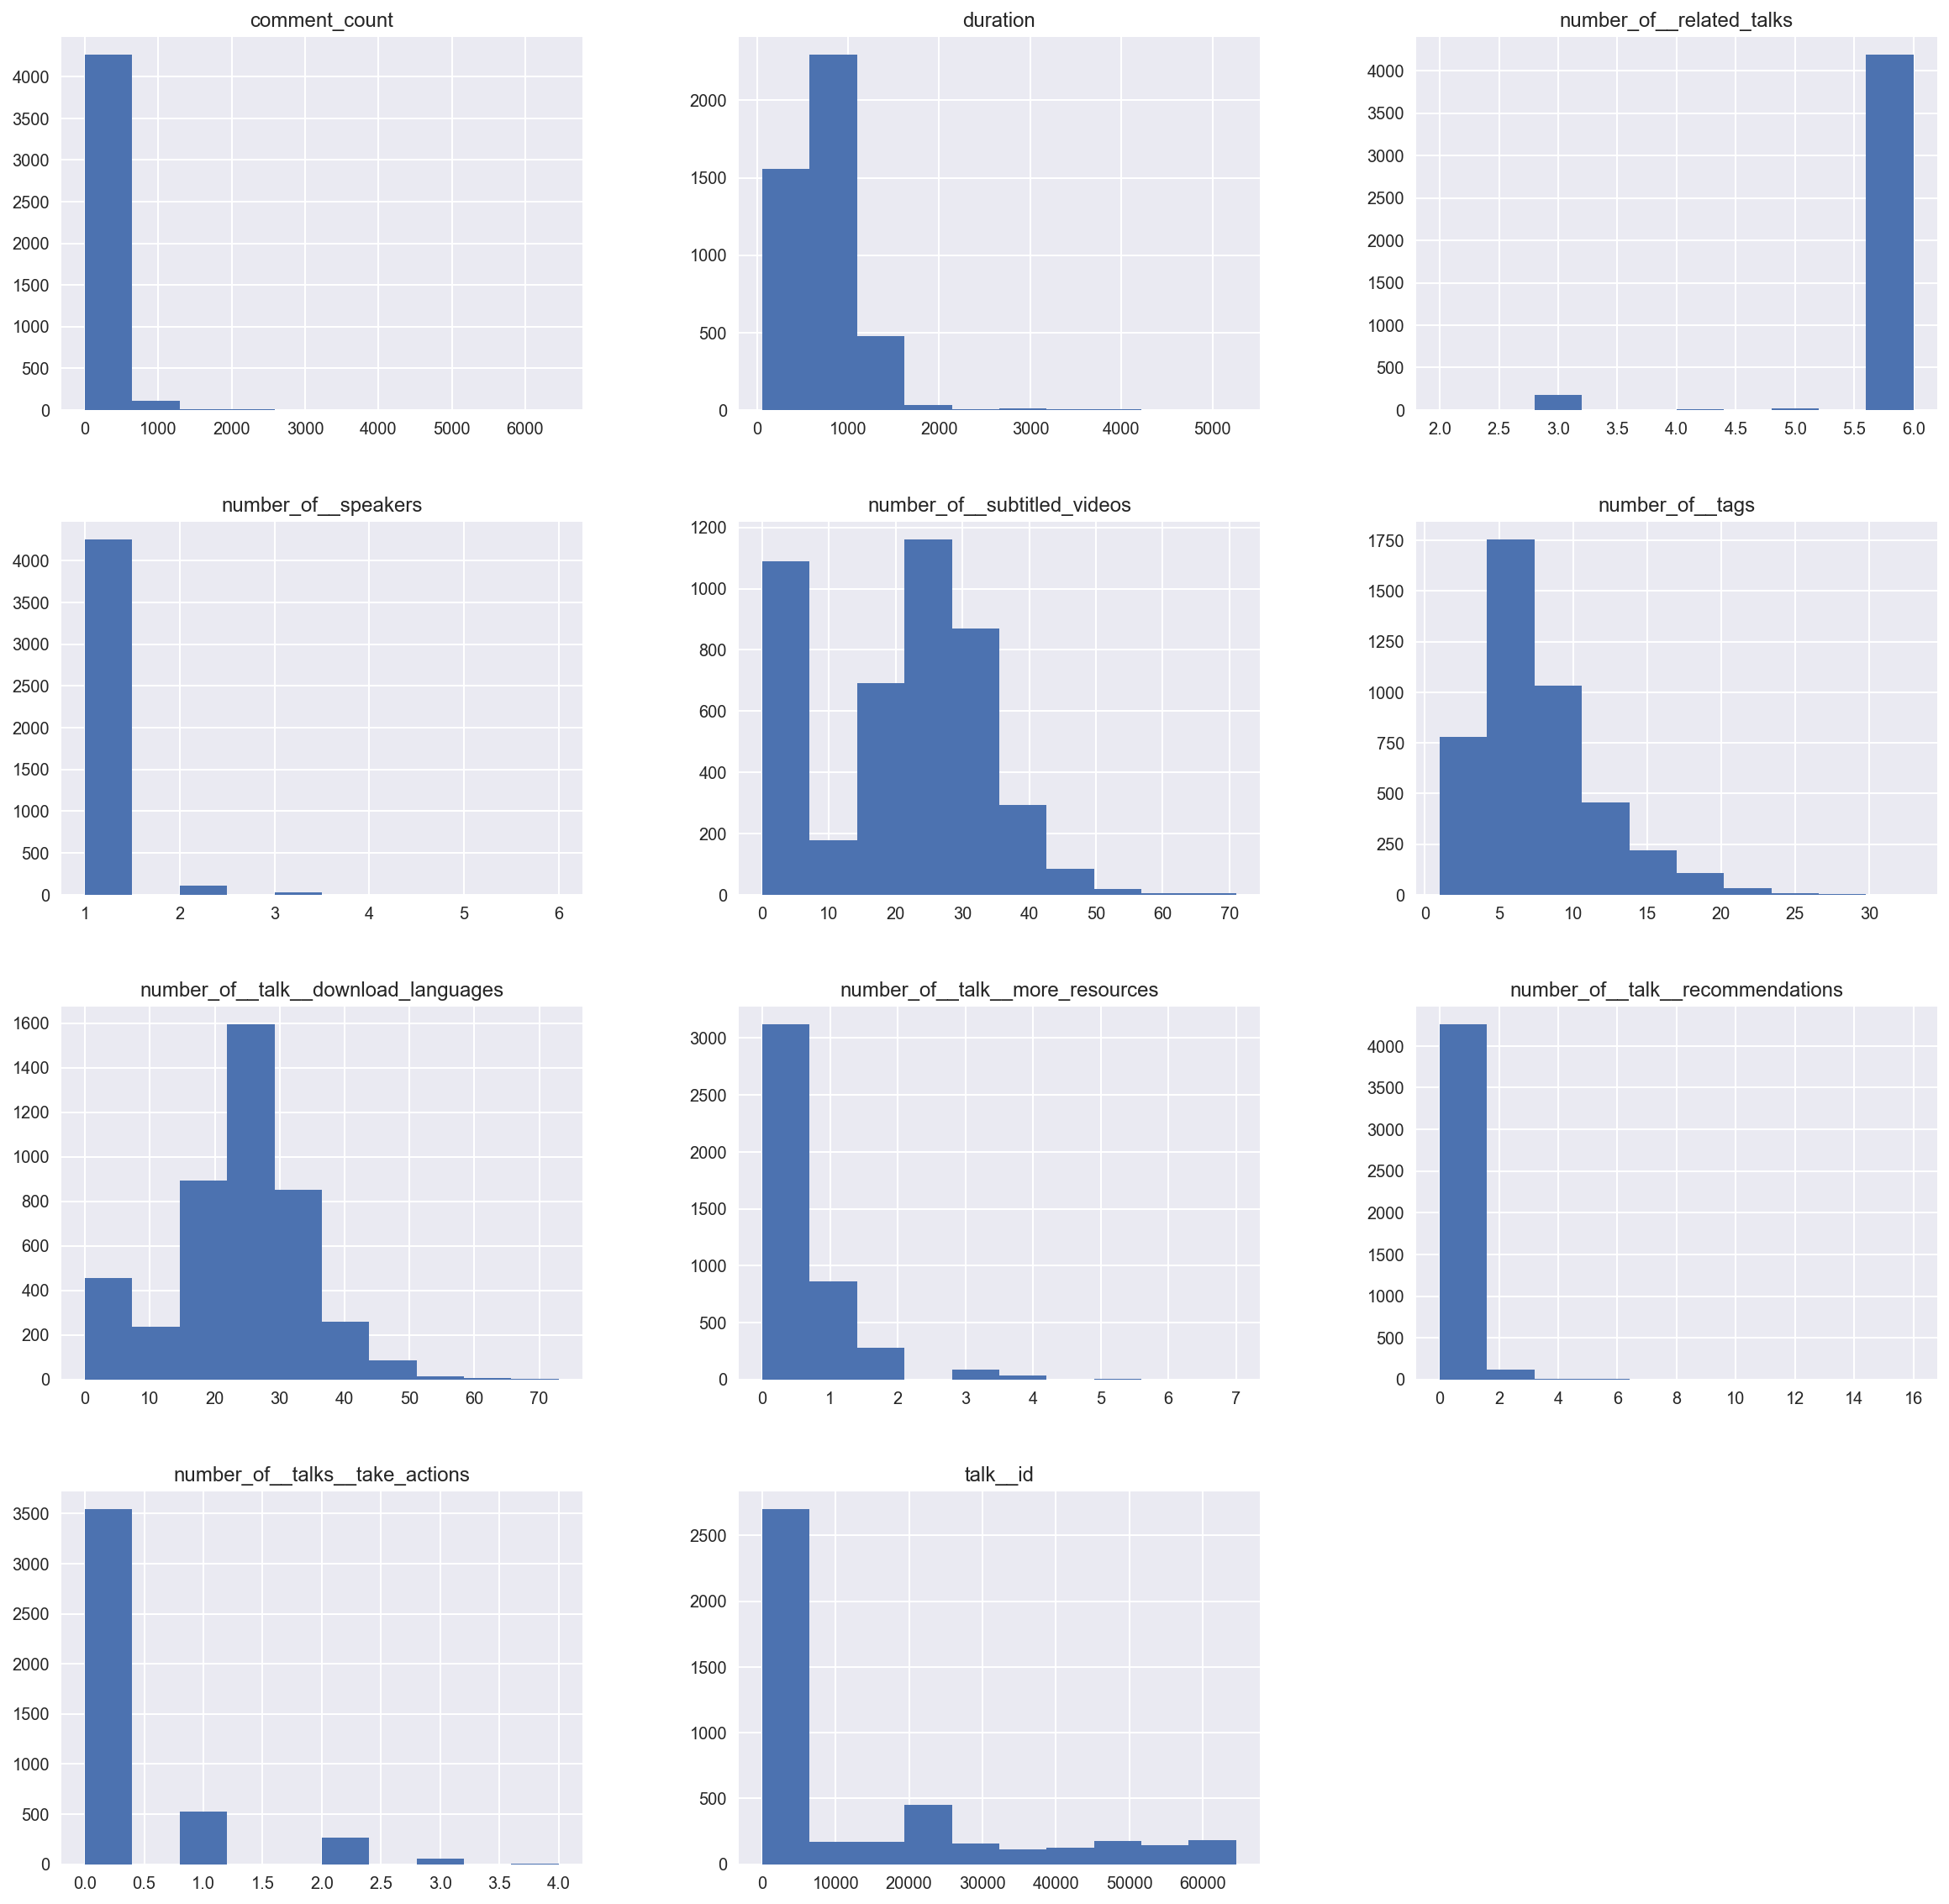

In [77]:
# display hisogram
ted_talk[col_numerical_hist].hist(figsize=(20, 20));

From these distributions we see that:
Number of tags also is a Poisson distribution skewed right, peaks between 6–7 tags.
Number of languages downloaded has peaks mostly is between 25–30 languages, is bell shaped but slightly skewed to the right

Talk_id, number of talk more resources, duration is right skewed\
Number of subtitled videos is bimodal and slightly skewed to the right

### Date Analysis

The purpose of analyzing the date is to see if date is a factor that affects view count

In [78]:
# display columns and datatype
ted_talk_published.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 0 to 4411
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                4396 non-null   int64         
 1   year                 4396 non-null   int64         
 2   month_year           4396 non-null   period[M]     
 3   published_timestamp  4396 non-null   datetime64[ns]
 4   view_count           4396 non-null   int64         
dtypes: datetime64[ns](1), int64(3), period[M](1)
memory usage: 366.1 KB


In [79]:
# Plot boxplot for categorical columns with smaller limits to explore relationship between view count and month, year
def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x = dataframe[column], y = dataframe.view_count, width = 0.3, ax = ax[i])
        ax[i].set_ylim([0, 0.8e7])
        ax[i].set_title(column + " and View count comparison")
        # Set titles, labels, etc here for each subplot

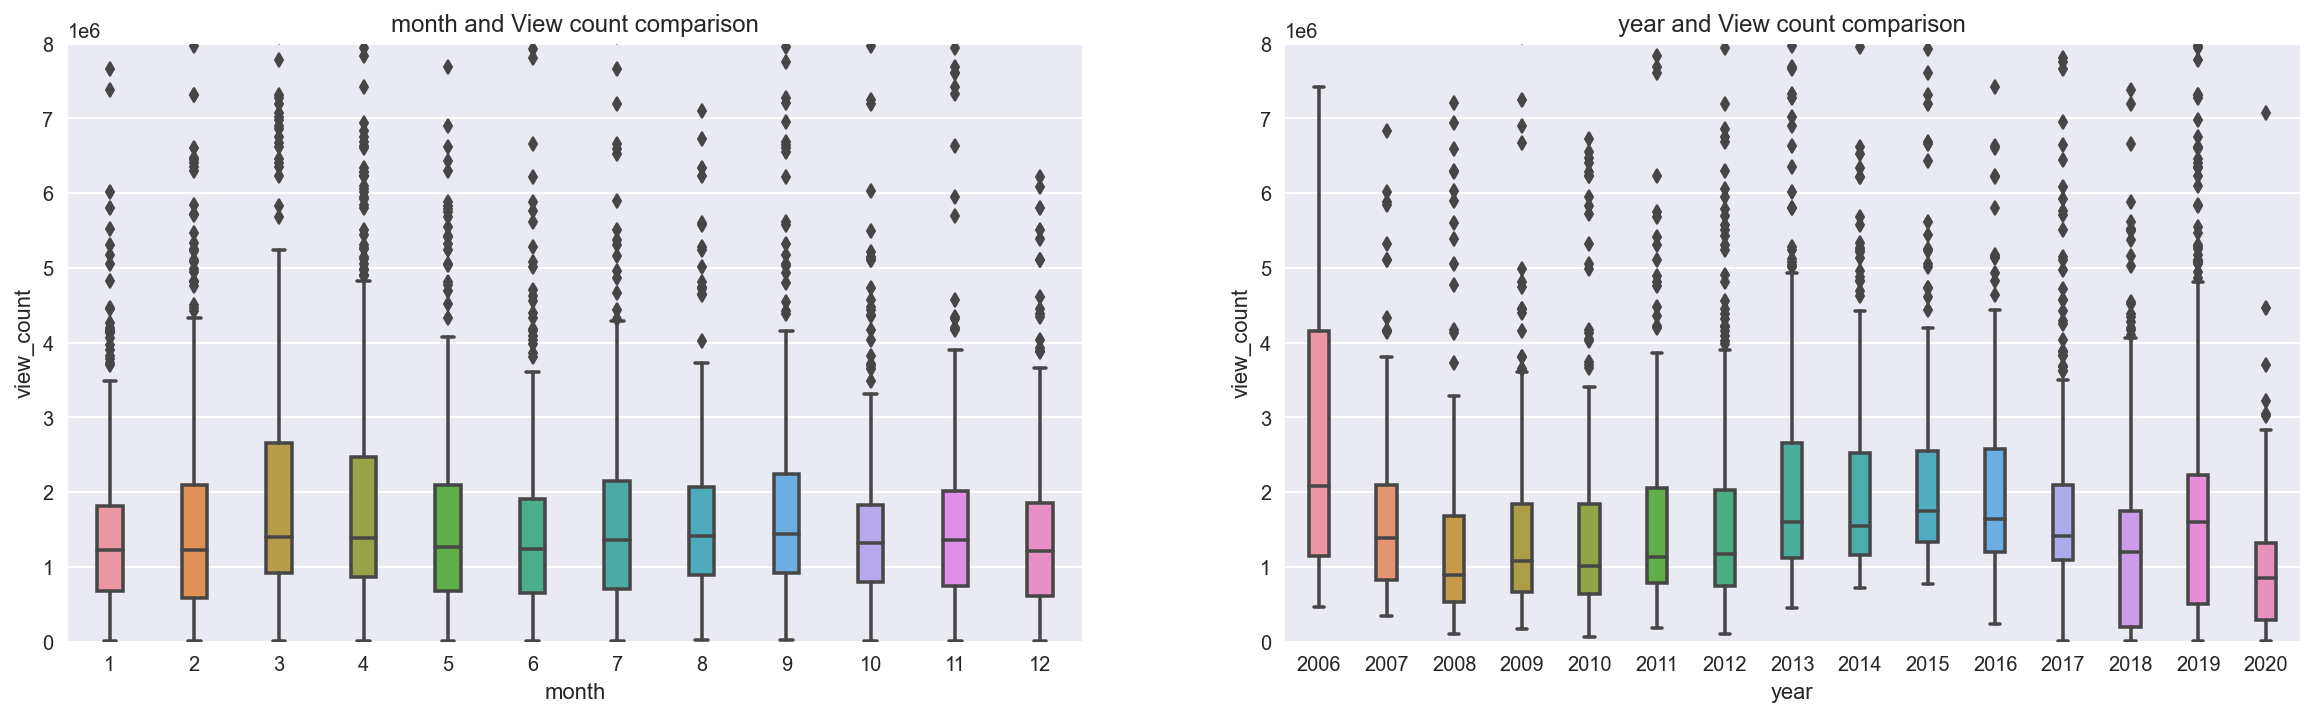

In [80]:
# display month, year
subplot_boxplot(ted_talk_published, ['month', 'year'])

No correlation between month, year with view count, even though I thought the longer the ted_talk was posted on the home website, the higher the accumulated view count over the years. 2006 seems to hav higher view coiunt accumulated in a year.

Let us explore view count based on year_month instead to see if there is any relationship.

In [81]:
# group view count by month year to study the view count based on month year
groupby_yrmonth = pd.DataFrame(ted_talk_published['view_count'].groupby(ted_talk_published['month_year']).sum())

In [82]:
# convert month_year to index for plotting of graph
groupby_yrmonth['month_year'] = groupby_yrmonth.index

In [83]:
# rename header to better describe the column data
groupby_yrmonth.rename(columns={'view_count':'view_count_grouped'}, inplace=True)
groupby_yrmonth.head()

view_count_grouped month_year
month_year                               
2006-06               88439228    2006-06
2006-07               16825314    2006-07
2006-08               23549562    2006-08
2006-09               65693288    2006-09
2006-10               14857509    2006-10

In [84]:
# display the recent month year view count
groupby_yrmonth.tail()

view_count_grouped month_year
month_year                               
2020-02               72158554    2020-02
2020-03               55283669    2020-03
2020-04               34914933    2020-04
2020-05               26987941    2020-05
2020-06               22907127    2020-06

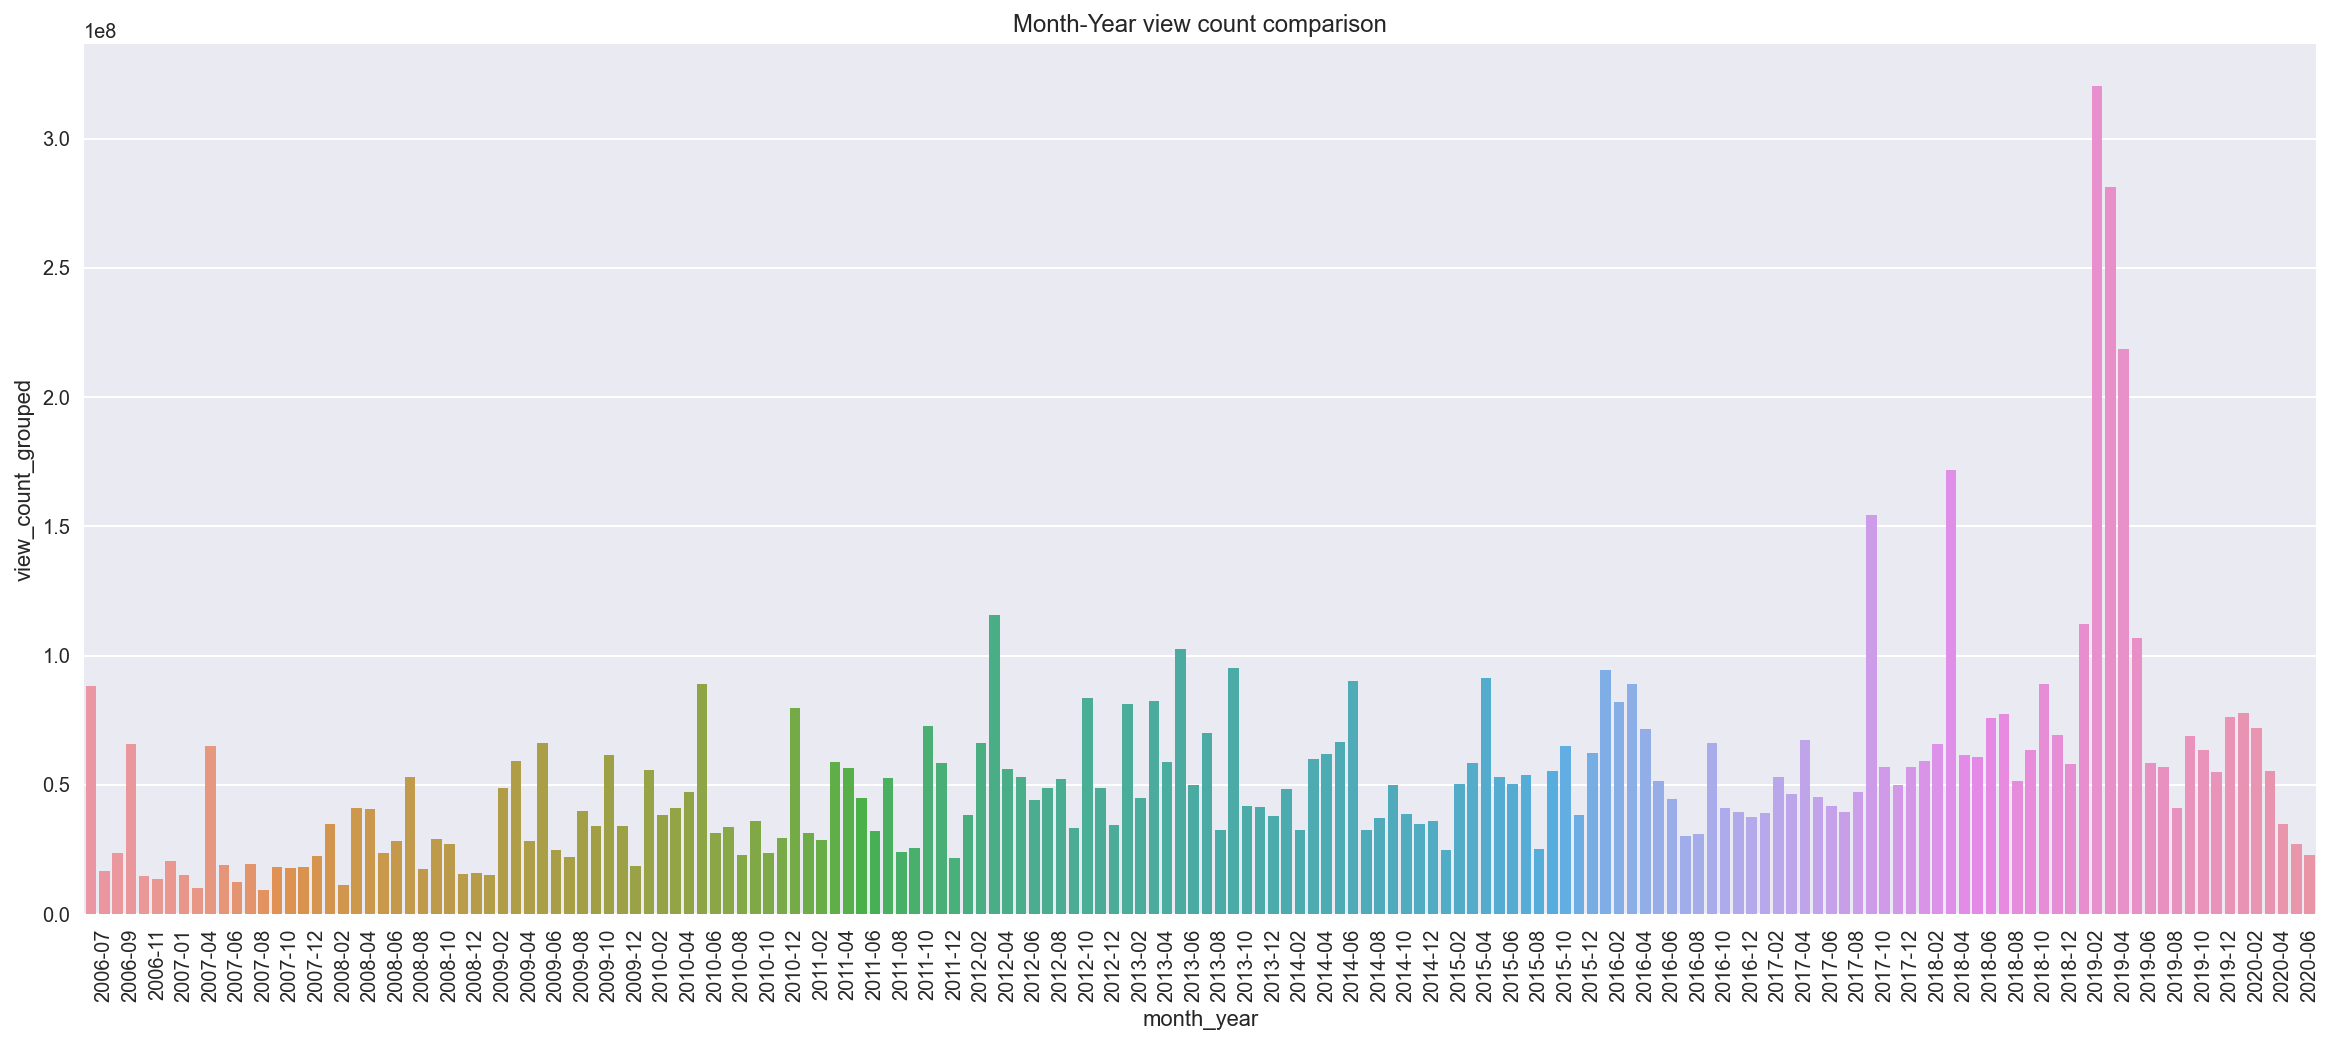

In [85]:
# visualise for better analysis
plt.figure(figsize=(20,8))
plt.title('Month-Year view count comparison')
sns.barplot(x='month_year', y='view_count_grouped', data=groupby_yrmonth).tick_params(axis='x', rotation=90)

# skip labeling to display the x axis format properly
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

- From month_year plot, i see high view count in 2019 first half of the year. \
- Gentle increase in view count observed from 2006 to 2020. This could be due to TED became more widely known by people and fine tuning of the topics, speakers, improvement of recommender system to attract more viewers.\
- 2020 TED videos have slightly lower view count. This is due to insufficient outreach to the public.\
- Month year will be a potential predictive feature for view count prediction.

In [86]:
# concate into a single dataframe for describe() statistical summary
ted_talk_published = pd.concat([ted_talk_published, groupby_yrmonth], axis=1, sort=False)

In [87]:
# describe distribution
ted_talk_published.describe().T

count          mean           std        min         25%  \
month               4396.0  6.103731e+00  3.453072e+00        1.0         3.0   
year                4396.0  2.014872e+03  4.015864e+00     2006.0      2012.0   
view_count          4396.0  2.037747e+06  3.426179e+06    10124.0    758733.5   
view_count_grouped   168.0  5.332104e+07  3.973030e+07  9232024.0  31486579.0   

                           50%          75%          max  
month                      6.0         9.00         12.0  
year                    2016.0      2018.00       2020.0  
view_count           1315869.0   2066515.00   65678748.0  
view_count_grouped  47862074.0  63425819.25  320434630.0

- We start to observe extremely view counts for first of the year in 2019. This was not observed from our boxplot by year.
- The TED talk video ranged from 2006 to 2020. The minimum view count in a month is 9232024, average is 5.332104e+07 and median is 47862074.

### Most highly view TED talk

- Ken Robinson's talk on Do Schools Kill Creativity? is the popular TED Talk of all time with 65.6 million views.
Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
- Robinson's talk is closely followed by comdian writer James Veitch's talk on This is what happens when you reply to spam email. Next is Social psychologist Amy Cuddy Your Body Language May Shape Who You Are.
- There are only 4 talks that have surpassed the 50 million mark.

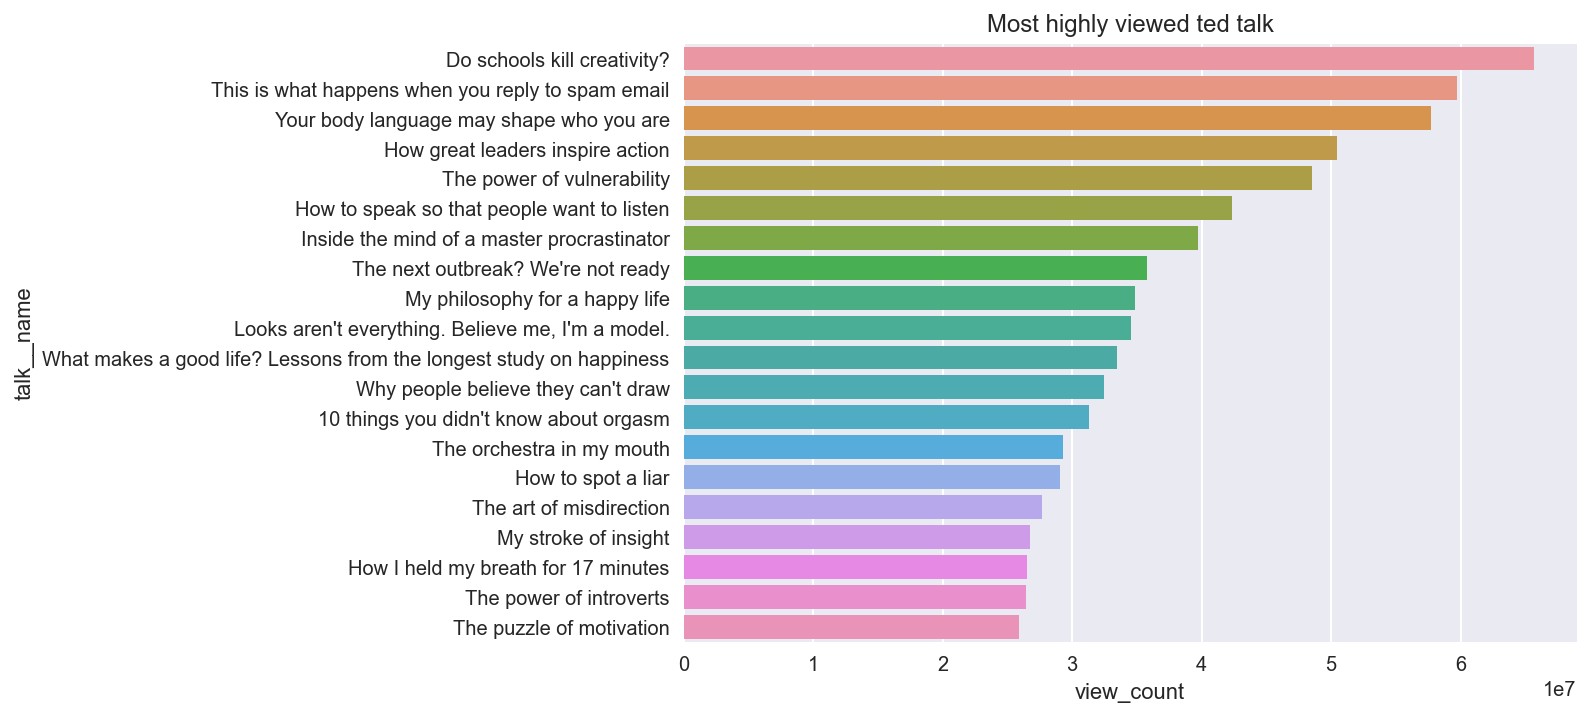

In [88]:
ax = sns.barplot(x="view_count", y="talk__name", data=ted_talk.sort_values('view_count', ascending=False)[:20]).\
set_title('Most highly viewed ted talk')

### Most commented TED talk

- Since we see high correlation between view counts and comment count, lets explore the top 20 most commented TED talk to see does it tally with our most viewed TED talk.
- As can be seen below, Richard Dawkins' talk on Militant Atheism' generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. The topic type (tag) might be the crucial factor that triggers discussion. Since the project is focusing of prediction view count, factors that triggers comment will probably explored in the future.

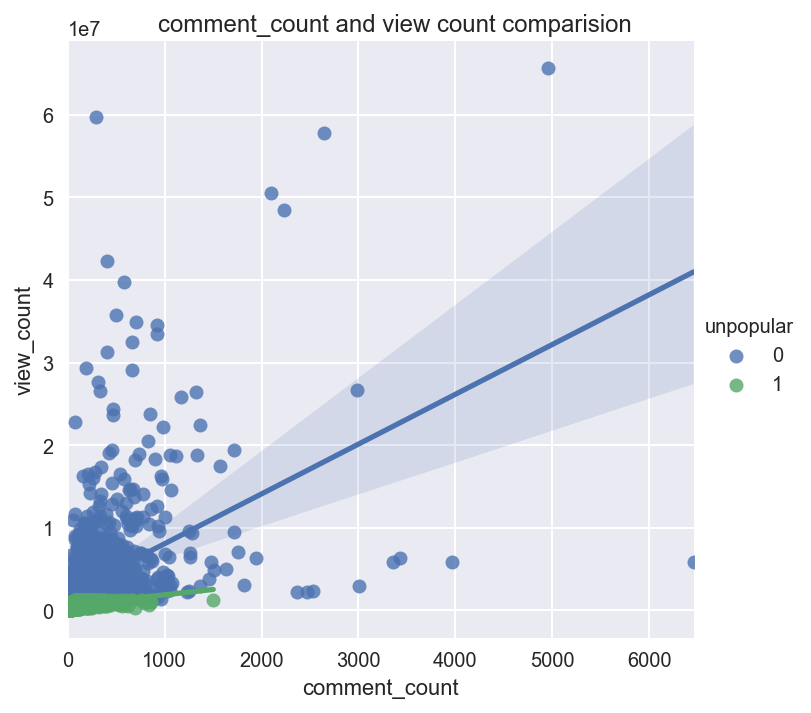

In [89]:
# plot scatter plot
plot_scatter('comment_count')

In [90]:
# check correlation between view count and comment count
ted_talk[['view_count', 'comment_count']].corr()

view_count  comment_count
view_count       1.000000       0.503484
comment_count    0.503484       1.000000

- As the scatterplot and the below correlation matrix show, the pearson coefficient is slightly more than 0.5. This suggests a medium to strong correlation between the two quantities. This result was pretty expected because highly viewed talk will tend to draw more comments as more people watching it.
- Based on below barchart, the most commented talk is on science, religion and culture. Followed by children education which is also the top most view TED talk video.

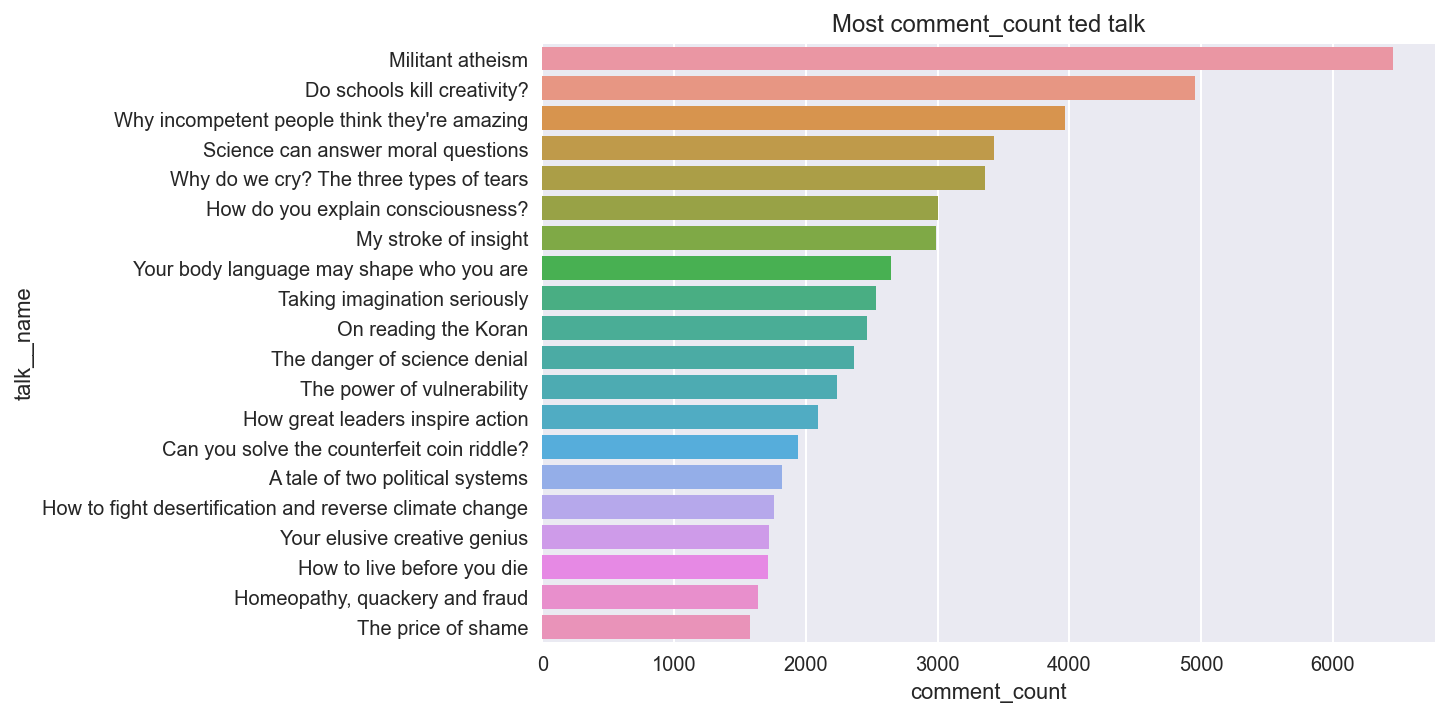

In [91]:
# visual top commented talk and title
ax = sns.barplot(x="comment_count", y="talk__name", data=ted_talk.sort_values('comment_count', ascending=False)[:20]).\
set_title('Most comment_count ted talk')

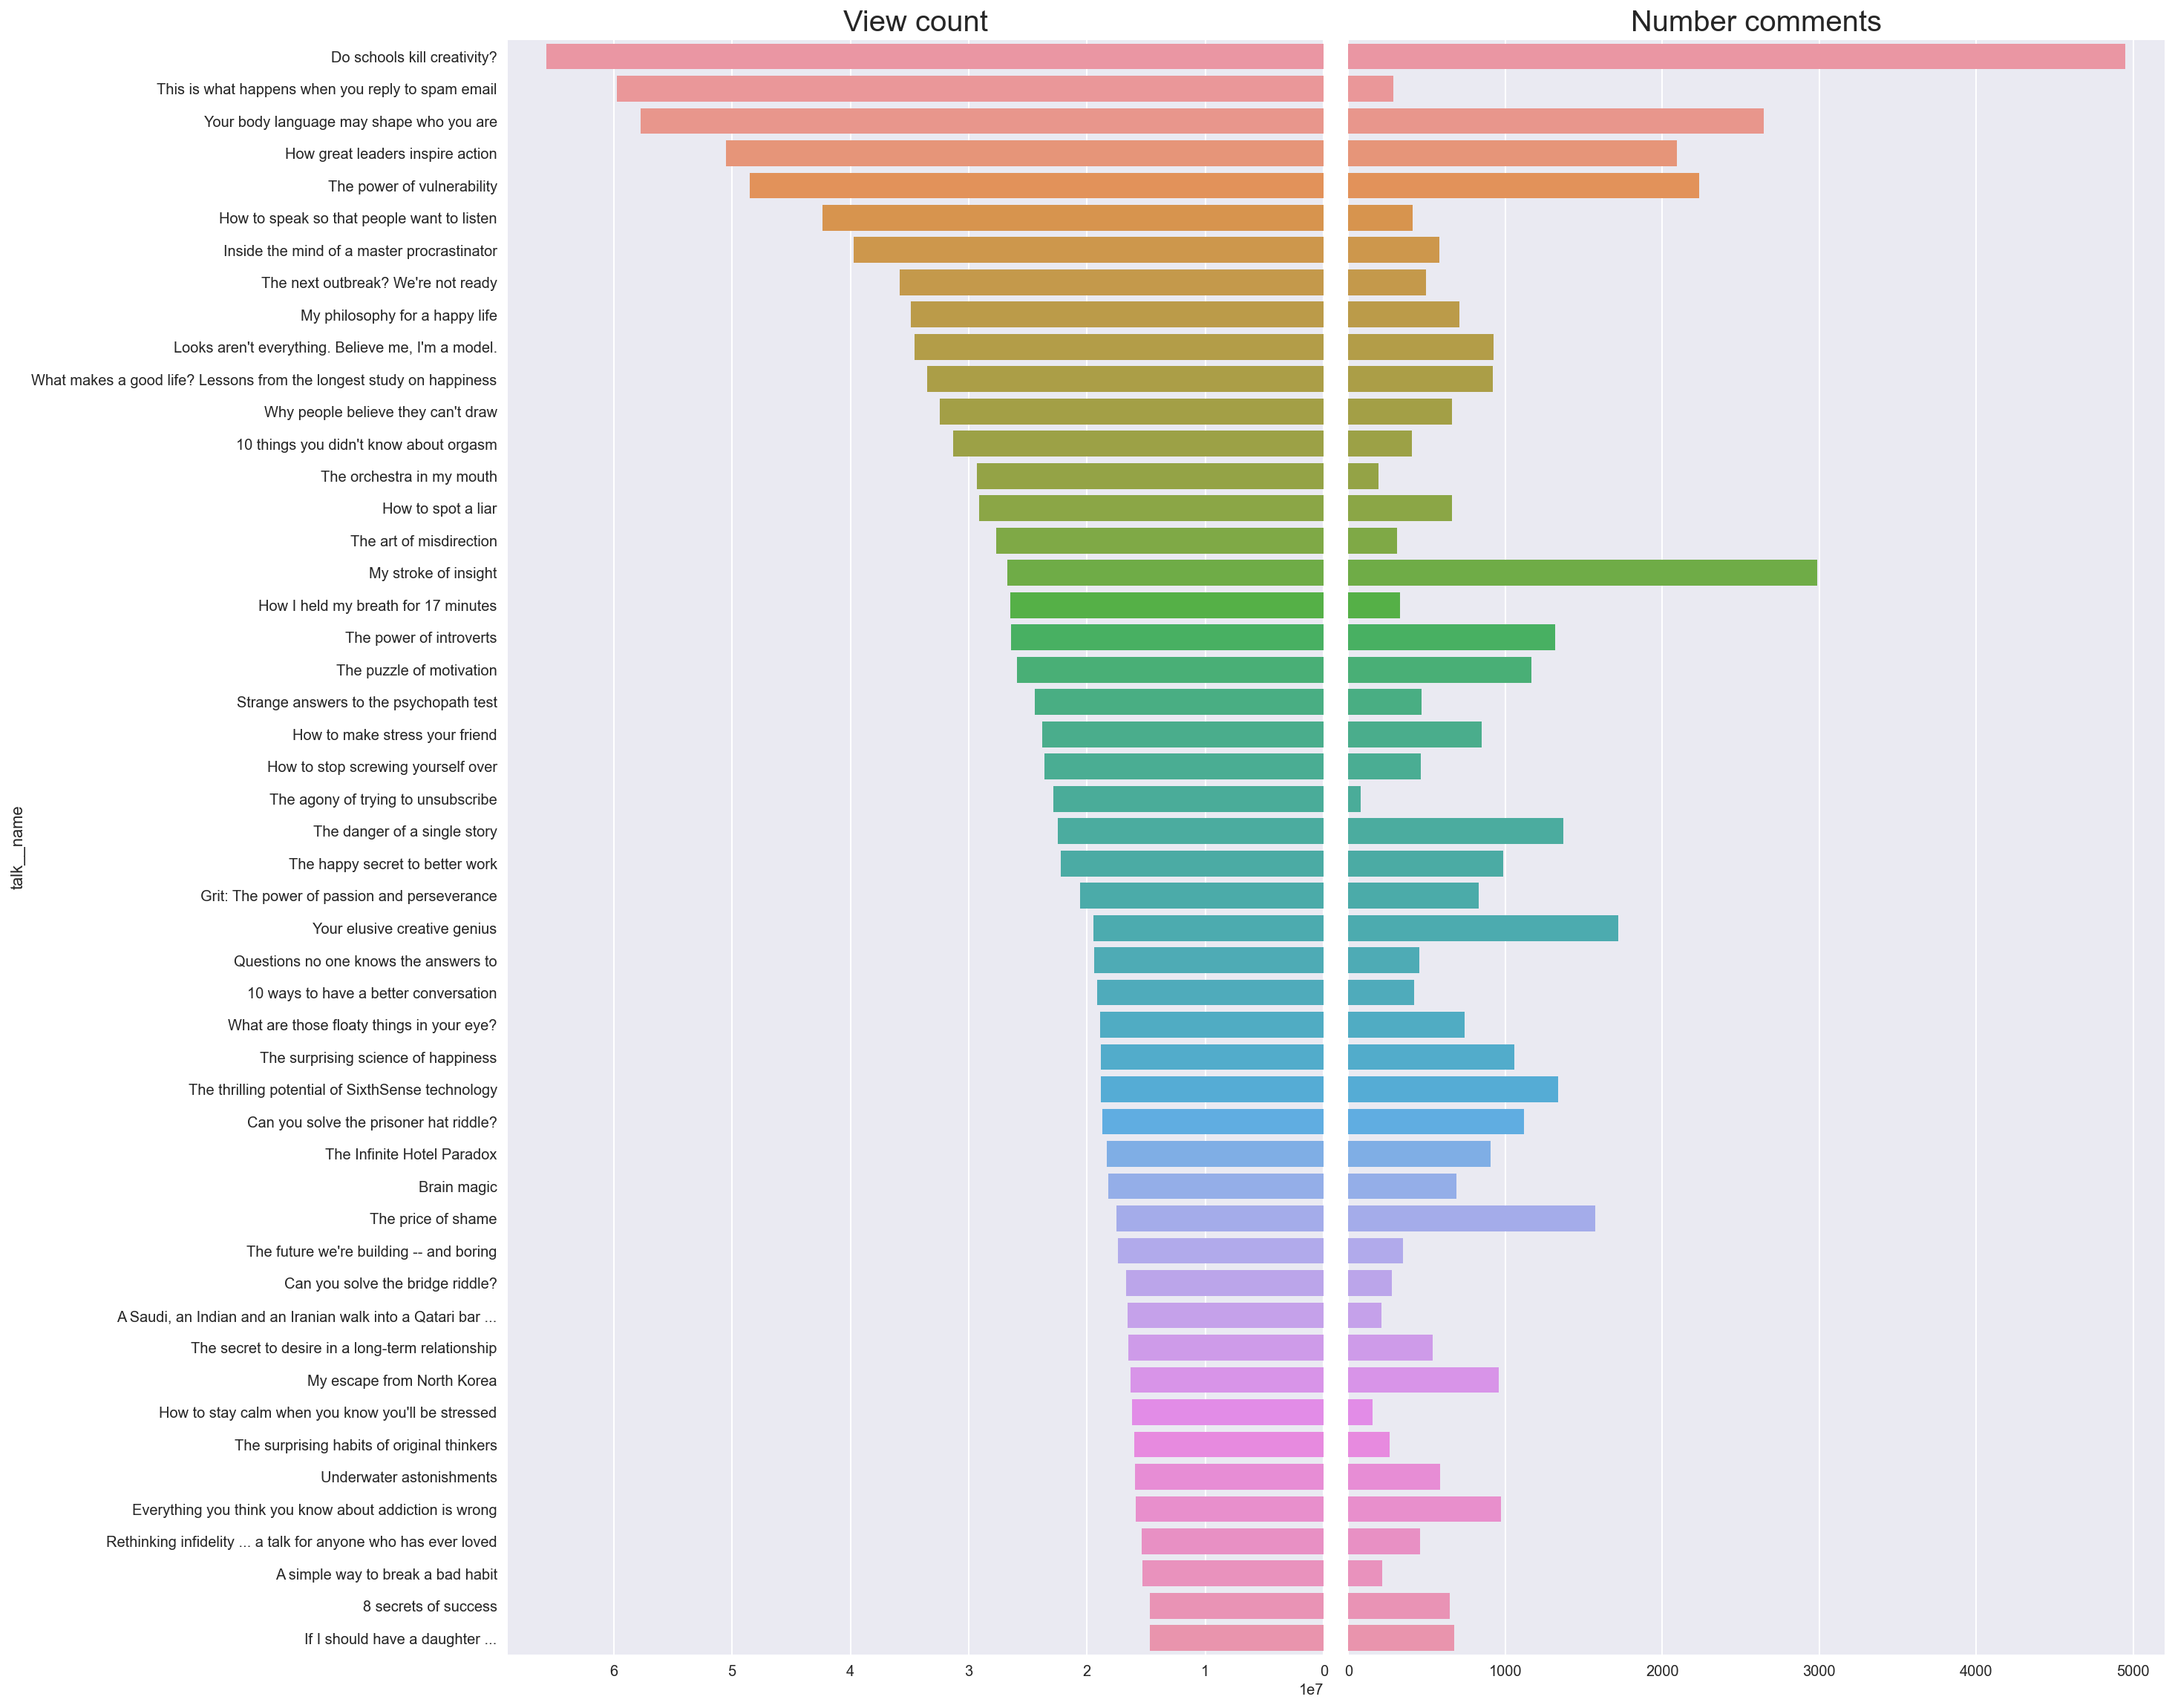

In [92]:
# visualise the relationship of comment count and view count
fig, ax = plt.subplots(1,2,figsize=(20, 20), sharey=True) 
plt.subplots_adjust(wspace=0.03)

# Number view count
# sns.set(font_scale=3)
sns.barplot(y='talk__name', x='view_count', data=ted_talk.sort_values('view_count', ascending=False)[:50], ax=ax[0])
ax[0].set_title('View count',fontsize=20)
ax[0].set_xlabel('')
ax[0].invert_xaxis()

# comment count 
sns.barplot(y='talk__name', x='comment_count', data=ted_talk.sort_values('view_count', ascending=False)[:50],ax=ax[1])
ax[1].set_title('Number comments',fontsize=20)
ax[1].set_ylabel('')
ax[1].set_xlabel('');

Good correlation between the number of comments and view count. This feature is a potential predictive feature for view count.

### TED talks duration analysis
Based on the scatter plot below, duration seems to have fairly strong capability for view count prediction

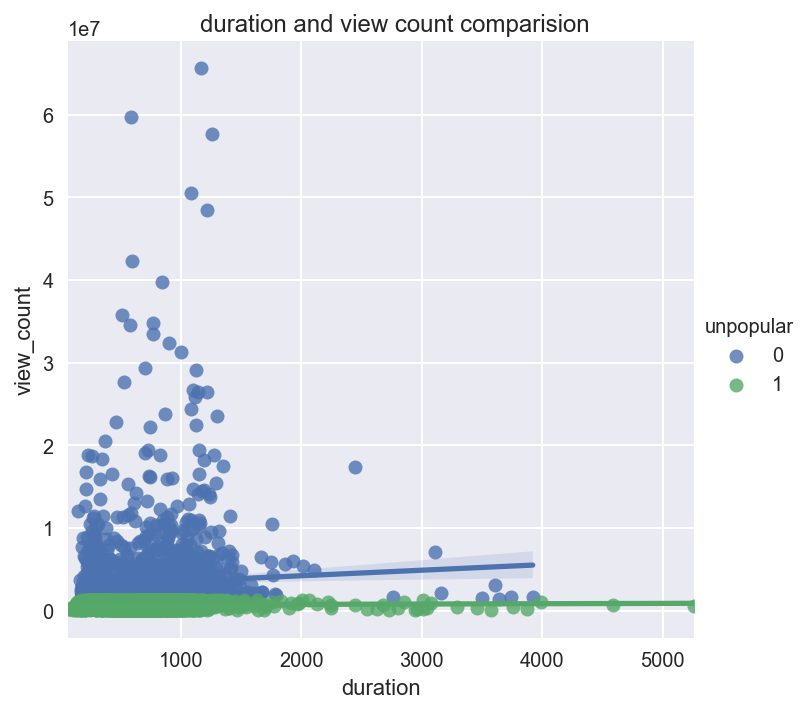

In [93]:
# as mentioned during Summary statistics, Almost all talks range between 1–18 minutes (maximum length of a normal Ted talk).
plot_scatter('duration')
# less than 18min seems to have higher view count

The longest duration TED talk is "Parrots, the universe and everything". It lasts about 1.5hr

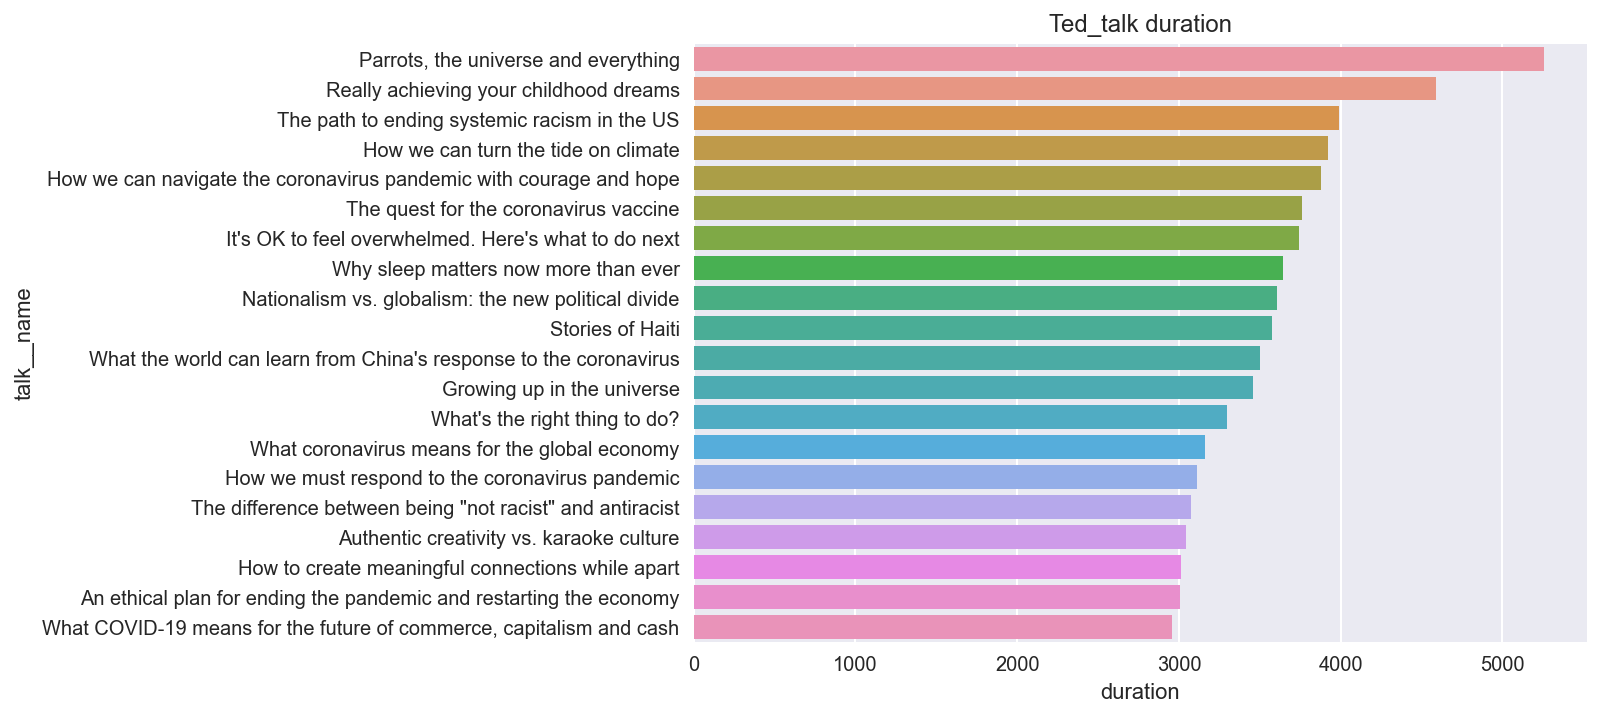

In [94]:
# visual on a barchat

ax = sns.barplot(x="duration", y="talk__name", data=ted_talk.sort_values('duration', ascending=False)[:20]).\
set_title('Ted_talk duration')

## Speaker who talked the longest duration

- Douglas Adams speaks the longest, followed by Randy Pausch.
- 3rd longest talk duration is due to 6 speakers in the same talk.
- 4th longest talk duration is due to 2 speakers in the same talk.

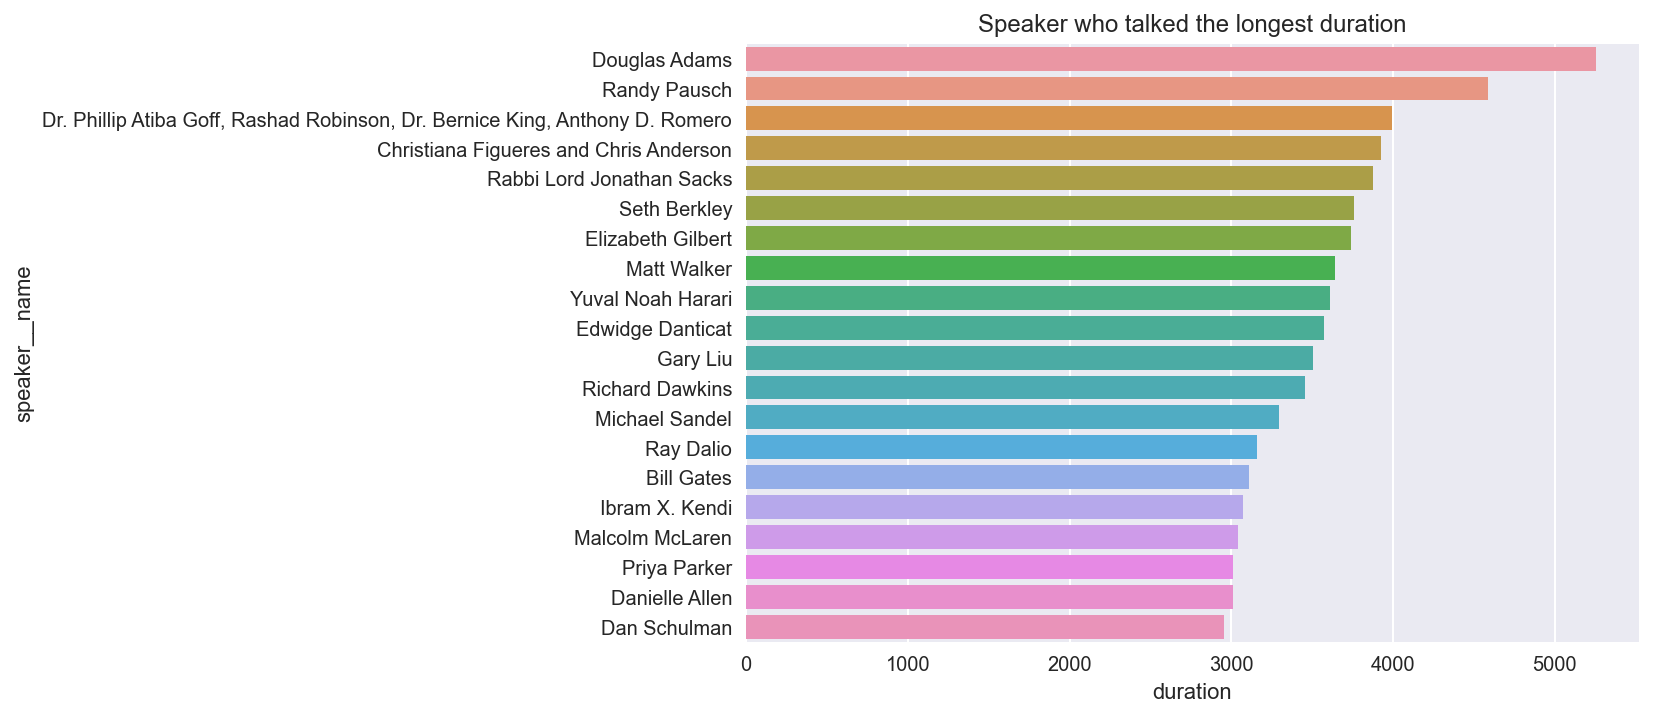

In [95]:
# visual duration on a barchart
ax = sns.barplot(x="duration", y="speaker__name", data=ted_talk.sort_values('duration', ascending=False)[:20]).\
set_title('Speaker who talked the longest duration')

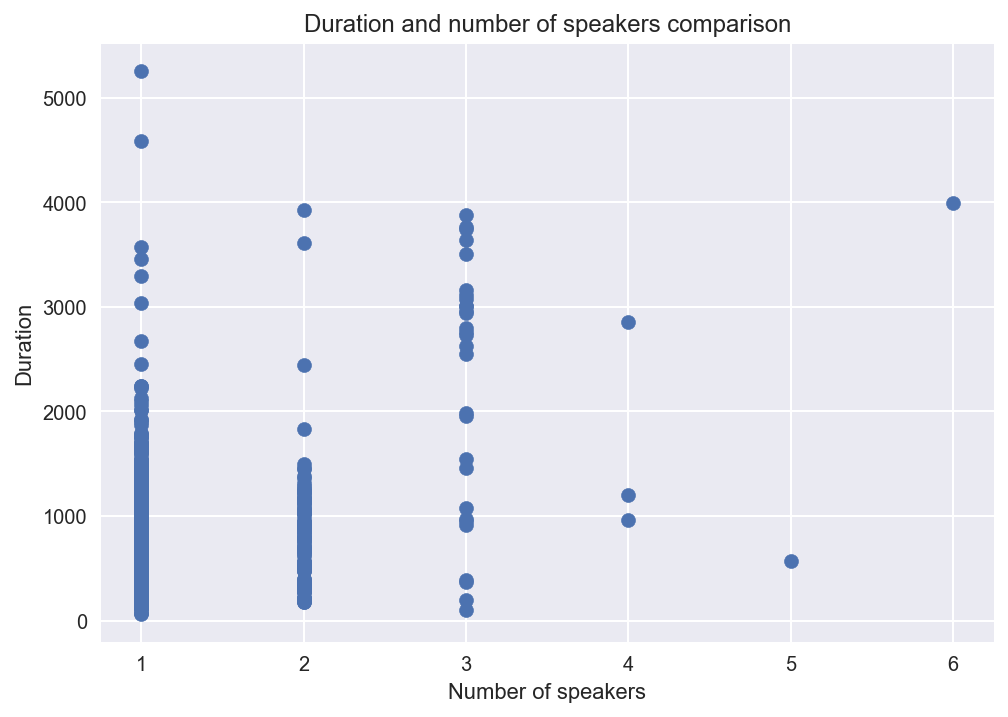

In [96]:
# plot the relationship of number of speakers and talk duration
#sns.set(font_scale=1)
plt.scatter(y="duration", x="number_of__speakers", data=ted_talk)
plt.title('Duration and number of speakers comparison')
plt.xlabel('Number of speakers')
plt.ylabel('Duration');

When the number of speakers increased, the duration of talk increases. However, low number of speaker does not translate to shorter duration

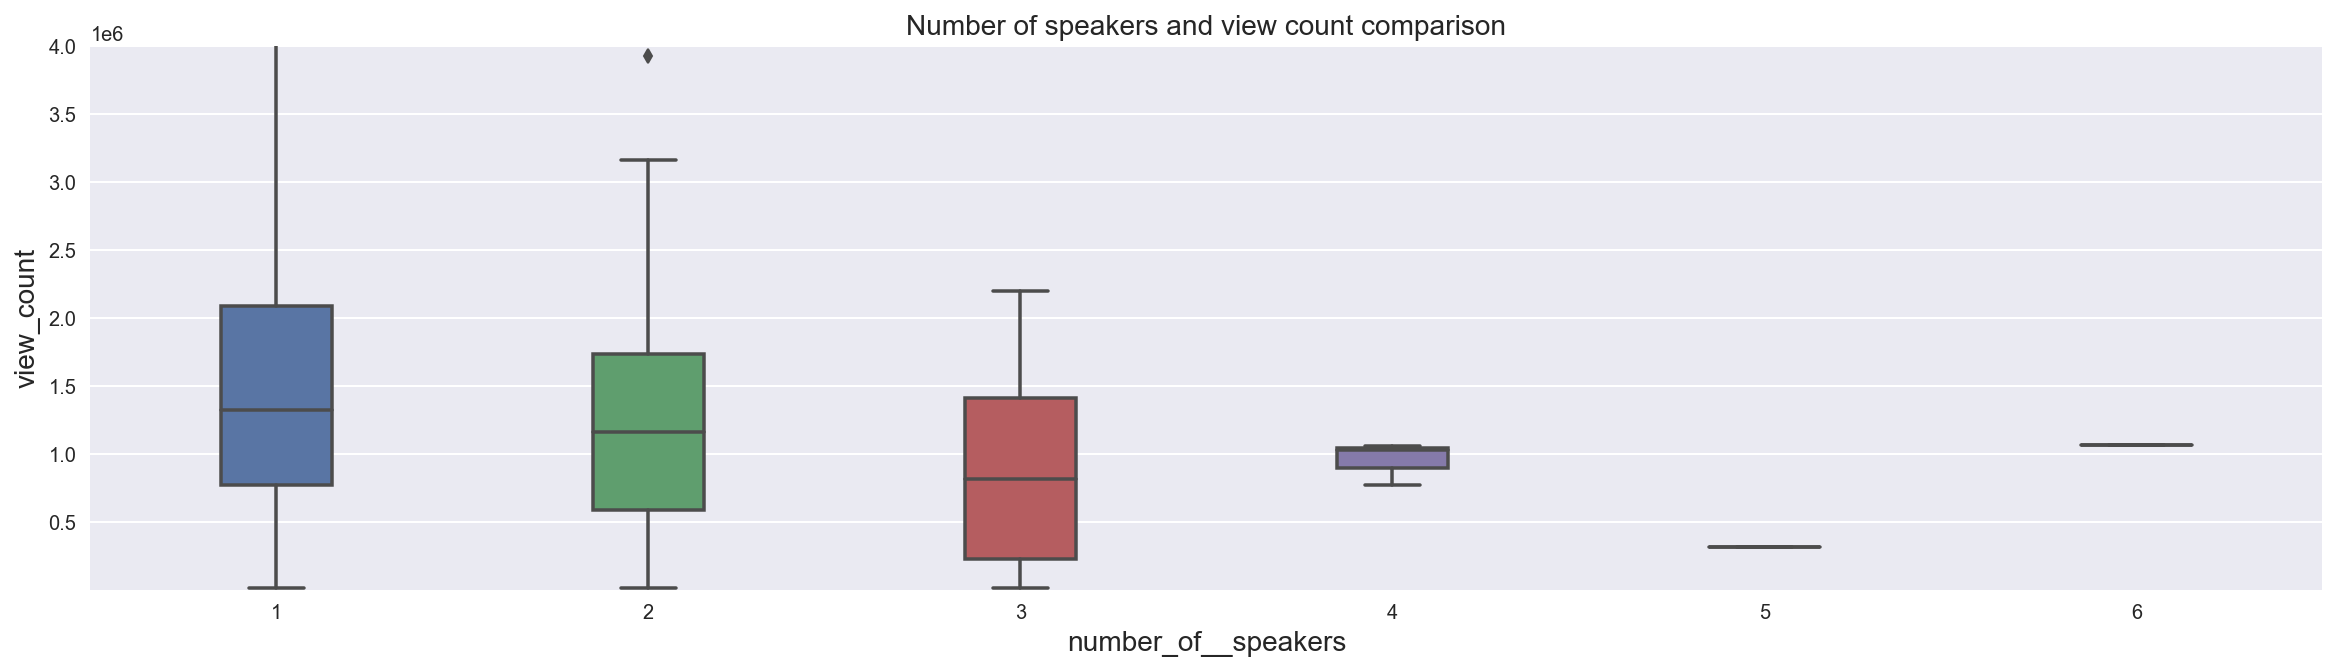

In [97]:
plt.figure(figsize=(20,5))
plt.xlabel("Number of Speakers", fontsize=14)
plt.ylabel("View count", fontsize=14)
plt.title("Number of speakers and view count comparison", fontsize=14)
sns.boxplot(x = ted_talk['number_of__speakers'], y = ted_talk.view_count, width = 0.3)

# cut off at a smaller y axis limit for a better view of bulk of the data
plt.ylim(6, 0.4e7);

Higher number of speakers does not correlates to the view count. In fact, view count is inversely proportional to number of speakers

### Speaker who appeared the most number of times

In [98]:
# group the number of appearances according to the name of the speaker
speaker_num = ted_talk.groupby('speaker__name').count().reset_index()[['speaker__name', 'view_count']]
speaker_num.columns = ['speaker__name', 'appearances']
speaker_num = speaker_num.sort_values('speaker__name', ascending=False)
speaker_num.head(10)

speaker__name  appearances
3648          Özlem Cekic            1
3647        tobacco brown            1
3646    iO Tillett Wright            1
3645              eL Seed            2
3644          Zubaida Bai            1
3643       Zohreh Davoudi            1
3642         Ziyah Gafić            1
3641   Ziauddin Yousafzai            1
3640       Zeynep Tufekci            3
3639  Zeresenay Alemseged            1

In [99]:
# group view count by month year to study the view count based on speaker name
# This is to aggregate speaker name by view count
view_count_speaker = ted_talk.groupby('speaker__name').sum().reset_index()[['speaker__name', 'view_count']].sort_values('speaker__name', ascending=False)
view_count_speaker.columns = ['speaker__name', 'view_count_by_speaker']

view_count_speaker.head()

speaker__name  view_count_by_speaker
3648        Özlem Cekic                1879512
3647      tobacco brown                1305632
3646  iO Tillett Wright                2990464
3645            eL Seed                2558066
3644        Zubaida Bai                 982994

In [100]:
# form dataframe for speakername, appearance and view count. 
# this is to study any relationship between appearances and view count

speaker_num = pd.merge(speaker_num, view_count_speaker, on=['speaker__name'], sort=False)
speaker_num = speaker_num.sort_values('view_count_by_speaker', ascending=False)
speaker_num.head()

speaker__name  appearances  view_count_by_speaker
3550      Alex Gendler           34              122551419
444   Sir Ken Robinson            4               87487259
2122      James Veitch            2               82594122
450        Simon Sinek            2               63746828
3171       Brené Brown            2               62568559

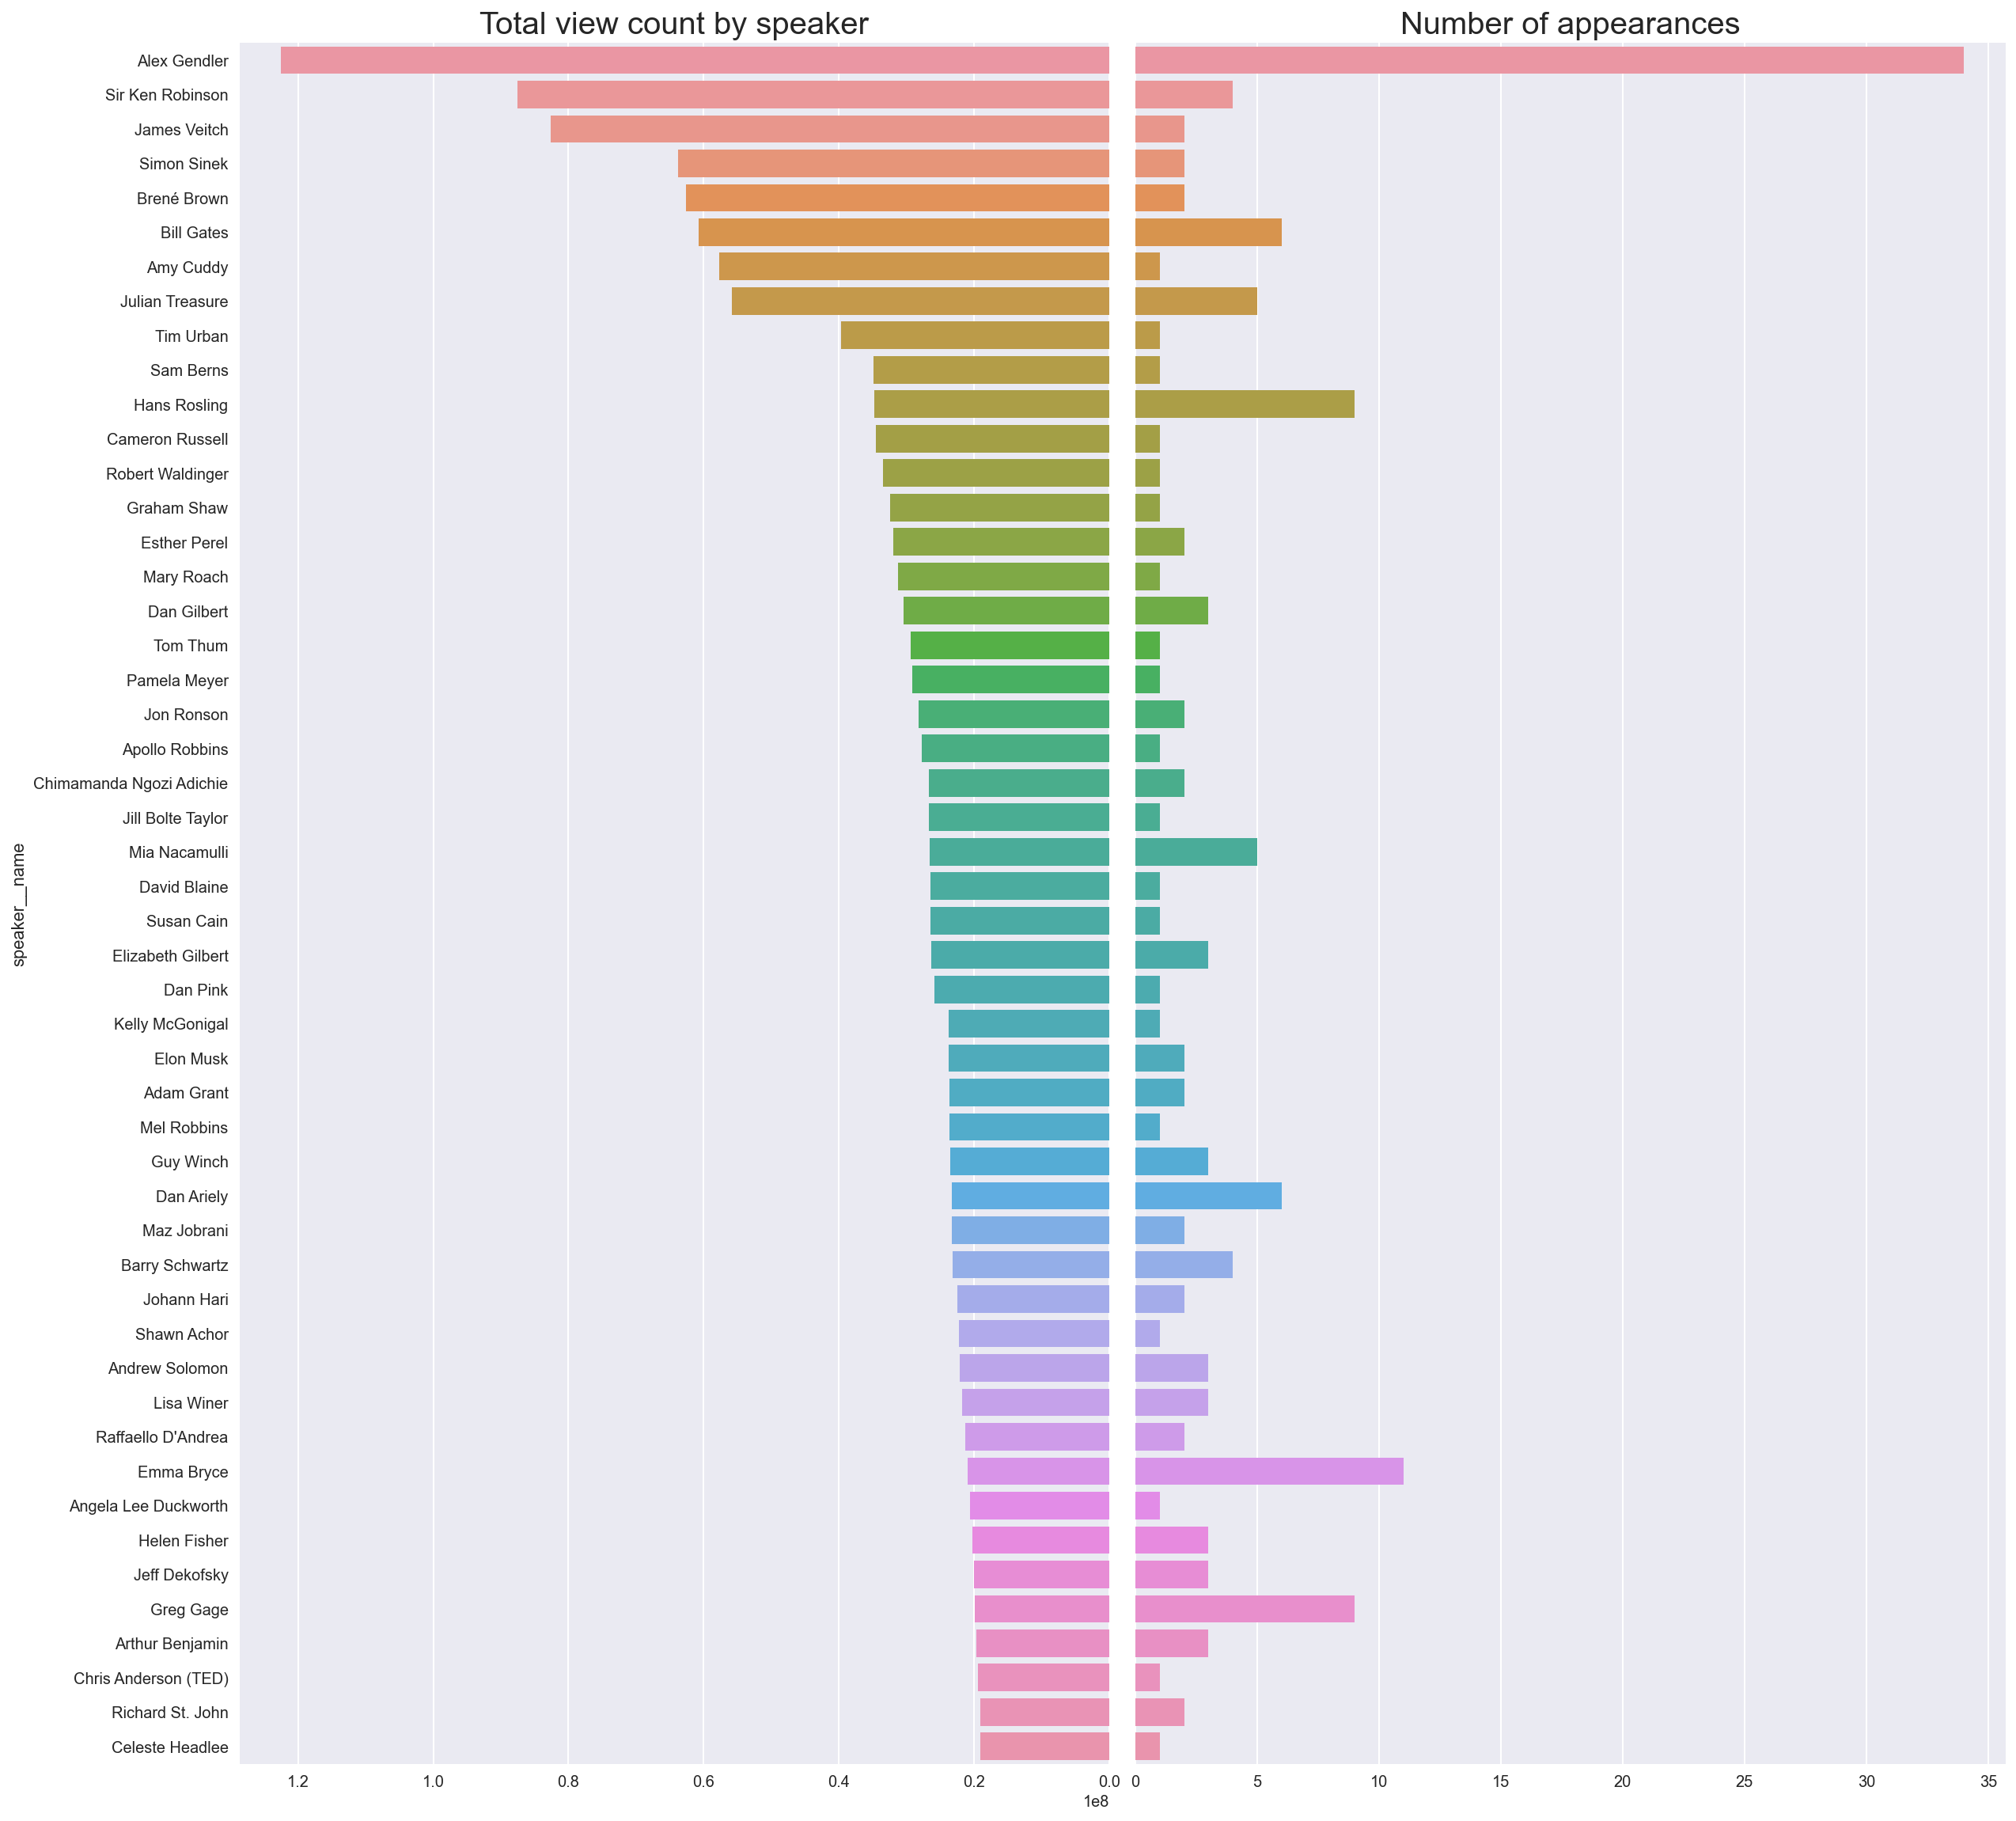

In [101]:
# visualization 
fig, ax = plt.subplots(1,2,figsize=(20, 20), sharey=True) 
plt.subplots_adjust(wspace=0.03)

# Number of appearances
#sns.set(font_scale=2)
sns.barplot(y='speaker__name', x='view_count_by_speaker', data=speaker_num.head(50), ax=ax[0])
ax[0].set_title('Total view count by speaker',fontsize=20)
ax[0].set_xlabel('')
ax[0].invert_xaxis()


# View count by speaker
sns.barplot(y='speaker__name', x='appearances', data=speaker_num.head(50),ax=ax[1])
ax[1].set_title('Number of appearances',fontsize=20)
ax[1].set_ylabel('')
ax[1].set_xlabel('');

Increase in number of appearances on Ted Talk have weak correlation to total view count by speaker

### Which are the most highly viewed TED topics(tags)?

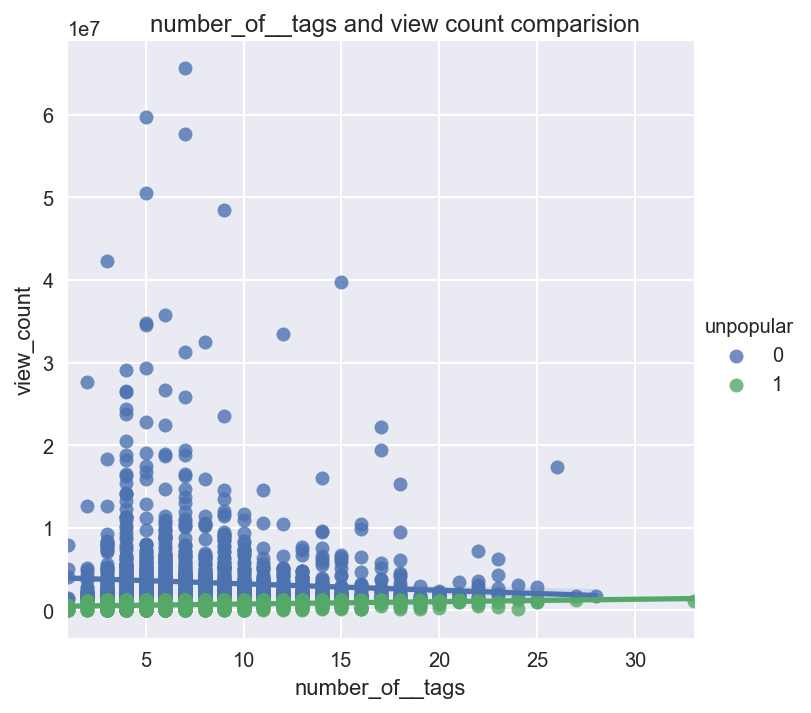

In [102]:
# scatter plot to study view count relationship with number of topics
plot_scatter('number_of__tags')

View count is higher for number of tags seems to be higher between 3 to 8

In [103]:
# import stop_words = english
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Hong
[nltk_data]     Yee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
# apply additional stop words
additional_stopwords = {'tedx', 'ted'}
stop_words = stop_words.union(additional_stopwords)

In [105]:
# apply stop_word = english and additional stopwords to the tag column
ted_talk['talks__tags'] = ted_talk['talks__tags'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Top topics(tags) frequent topic is science 1197 counts, technology 1045 counts, health 1014 counts, change 734 counts, culture 714 counts, global 702 counts. This aligns with TED's vision to seek a deeper understanding of the world, through passionately in the power of ideas to change attitudes, lives.

In [106]:
# Top words from talks_tags using Countvectorization

cvec = CountVectorizer(stop_words='english')
cvec.fit(ted_talk['talks__tags'])

len_features = len(cvec.get_feature_names())
print("Total number of feature length for topics is:", len_features)

ted_50_cv = pd.DataFrame(cvec.transform(ted_talk['talks__tags']).todense(),columns=cvec.get_feature_names())

top_ted_50 = ted_50_cv.sum(axis=0)
top_ted_50 = top_ted_50.sort_values(ascending = False).head(50)
top_ted_50

Total number of feature length for topics is: 472


science          1197
technology       1045
health           1014
change            734
culture           714
global            702
design            684
social            653
issues            598
society           598
business          545
animation         518
biology           479
art               454
education         437
history           433
humanity          414
innovation        399
entertainment     366
communication     348
future            344
creativity        338
music             327
community         316
activism          294
economics         288
medicine          282
brain             269
collaboration     268
life              261
personal          252
growth            252
psychology        247
environment       246
care              245
women             243
nature            233
fellows           229
invention         226
politics          221
performance       220
children          214
identity          214
work              213
animals           211
human     

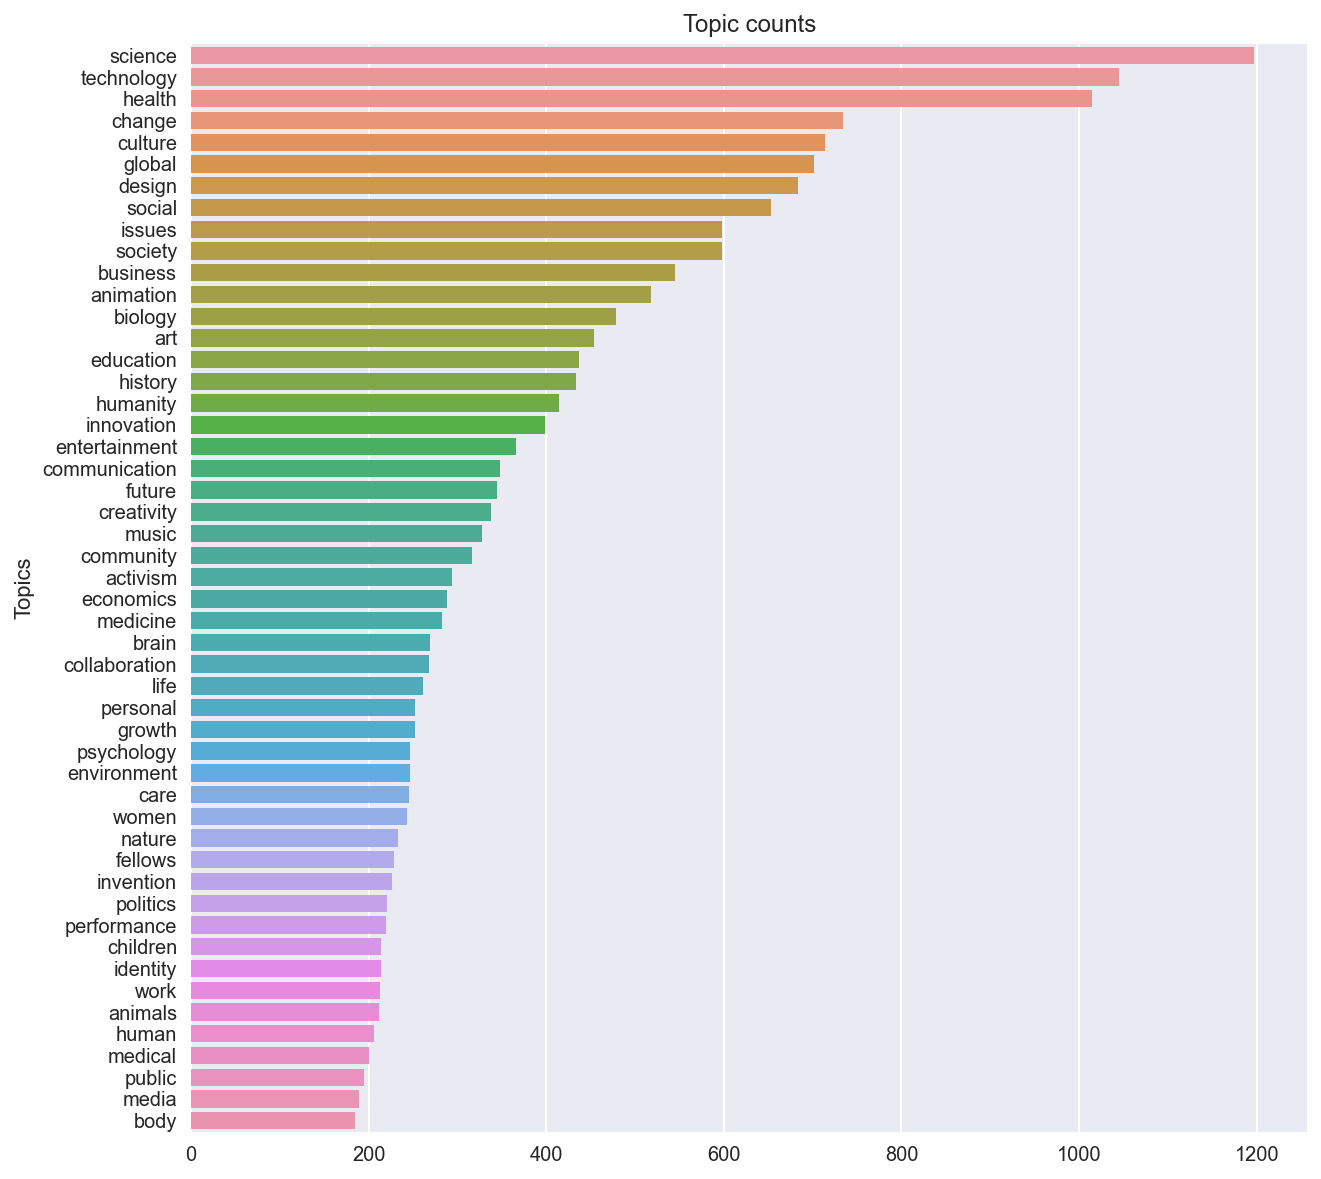

In [107]:
# visualise into barchart for the above results
plt.figure(figsize=(10,10))
plt.ylabel('Topics')
sns.barplot(y=top_ted_50.index.values, x = top_ted_50).set_title('Topic counts');

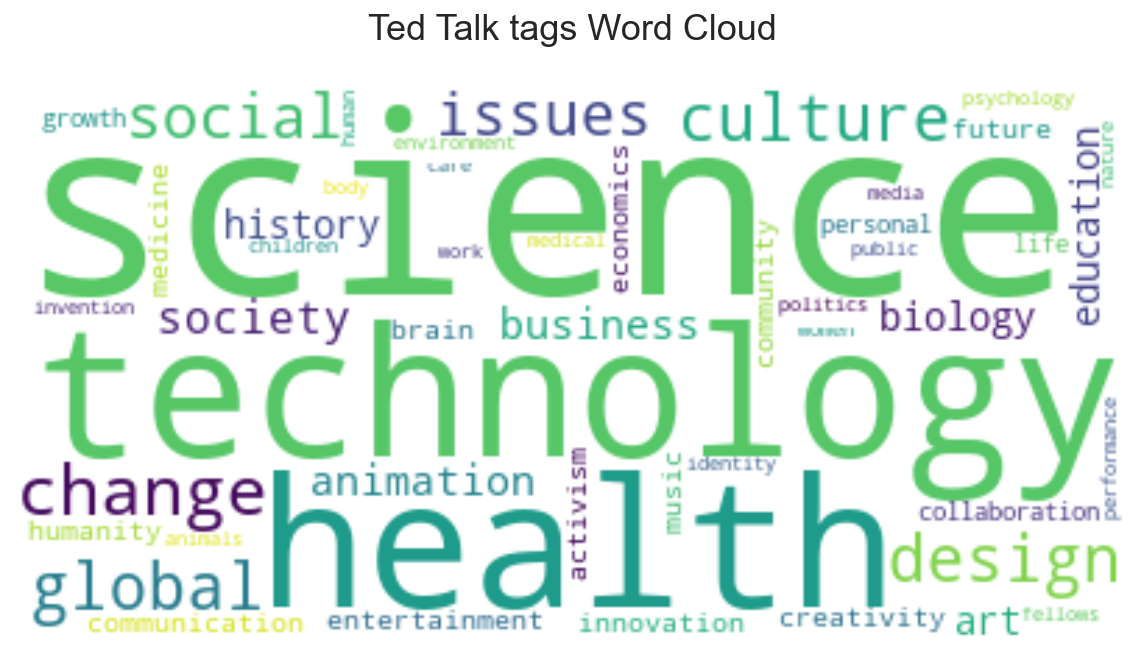

In [108]:
# visualise into wordcloud comparison for title

wc_tags = WordCloud(background_color="white", max_words=50, max_font_size=90, random_state=42)
wc_tags.generate_from_frequencies(top_ted_50)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))

ax.imshow(wc_tags, interpolation='bilinear')
ax.axis("off")
ax.set_title('Ted Talk tags Word Cloud', pad = 24, fontsize=18);

In [109]:
# Apply n_gram to exlore more meanings to the topics
# Top words from talks_tags using Countvectorization for n_gram

cvec = CountVectorizer(ngram_range=(2,2), stop_words='english')
cvec.fit(ted_talk['talks__tags'])

len_features = len(cvec.get_feature_names())
print("Total number of feature length for topics 2 grams is:", len_features)

ted_50_cv_ngram = pd.DataFrame(cvec.transform(ted_talk['talks__tags']).todense(),columns=cvec.get_feature_names())

top_ted_50_ngram = ted_50_cv_ngram.sum(axis=0)
top_ted_50_ngram = top_ted_50_ngram.sort_values(ascending = False).head(50)
top_ted_50_ngram

Total number of feature length for topics 2 grams is: 12320


global issues            598
social change            551
personal growth          252
health care              245
science technology       191
climate change           183
medical research         181
human body               172
public health            164
live music               132
change society           130
mental health            116
world cultures           107
united states            103
health health             93
social media              89
global development        85
music performance         83
gender equality           81
big problems              78
cognitive science         73
society social            72
decision making           67
ancient world             64
product design            63
creativity design         60
culture entertainment     57
culture design            56
medicine science          56
design entertainment      54
performance art           53
economics global          52
goal setting              51
animation education       51
music music   

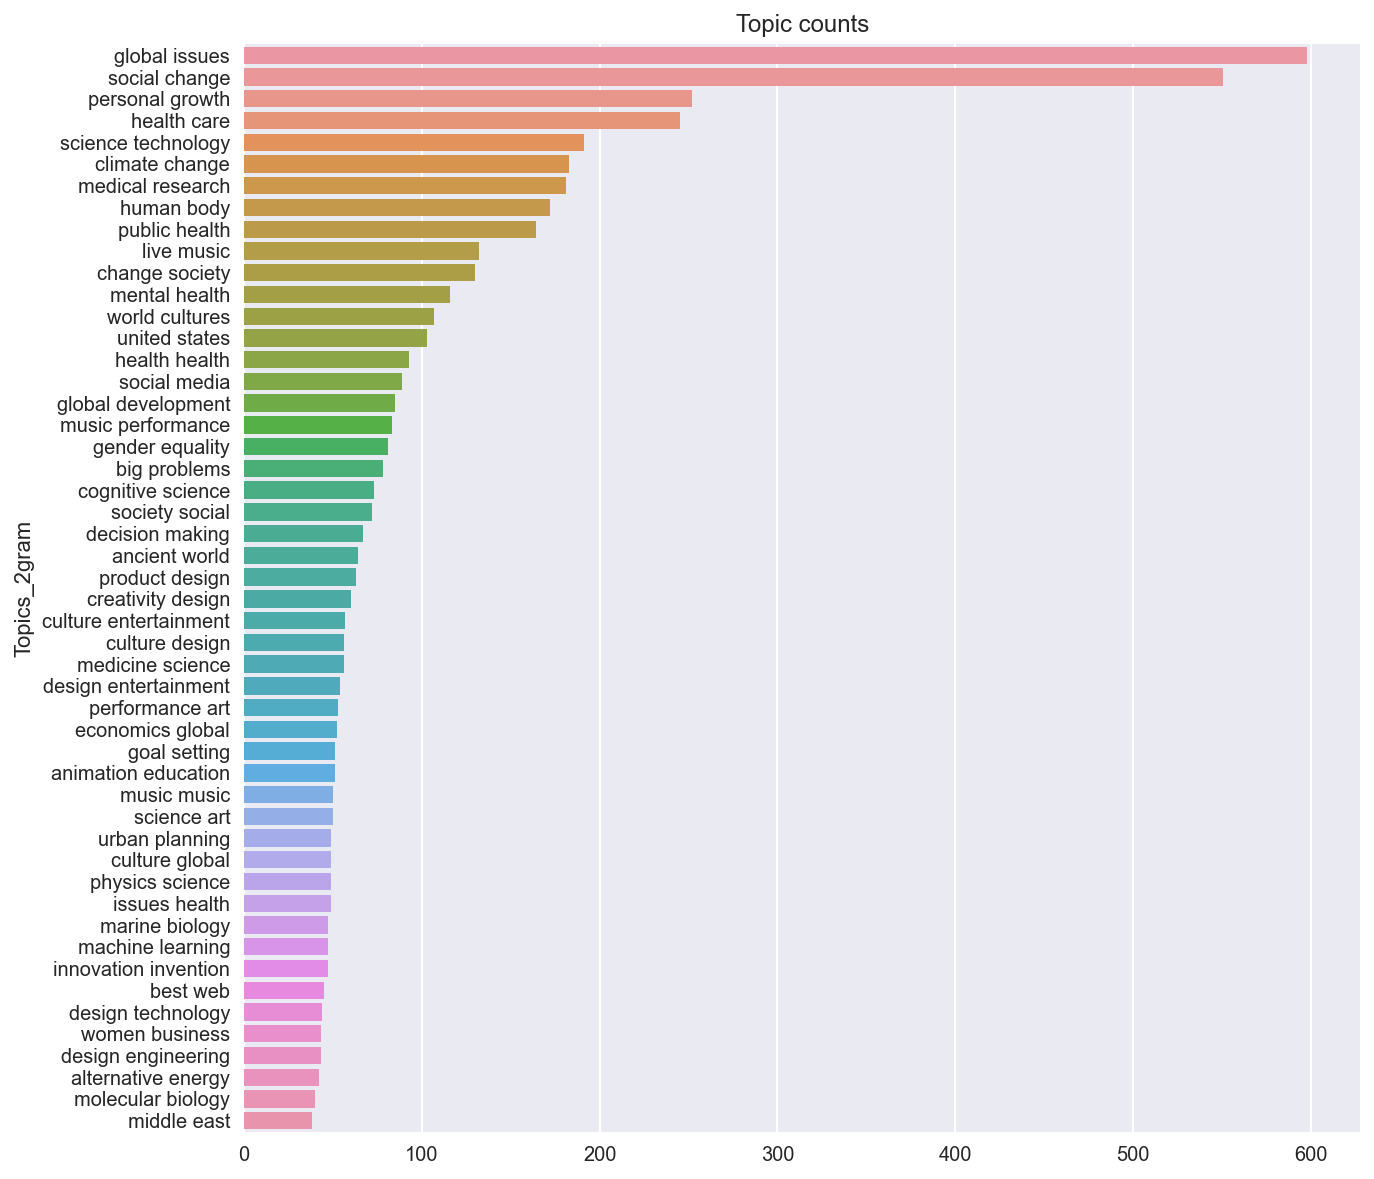

In [110]:
# visualise n_gram into barchart
plt.figure(figsize=(10,10))
plt.ylabel('Topics_2gram')
sns.barplot(y=top_ted_50_ngram.index.values, x = top_ted_50_ngram).set_title('Topic counts');

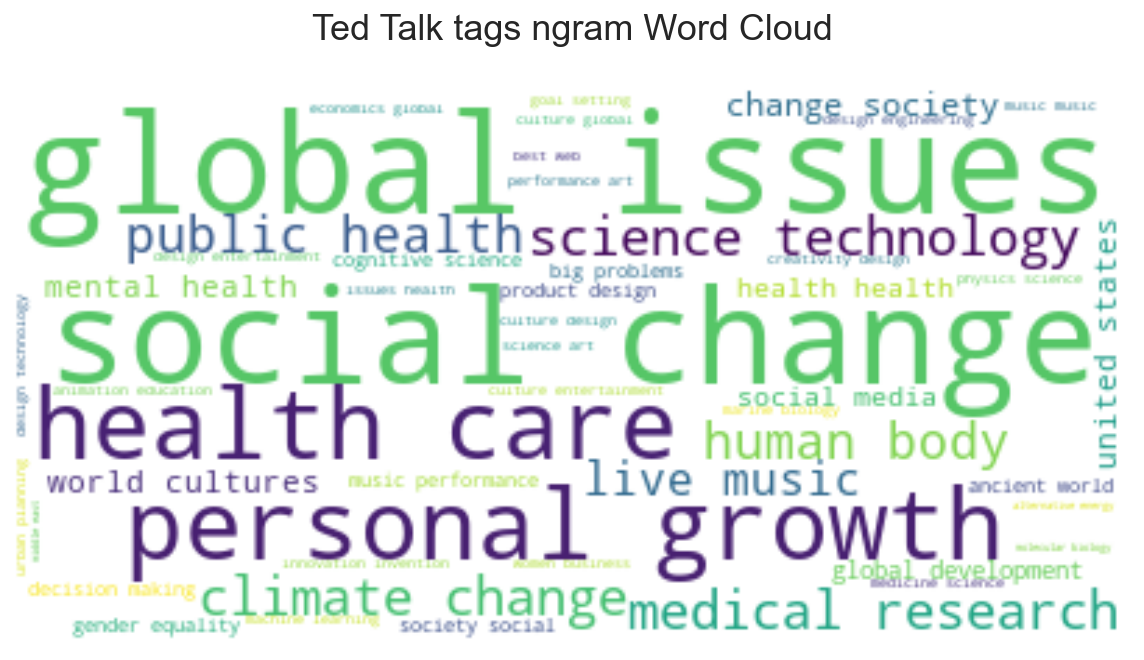

In [111]:
# visual n_gram into wordcloud comparison for title

wc_tags = WordCloud(background_color="white", max_words=50, max_font_size=90, random_state=42)
wc_tags.generate_from_frequencies(top_ted_50_ngram)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))

ax.imshow(wc_tags, interpolation='bilinear')
ax.axis("off")
ax.set_title('Ted Talk tags ngram Word Cloud', pad = 24, fontsize=18);

**Summary of countvectorizer results for topic analysis**

- Top common words identified using countvectorizer is science technology health.
- Top common bi_gram words identified y=using countvectorizer is global issues, social change and personal growth.

n_gram seems to bring more meaning to the most common tags

**Using view counts to aggregate topics**

In [112]:
# create a dataframe to analyze view count and topic
tag = ted_talk[['talks__tags','view_count', 'talk__name']]
tag.head()

talks__tags  \
0                     children creativity culture dance education parenting teaching   
1                                    comedy curiosity communication humor technology   
2                       body language brain business psychology self success science   
3                                           business entrepreneur leadership success   
4  communication culture depression fear mental health psychology self social change   

   view_count                                         talk__name  
0    65678748                        Do schools kill creativity?  
1    59725446  This is what happens when you reply to spam email  
2    57734063           Your body language may shape who you are  
3    50494918                   How great leaders inspire action  
4    48503432                         The power of vulnerability

In [113]:
# create for loop to aggregate view count with tags
data = []

for _,row in tag.iterrows():
    desc_list = row['talks__tags'].split()
    for word in desc_list:
        new_row = [word, row['view_count'], row['talk__name']]
        data.append(new_row)
new_tag = pd.DataFrame(data, columns=['talks_tag', 'view_count', 'talk__name'])

In [114]:
# display results
new_tag.head(20)

talks_tag  view_count  \
0        children    65678748   
1      creativity    65678748   
2         culture    65678748   
3           dance    65678748   
4       education    65678748   
5       parenting    65678748   
6        teaching    65678748   
7          comedy    59725446   
8       curiosity    59725446   
9   communication    59725446   
10          humor    59725446   
11     technology    59725446   
12           body    57734063   
13       language    57734063   
14          brain    57734063   
15       business    57734063   
16     psychology    57734063   
17           self    57734063   
18        success    57734063   
19        science    57734063   

                                           talk__name  
0                         Do schools kill creativity?  
1                         Do schools kill creativity?  
2                         Do schools kill creativity?  
3                         Do schools kill creativity?  
4                         Do schools kill creativity?  
5                         Do schools kill creativity?  
6                         Do schools kill creativity?  
7   This is what happens when you reply to spam email  
8   This is what happens when you reply to spam email  
9   This is what happens when you reply to spam email  
10  This is what happens when you reply to spam email  
11  This is what happens when you reply to spam email  
12           Your body language may shape who you are  
13           Your body language may shape who you are  
14           Your body language may shape who you are  
15           Your body language may shape who you are  
16           Your body language may shape who you are  
17           Your body language may shape who you are  
18           Your body language may shape who you are  
19           Your body language may shape who you are

In [115]:
# display the number of rows
new_tag.shape

(37513, 3)

In [116]:
# sort the tags based on view count
new_tag = new_tag.sort_values('view_count', ascending=False).head(100)
new_tag

talks_tag  view_count  \
0          children    65678748   
4         education    65678748   
6          teaching    65678748   
5         parenting    65678748   
1        creativity    65678748   
3             dance    65678748   
2           culture    65678748   
7            comedy    59725446   
10            humor    59725446   
11       technology    59725446   
8         curiosity    59725446   
9     communication    59725446   
13         language    57734063   
14            brain    57734063   
15         business    57734063   
16       psychology    57734063   
17             self    57734063   
18          success    57734063   
19          science    57734063   
12             body    57734063   
22       leadership    50494918   
23          success    50494918   
20         business    50494918   
21     entrepreneur    50494918   
29           health    48503432   
33           change    48503432   
32           social    48503432   
31             self    48503432   
30       psychology    48503432   
28           mental    48503432   
27             fear    48503432   
26       depression    48503432   
25          culture    48503432   
24    communication    48503432   
34          culture    42330489   
35            sound    42330489   
36           speech    42330489   
46             mind    39714672   
54           choice    39714672   
53          writing    39714672   
52             work    39714672   
51   visualizations    39714672   
50             time    39714672   
49            video    39714672   
48           online    39714672   
47     productivity    39714672   
45         internet    39714672   
43          setting    39714672   
42             goal    39714672   
41    entertainment    39714672   
40           making    39714672   
39         decision    39714672   
38           comedy    39714672   
44            humor    39714672   
37            brain    39714672   
61         medicine    35814459   
59           global    35814459   
62              war    35814459   
60           issues    35814459   
56           relief    35814459   
58            ebola    35814459   
57          disease    35814459   
55         disaster    35814459   
66           growth    34858496   
68       motivation    34858496   
67             self    34858496   
63             life    34858496   
65         personal    34858496   
64        happiness    34858496   
69           beauty    34572281   
70          culture    34572281   
71          fashion    34572281   
72      photography    34572281   
83             life    33478530   
82             work    33478530   
79    relationships    33478530   
84          balance    33478530   
85       friendship    33478530   
81             time    33478530   
80          society    33478530   
73            aging    33478530   
77             life    33478530   
76         humanity    33478530   
75           health    33478530   
74             data    33478530   
78        happiness    33478530   
91           growth    32441676   
94    communication    32441676   
93     presentation    32441676   
92       creativity    32441676   
89        potential    32441676   
90         personal    32441676   
88           design    32441676   
87              art    32441676   
86             arts    32441676   
99              sex    31285464   
101           books    31285464   
100         writing    31285464   
98          science    31285464   
95          culture    31285464   

                                                              talk__name  
0                                            Do schools kill creativity?  
4                                            Do schools kill creativity?  
6                                            Do schools kill creativity?  
5                                            Do schools kill creativity?  
1                                            Do schools kill creativity?  
3                       

In [117]:
# group same tags into 1 to obtain a boxplot based on view count
tags = pd.DataFrame(new_tag['view_count'].groupby(new_tag['talks_tag']).sum())
tags = tags.sort_values('view_count', ascending=False).head(30)
tags

view_count
talks_tag                
culture         222370414
self            141095991
communication   140670554
success         108228981
business        108228981
psychology      106237495
life            101815556
humor            99440118
comedy           99440118
creativity       98120424
brain            97448735
science          89019527
health           81981962
work             73193202
time             73193202
writing          71000136
happiness        68337026
growth           67300172
personal         67300172
teaching         65678748
parenting        65678748
education        65678748
dance            65678748
children         65678748
curiosity        59725446
technology       59725446
body             57734063
language         57734063
entrepreneur     50494918
leadership       50494918

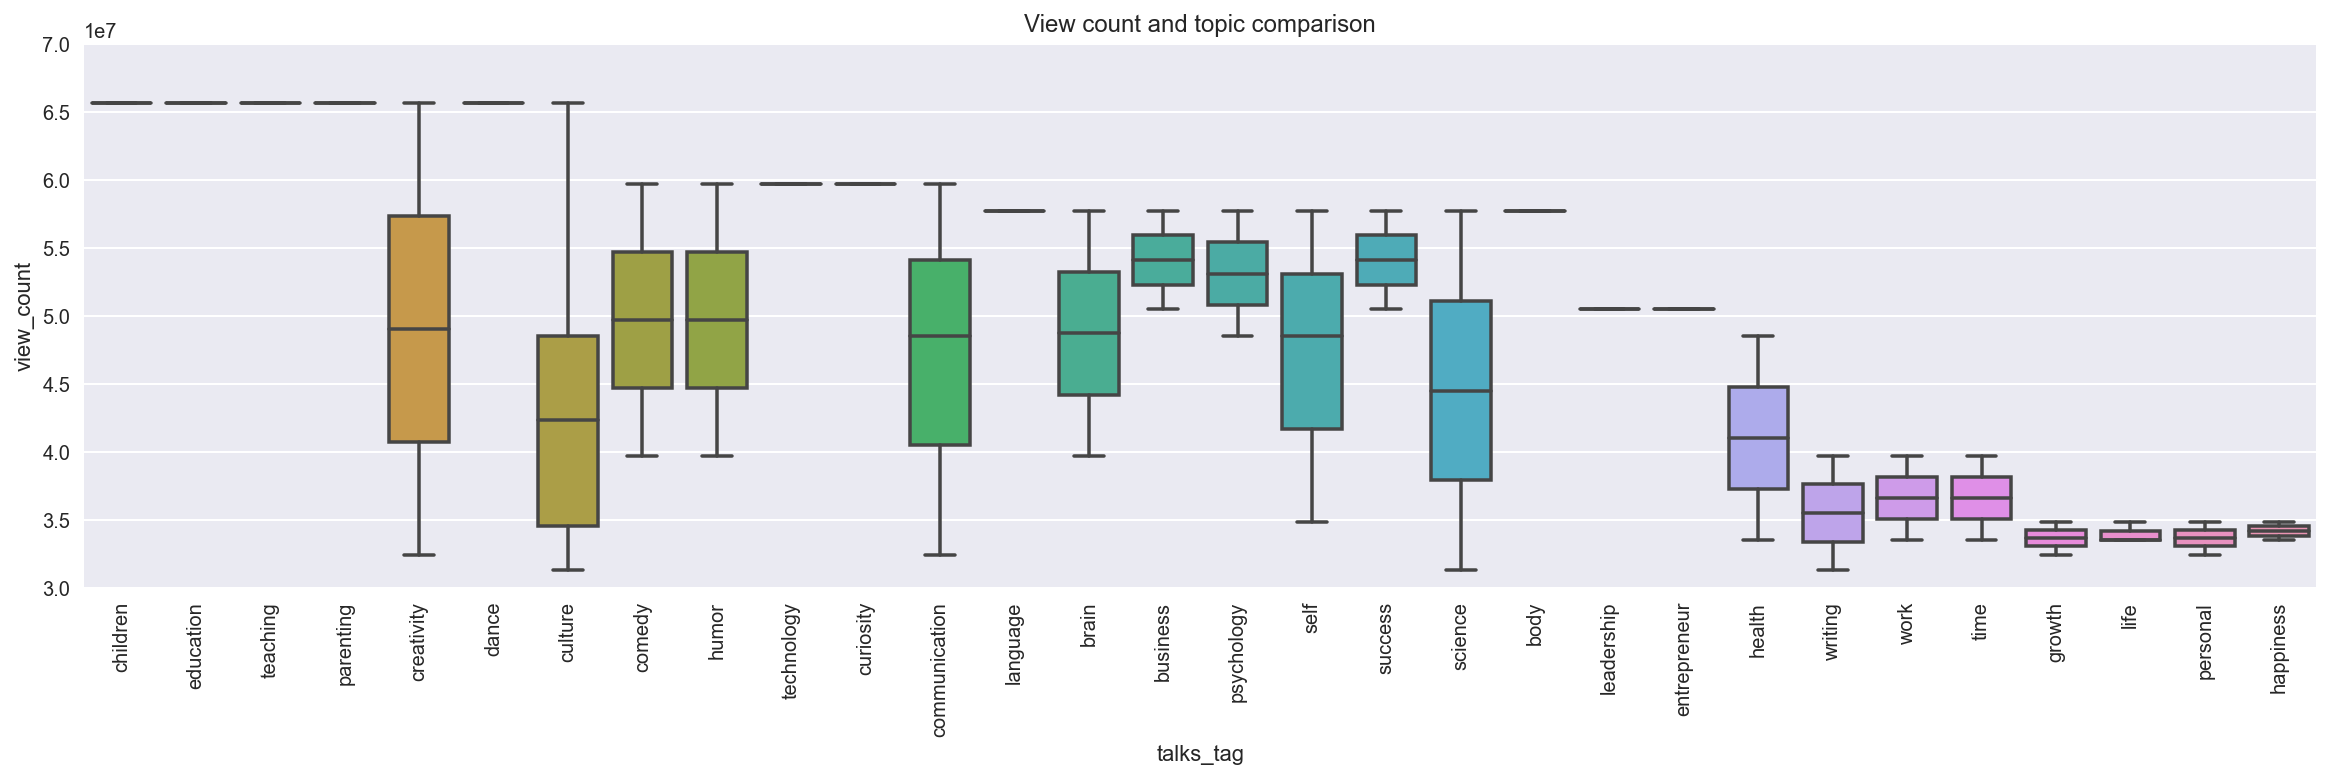

In [118]:
# plot graph for comparison
plt.figure(figsize=(20,5))
plt.ylim(3e7, 0.7e8)
#sns.set(font_scale=3)
plt.title('View count and topic comparison')
sns.boxplot(x='talks_tag', y='view_count', data=new_tag[new_tag['talks_tag'].isin(tags.index)]).tick_params(axis='x', rotation=90)

Topics that were highest in aggregate for view count is:

1) Children topics\
2) Education topics\
3) teaching topics

Notice that the top 3 topics has very low variation on view count. This could be due to a few TED talks with very high view count causing this result. I am suspecting all the top 3 topics came from the same TED talk because all have the exact view count. Hence i believe the result will not be so accurate. In any case, I will select the top 30 tags for one hot encoding feature selection before modeling.

### Which are the most highly viewed TED speaker occupation?

- Which occupation will be a popular TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

- We will first look at the most frequent speaker occupations then we look at the occupation according to view count aggregation for view count prediction.

In [119]:
# Top words from speaker description using Countvectorization without n_gram

cvec = CountVectorizer(stop_words='english')
cvec.fit(ted_talk['speaker__description'])

len_features = len(cvec.get_feature_names())
print("Total number of feature length for speaker occupation is:", len_features)

ted_50_cv_speaker_des = pd.DataFrame(cvec.transform(ted_talk['speaker__description']).todense(),columns=cvec.get_feature_names())

top_ted_speaker_des = ted_50_cv_speaker_des.sum(axis=0)
top_ted_speaker_des = top_ted_speaker_des.sort_values(ascending = False).head(50)
top_ted_speaker_des

Total number of feature length for speaker occupation is: 2531


activist          218
entrepreneur      203
author            192
writer            183
artist            157
designer          153
scientist         151
researcher        128
expert            124
journalist        113
advocate           99
social             98
educator           91
psychologist       85
biologist          83
inventor           75
engineer           72
economist          69
architect          67
health             65
neuroscientist     62
physicist          56
science            49
photographer       49
technologist       48
professor          47
filmmaker          46
poet               45
musician           44
philosopher        42
physician          41
solve              40
data               40
riddle             38
visionary          37
human              36
computer           35
director           35
scholar            34
global             34
strategist         34
producer           33
futurist           33
singer             32
consultant         31
rights    

- Top most commonly invited to TED events occupations are activist 218 word counts, entrepreneur 203 word counts and author  word 192 counts, writer 183 word counts and artist 157 word counts.

- Lets explore n_grams to see any more interesting occupations emerge. Top common occupations using n_gram is social entrepreneur, singer songwriter, marine biologist, computer scientist and rights activist. This actually gives more specific details of the speakers' occupations

In [120]:
# Top words from speaker description using Countvectorization for n_gram

cvec = CountVectorizer(ngram_range=(2,3), stop_words='english')
cvec.fit(ted_talk['speaker__description'])

len_features = len(cvec.get_feature_names())
print("Total number of feature length for 2 gram speaker occupation is:", len_features)

ted_50_cv_speaker= pd.DataFrame(cvec.transform(ted_talk['speaker__description']).todense(),columns=cvec.get_feature_names())

top_ted_speaker_ngram = ted_50_cv_speaker.sum(axis=0)
top_ted_speaker_ngram = top_ted_speaker_ngram.sort_values(ascending = False).head(50)
top_ted_speaker_ngram

Total number of feature length for 2 gram speaker occupation is: 6084


social entrepreneur          31
singer songwriter            24
marine biologist             19
computer scientist           18
rights activist              17
social psychologist          16
public health                15
health expert                15
global health                15
human rights                 14
graphic designer             14
behavioral economist         12
cognitive scientist          12
social scientist             12
visual artist                11
writer activist              10
data visionary               10
data scientist               10
author academic futurist     10
author academic              10
global health expert         10
academic futurist            10
health expert data           10
expert data visionary        10
expert data                  10
venture capitalist            9
actor activist                9
journalist author             9
multimedia artist             9
research scientist            9
game designer                 9
science 

**Using view counts to aggregate speaker occupations**
- Since we are predicting view coount. It will be more accurate to predict view count by aggregating the occupation based on view count during EDA study

In [121]:
# create a dataframe to analyze view count and speaker occupations
speakerdescription = ted_talk[['speaker__description','view_count', 'talk__name']]
speakerdescription.head()

speaker__description  view_count  \
0                       author  educator    65678748   
1                    comedian and writer    59725446   
2                    social psychologist    57734063   
3                      leadership expert    50494918   
4  vulnerability researcher  storyteller    48503432   

                                          talk__name  
0                        Do schools kill creativity?  
1  This is what happens when you reply to spam email  
2           Your body language may shape who you are  
3                   How great leaders inspire action  
4                         The power of vulnerability

In [122]:
# create for loop to aggregate view count with speaker occupation
data = []

for _,row in speakerdescription.iterrows():
    desc_list = row['speaker__description'].split()
    for word in desc_list:
        new_row = [word, row['view_count'], row['talk__name']]
        data.append(new_row)
new_speakerdescription = pd.DataFrame(data, columns=['speaker_occupation', 'view_count', 'talk__name'])

In [123]:
# display results
new_speakerdescription.head(10)

speaker_occupation  view_count  \
0             author    65678748   
1           educator    65678748   
2           comedian    59725446   
3                and    59725446   
4             writer    59725446   
5             social    57734063   
6       psychologist    57734063   
7         leadership    50494918   
8             expert    50494918   
9      vulnerability    48503432   

                                          talk__name  
0                        Do schools kill creativity?  
1                        Do schools kill creativity?  
2  This is what happens when you reply to spam email  
3  This is what happens when you reply to spam email  
4  This is what happens when you reply to spam email  
5           Your body language may shape who you are  
6           Your body language may shape who you are  
7                   How great leaders inspire action  
8                   How great leaders inspire action  
9                         The power of vulnerability

In [124]:
# simple cleaning function to remove 3-word or less occupation
def clean(col):
    # Remove words with 3 or fewer letters.
    col = re.sub(r'\b\w{1,3}\b', ' ', col)
    return col

In [125]:
# execute cleaning
new_speakerdescription['speaker_occupation'] = new_speakerdescription['speaker_occupation'].apply(clean)

In [126]:
# fill up empty blank cell with np.nan
new_speakerdescription['speaker_occupation']=new_speakerdescription['speaker_occupation'].str.strip().replace('',np.nan)
new_speakerdescription.head()

speaker_occupation  view_count  \
0             author    65678748   
1           educator    65678748   
2           comedian    59725446   
3                NaN    59725446   
4             writer    59725446   

                                          talk__name  
0                        Do schools kill creativity?  
1                        Do schools kill creativity?  
2  This is what happens when you reply to spam email  
3  This is what happens when you reply to spam email  
4  This is what happens when you reply to spam email

In [127]:
# check for null values
new_speakerdescription.isnull().sum()

speaker_occupation    1331
view_count               0
talk__name               0
dtype: int64

In [128]:
# drop null values
new_speakerdescription = new_speakerdescription.dropna()

In [129]:
# sort based on the highest view count
new_speakerdescription.sort_values('view_count', ascending=False).head()

speaker_occupation  view_count  \
0             author    65678748   
1           educator    65678748   
2           comedian    59725446   
4             writer    59725446   
5             social    57734063   

                                          talk__name  
0                        Do schools kill creativity?  
1                        Do schools kill creativity?  
2  This is what happens when you reply to spam email  
4  This is what happens when you reply to spam email  
5           Your body language may shape who you are

In [130]:
# remove redundant occupation names
new_speakerdescription.drop(new_speakerdescription.index[(new_speakerdescription['speaker_occupation'] == 'solve')|\
        (new_speakerdescription['speaker_occupation'] == 'what')|(new_speakerdescription['speaker_occupation'] == 'riddle')|\
        (new_speakerdescription['speaker_occupation'] == 'health')|(new_speakerdescription['speaker_occupation'] == 'social')|\
        (new_speakerdescription['speaker_occupation'] == 'brain')|(new_speakerdescription['speaker_occupation'] == 'sound')|\
        (new_speakerdescription['speaker_occupation'] == 'human')|(new_speakerdescription['speaker_occupation'] == 'your')|
        (new_speakerdescription['speaker_occupation'] == 'data')|(new_speakerdescription['speaker_occupation'] == 'visionary')|\
        (new_speakerdescription['speaker_occupation'] == 'cognitive')|(new_speakerdescription['speaker_occupation'] == 'global')|\
        (new_speakerdescription['speaker_occupation'] == 'vulnerability')],inplace = True)

In [131]:
# rank speaker occupation view count by group and sum.
# Use .sum() so that i can sieve out occupations with more than 1 data pt. 
# This is to ensure the view count consider more than 1 data pt instead of just 1 off view count.
speaker = pd.DataFrame(new_speakerdescription['view_count'].groupby(new_speakerdescription['speaker_occupation']).sum())
speaker = speaker.sort_values('view_count', ascending=False).head(30)
speaker

view_count
speaker_occupation            
writer               583807039
author               558517461
activist             425664268
psychologist         389811513
entrepreneur         378852866
expert               340291589
researcher           324624091
scientist            283708976
educator             280426452
designer             249385768
journalist           236890602
artist               233005118
neuroscientist       178430673
comedian             171342702
advocate             146913144
technologist         127206430
economist            120820059
biologist            118074017
inventor             110751665
philosopher          109834638
filmmaker            108895039
physicist            108712009
storyteller          102166858
professor             97530501
consultant            97389549
architect             90632094
leadership            87632007
poet                  86539046
philanthropist        85837735
engineer              84593543

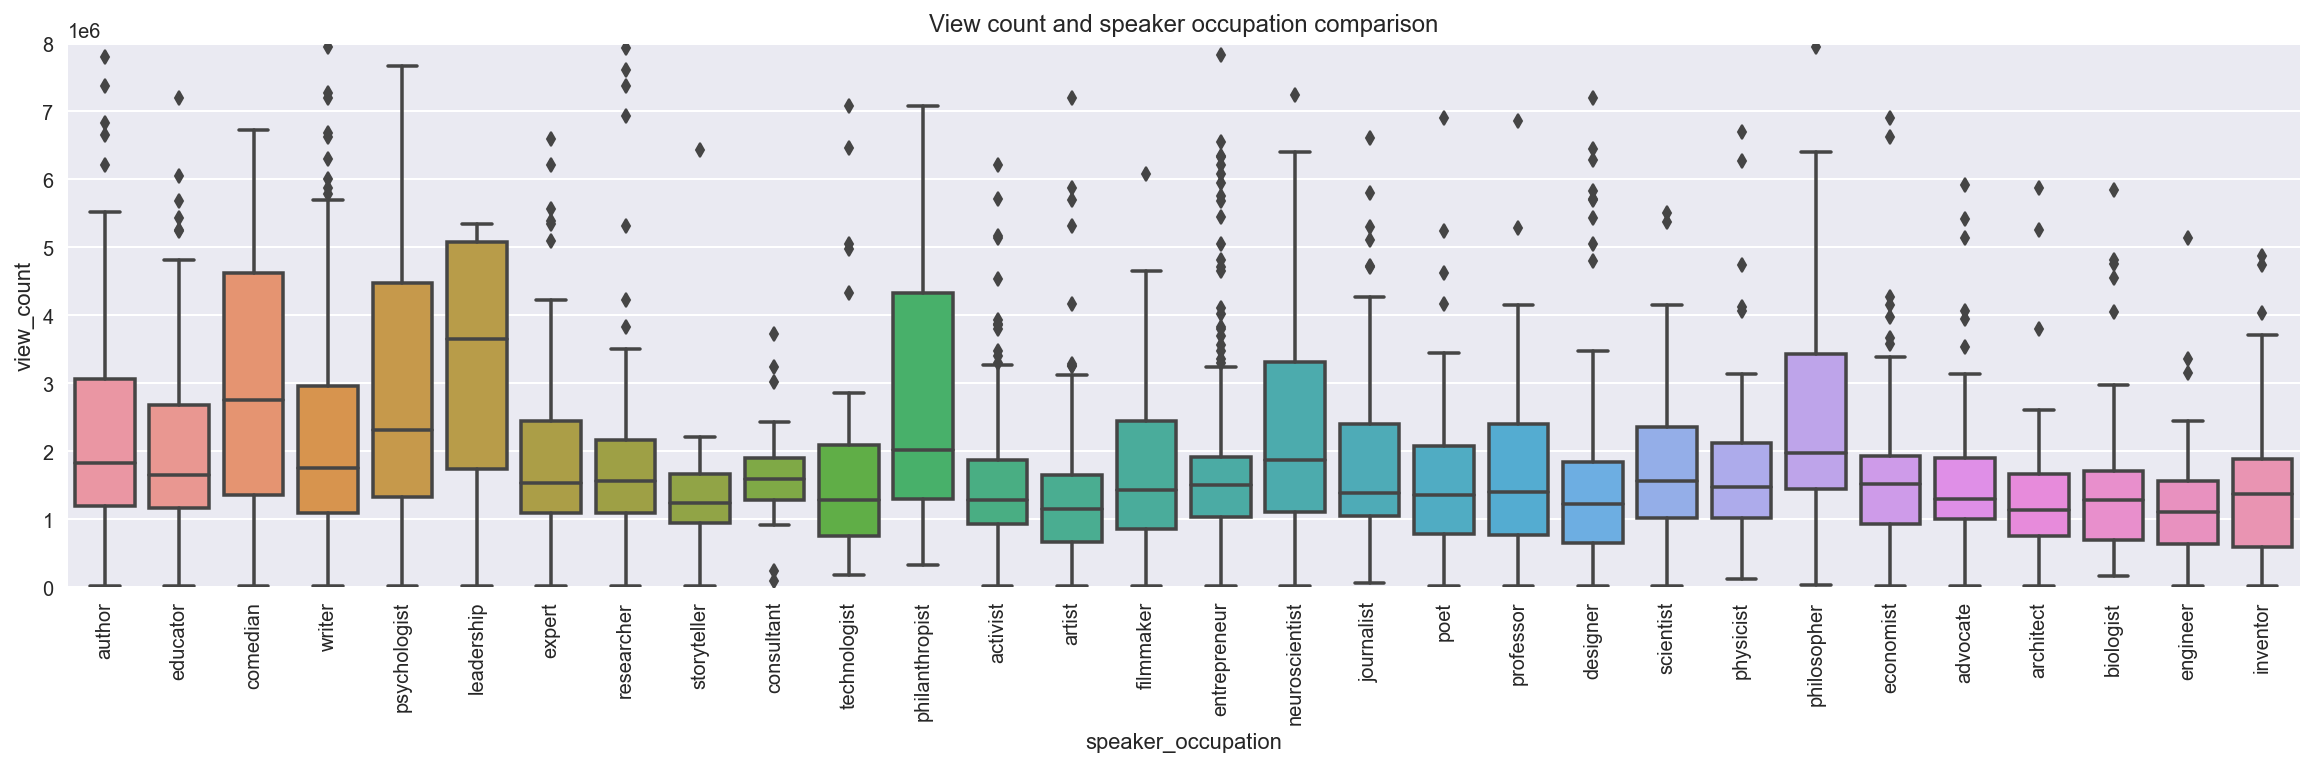

In [132]:
# plot graph for comparison
plt.figure(figsize=(20,5))
plt.ylim(0, 8e6) # cutoff y limits to have a better view of the boxplot
#sns.set(font_scale=2)
plt.title('View count and speaker occupation comparison')
sns.boxplot(x='speaker_occupation', y='view_count', data=new_speakerdescription[new_speakerdescription['speaker_occupation'].\
                isin(speaker.index)]).tick_params(axis='x', rotation=90)

- Leaders eg Simon Sinek attracts the most view counts. Speech given by leaders are related to career advice and leadership. Psychologist topics are very wide, they can range from well being, self enrichment, body language to culture. Comedians are entertaining, hence is able to attract many viewers. One of the frequent philanthropist is Bill Gates. Their topics range from diseases to tech and culture.
- You will notice that the most frequent occupations identified using countvectorizer is somewhat different from aggregated using view count.
- The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. As view count not neccessary tie to the number times the specific type of occupation invited to the TED event, aggregating using view count will be a more accurate way of analysis. Thinking from another perspective, TED would have figured out which are the popular speaker occupations and hence frequently invited them in the recent years. Therefore, it is still worth to look at both word count and view count aggregation for speaker occupations.

These top 30 occupations are selected for feature selection before modeling.

### Summary of Exploratory Data Analysis

Exploratory Data Analysis shows that:

**Features strong correlation to view count**\
1) comment count\
2) month year

**Features fairly strong correlation to view count**\
1) number_of__talk__download_languages\
2) number_of__subtitled_videos\
3) duration

**Features weak correlation to view count**\
1) transcript from [View_count_prediction_using_ted_talk_transcripts notebook](urlView_count_prediction_using_ted_talk_transcripts.ipynb)\
2) sentiments [View_count_prediction_using_ted_talk_transcripts notebook](urlView_count_prediction_using_ted_talk_transcripts.ipynb)\
3) number of speakers

Since transcripts and sentiments does not differentitate a popular and unpopular TED talk, I will say there must be other factors such as the topic or the speaker area of expertise as important factors for people to watch the video. Hence, I will one hot encode top 30 words identified through aggregation with view count for speakers' occupation and topic(tags) for feature selection.

## Preprocessing/Feature Engineering

This section is to create features identified based on EDA, for modeling. It will be further streamlined using feature selection.

Features to be created in this section:\
1) Sentiments features\
2) Speakers' occupations\
3) Ted talk topics(tags)\
4) Ted talk video age\
5) Create classification column

In [133]:
# import cleaned data
ted_talk = pd.read_csv('../dataset/ted_talk_after_cleaned.csv')
ted_talk_published = pd.read_csv('../dataset/ted_talk_published_after_cleaned.csv')

In [134]:
# drop view count column so that there will not be 2 of the same columns after merging
ted_talk_published = ted_talk_published.drop(['view_count'], axis=1)

In [135]:
# concate both timestamp and features into 1 main dataframe
ted_talk_preprocess = pd.concat([ted_talk, ted_talk_published], axis=1, sort=False)

In [136]:
# display the header
ted_talk_preprocess.columns

Index(['talk__id', 'talk__description', 'view_count', 'comment_count',
       'duration', 'video_type_name', 'event', 'number_of__speakers',
       'speaker__description', 'speaker__who_he_is', 'speaker__why_listen',
       'speaker__is_published', 'all_speakers_details', 'is_talk_featured',
       'talks__tags', 'number_of__tags', 'is_subtitle_required',
       'number_of__subtitled_videos', 'number_of__talk__download_languages',
       'number_of__talk__more_resources', 'number_of__talk__recommendations',
       'number_of__related_talks', 'ad_duration', 'post_ad_duration',
       'number_of__talks__take_actions', 'talk__name', 'speaker__name',
       'url__webpage', 'month', 'year', 'month_year', 'published_timestamp'],
      dtype='object')

In [137]:
# only select those main features identified through EDA for preprocessing
ted_talk_preprocess = ted_talk_preprocess[['comment_count', 'duration', 'number_of__subtitled_videos', \
        'number_of__talk__download_languages', 'number_of__talks__take_actions', 'number_of__speakers', \
        'number_of__talk__more_resources', 'number_of__talk__recommendations', 'number_of__related_talks', \
        'video_type_name', 'speaker__description', 'talks__tags', 'view_count', 'published_timestamp', 'talk__id']]

In [138]:
# display the selected features for preprocessing
ted_talk_preprocess.head()

comment_count  duration  number_of__subtitled_videos  \
0         4952.0      1164                           61   
1          288.0       588                           47   
2         2649.0      1262                           50   
3         2093.0      1084                           47   
4         2234.0      1219                           51   

   number_of__talk__download_languages  number_of__talks__take_actions  \
0                                   62                               0   
1                                   47                               0   
2                                   51                               0   
3                                   48                               0   
4                                   52                               0   

   number_of__speakers  number_of__talk__more_resources  \
0                    1                                3   
1                    1                                1   
2                    1                                4   
3                    1                                1   
4                    1                                2   

   number_of__talk__recommendations  number_of__related_talks video_type_name  \
0                                 1                         6  ted stage talk   
1                                 0                         6  ted stage talk   
2                                 0                         6  ted stage talk   
3                                 1                         6       tedx talk   
4                                 1                         6       tedx talk   

                    speaker__description  \
0                       author  educator   
1                    comedian and writer   
2                    social psychologist   
3                      leadership expert   
4  vulnerability researcher  storyteller   

                                                                                               talks__tags  \
0                              children   creativity   culture   dance   education   parenting   teaching    
1                                                 comedy   curiosity   communication   humor   technology    
2                                body language   brain   business   psychology   self   success   science    
3                                                   tedx   business   entrepreneur   leadership   success    
4  tedx   communication   culture   depression   fear   mental health   psychology   self   social change    

   view_count  published_timestamp  talk__id  
0    65678748  2006-06-27 00:11:00        66  
1    59725446  2016-01-08 16:03:40      2405  
2    57734063  2012-10-01 15:00:08      1569  
3    50494918  2010-05-04 09:31:00       848  
4    48503432  2010-12-23 14:45:00      1042

In [139]:
# confirmed that there is no null values
ted_talk_preprocess.isnull().sum()

comment_count                          0
duration                               0
number_of__subtitled_videos            0
number_of__talk__download_languages    0
number_of__talks__take_actions         0
number_of__speakers                    0
number_of__talk__more_resources        0
number_of__talk__recommendations       0
number_of__related_talks               0
video_type_name                        0
speaker__description                   0
talks__tags                            0
view_count                             0
published_timestamp                    0
talk__id                               0
dtype: int64

### Sentiment Analysis for view count prediction
Input sentiment analysis (polarity and subjectivity) for modeling. Based on EDA, all the talks are positive and opinionated.

In [140]:
# import sentiment for modeling dataframe creation
ted_talk_sentiment = pd.read_csv('../dataset/ted_talk_sentiment.csv')

In [141]:
# display the headers
ted_talk_sentiment.columns

Index(['talk__id', 'transcript', 'view_count', 'polarity', 'subjectivity',
       'popular'],
      dtype='object')

In [142]:
# filter only the polarity and subjectivity. Talk__id for concating to the main dataframe
ted_talk_sentiment = ted_talk_sentiment[['talk__id', 'polarity', 'subjectivity']]

In [143]:
# concate sentiments to main preprocessing dataframe
ted_talk_preprocess = pd.merge(ted_talk_preprocess, ted_talk_sentiment, on="talk__id")

### One hot encode top 30 highest view count ted talk speakers' occupations
- We identified the top 30 occupations of the speakers by aggregating using view count during EDA. Hence lets one hot encode the occupations to explore for any prediction capability.
- Since the tags consist of text, Multilabelbinarizer is used to one hote encode the words. It allows you to encode multiple labels per instance. To translate the resulting array, you could build a DataFrame with this array and the encoded classes (through its "classes_" attribute).

In [144]:
# apply MultiLabelBinarizer() to one hot encode text
mlb = MultiLabelBinarizer()
speaker_1_hot = pd.DataFrame(mlb.fit_transform([x.split(' ') for x in ted_talk_preprocess.speaker__description]),columns=mlb.classes_)

In [145]:
# recap the top 30 highest view count speaker occupations
speaker.T.columns

Index(['writer', 'author', 'activist', 'psychologist', 'entrepreneur',
       'expert', 'researcher', 'scientist', 'educator', 'designer',
       'journalist', 'artist', 'neuroscientist', 'comedian', 'advocate',
       'technologist', 'economist', 'biologist', 'inventor', 'philosopher',
       'filmmaker', 'physicist', 'storyteller', 'professor', 'consultant',
       'architect', 'leadership', 'poet', 'philanthropist', 'engineer'],
      dtype='object', name='speaker_occupation')

In [146]:
# display one hot encoded results
speaker_1_hot.head()

4chan  about  abuse  academic  accelerators  accents  accident  \
0  1      0      0      0         0             0        0         0   
1  0      0      0      0         0             0        0         0   
2  0      0      0      0         0             0        0         0   
3  0      0      0      0         0             0        0         0   
4  1      0      0      0         0             0        0         0   

   according  accountable  accountant  accuracy  acid  acoustic  acre  across  \
0          0            0           0         0     0         0     0       0   
1          0            0           0         0     0         0     0       0   
2          0            0           0         0     0         0     0       0   
3          0            0           0         0     0         0     0       0   
4          0            0           0         0     0         0     0       0   

   act  action  activist  activists  actor  actress  actually  acumen  \
0    0       0         0          0      0        0         0       0   
1    0       0         0          0      0        0         0       0   
2    0       0         0          0      0        0         0       0   
3    0       0         0          0      0        0         0       0   
4    0       0         0          0      0        0         0       0   

   acupuncturist  add  addiction  address  administrator  admiral  adoption  \
0              0    0          0        0              0        0         0   
1              0    0          0        0              0        0         0   
2              0    0          0        0              0        0         0   
3              0    0          0        0              0        0         0   
4              0    0          0        0              0        0         0   

   adventure  adventurer  adventurers  advertising  advisor  advocate  aerial  \
0          0           0            0            0        0         0       0   
1          0           0            0            0        0         0       0   
2          0           0            0            0        0         0       0   
3          0           0            0            0        0         0       0   
4          0           0            0            0        0         0       0   

   aerialist  aesthetics  affairs  affect  affects  affordable  afghanistan  \
0          0           0        0       0        0           0            0   
1          0           0        0       0        0           0            0   
2          0           0        0       0        0           0            0   
3          0           0        0       0        0           0            0   
4          0           0        0       0        0           0            0   

   african  afro  after  against  age  agency  agent  aging  agitator  \
0        0     0      0        0    0       0      0      0         0   
1        0     0      0        0    0       0      0      0         0   
2        0     0      0        0    0       0      0      0         0   
3        0     0      0        0    0       0      0      0         0   
4        0     0      0        0    0       0      0      0         0   

   agricultural  agriculturalist  agriculture  aid  aids  airbnb  airborne  \
0             0                0            0    0     0       0         0   
1             0                0            0    0     0       0         0   
2             0                0            0    0     0       0         0   
3             0                0            0    0     0       0         0   
4             0                0            0    0     0       0         0   

   aircraft  airplane  albuquerque  alchemist  alcohol  alexandria  algorithm  \
0         0         0            0          0        0           0          0   
1         0         0            0          0        0           0          0   
2         0         0            0          0        0     

In [147]:
# filter only the top 30 occupations
speaker_1_hot = speaker_1_hot[speaker.T.columns]
speaker_1_hot.head()

writer  author  activist  psychologist  entrepreneur  expert  researcher  \
0       0       1         0             0             0       0           0   
1       1       0         0             0             0       0           0   
2       0       0         0             1             0       0           0   
3       0       0         0             0             0       1           0   
4       0       0         0             0             0       0           1   

   scientist  educator  designer  journalist  artist  neuroscientist  \
0          0         1         0           0       0               0   
1          0         0         0           0       0               0   
2          0         0         0           0       0               0   
3          0         0         0           0       0               0   
4          0         0         0           0       0               0   

   comedian  advocate  technologist  economist  biologist  inventor  \
0         0         0             0          0          0         0   
1         1         0             0          0          0         0   
2         0         0             0          0          0         0   
3         0         0             0          0          0         0   
4         0         0             0          0          0         0   

   philosopher  filmmaker  physicist  storyteller  professor  consultant  \
0            0          0          0            0          0           0   
1            0          0          0            0          0           0   
2            0          0          0            0          0           0   
3            0          0          0            0          0           0   
4            0          0          0            1          0           0   

   architect  leadership  poet  philanthropist  engineer  
0          0           0     0               0         0  
1          0           0     0               0         0  
2          0           0     0               0         0  
3          0           1     0               0         0  
4          0           0     0               0         0

In [148]:
# suffix the occupations for easy identification
speaker_1_hot.columns = [str(col) + '_occupation' for col in speaker_1_hot.columns]

In [149]:
# display header
speaker_1_hot.head()

writer_occupation  author_occupation  activist_occupation  \
0                  0                  1                    0   
1                  1                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   psychologist_occupation  entrepreneur_occupation  expert_occupation  \
0                        0                        0                  0   
1                        0                        0                  0   
2                        1                        0                  0   
3                        0                        0                  1   
4                        0                        0                  0   

   researcher_occupation  scientist_occupation  educator_occupation  \
0                      0                     0                    1   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      1                     0                    0   

   designer_occupation  journalist_occupation  artist_occupation  \
0                    0                      0                  0   
1                    0                      0                  0   
2                    0                      0                  0   
3                    0                      0                  0   
4                    0                      0                  0   

   neuroscientist_occupation  comedian_occupation  advocate_occupation  \
0                          0                    0                    0   
1                          0                    1                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                          0                    0                    0   

   technologist_occupation  economist_occupation  biologist_occupation  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   

   inventor_occupation  philosopher_occupation  filmmaker_occupation  \
0                    0                       0                     0   
1                    0                       0                     0   
2                    0                       0                     0   
3                    0                       0                     0   
4                    0                       0                     0   

   physicist_occupation  storyteller_occupation  professor_occupation  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       1                     0   

   consultant_occupation  architect_occupation  leadership_occupation  \
0                      0                     0                      0   
1                      0                     0                      0   
2                      0                     0                      0   
3                      0                     0                      1   
4                      0                     0                      0   

   poet_occupation  philanthropist_occupation  engineer_occupation  
0                0                          0                    0 

In [150]:
# confirmed 30 occupations one hot encoding created
speaker_1_hot.shape

(4081, 30)

### One hot encode top 30 highest view count ted talk topics
- Through EDA, I found that transcripts, sentiments are not the predictive features for view count. Words that appears most frequently not neccessary is capable to differentiate the popular and unpopular TED talks. 
- Most TED talk contains more than 1 interest area/topic. Hence, I decided to one hot encode the tags (topics), to identify which are the topics that can predict view counts.
- Since the speakers' occupations, tags also consist of text hence, MultiLabelBinarizer() is also applied

In [151]:
# one hot encode text using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
tags_1_hot = pd.DataFrame(mlb.fit_transform([x.split(' ') for x in ted_talk_preprocess.talks__tags]),columns=mlb.classes_)

In [152]:
# dataframe created after one hot encoding
tags_1_hot.head()

activism  addiction  adventure  advertising  africa  aging  agriculture  \
0  1         0          0          0            0       0      0            0   
1  1         0          0          0            0       0      0            0   
2  1         0          0          0            0       0      0            0   
3  1         0          0          0            0       0      0            0   
4  1         0          0          0            0       0      0            0   

   aids  aircraft  algorithm  alternative  alzheimer  america  ancient  and  \
0     0         0          0            0          0        0        0    0   
1     0         0          0            0          0        0        0    0   
2     0         0          0            0          0        0        0    0   
3     0         0          0            0          0        0        0    0   
4     0         0          0            0          0        0        0    0   

   animals  animation  antarctica  anthropocene  anthropology  ants  apes  \
0        0          0           0             0             0     0     0   
1        0          0           0             0             0     0     0   
2        0          0           0             0             0     0     0   
3        0          0           0             0             0     0     0   
4        0          0           0             0             0     0     0   

   archaeology  architecture  art  arts  asia  asteroid  astrobiology  \
0            0             0    0     0     0         0             0   
1            0             0    0     0     0         0             0   
2            0             0    0     0     0         0             0   
3            0             0    0     0     0         0             0   
4            0             0    0     0     0         0             0   

   astronomy  atheism  audacious  augmented  autism  bacteria  balance  bang  \
0          0        0          0          0       0         0        0     0   
1          0        0          0          0       0         0        0     0   
2          0        0          0          0       0         0        0     0   
3          0        0          0          0       0         0        0     0   
4          0        0          0          0       0         0        0     0   

   beauty  bees  behavioral  best  big  biodiversity  bioethics  biology  \
0       0     0           0     0    0             0          0        0   
1       0     0           0     0    0             0          0        0   
2       0     0           0     0    0             0          0        0   
3       0     0           0     0    0             0          0        0   
4       0     0           0     0    0             0          0        0   

   biomechanics  biomimicry  bionics  biosphere  biotech  birds  blindness  \
0             0           0        0          0        0      0          0   
1             0           0        0          0        0      0          0   
2             0           0        0          0        0      0          0   
3             0           0        0          0        0      0          0   
4             0           0        0          0        0      0          0   

   blockchain  blue  body  book  books  botany  brain  brand  brazil  \
0           0     0     0     0      0       0      0      0       0   
1           0     0     0     0      0       0      0      0       0   
2           0     0     1     0      0       0      1      0       0   
3           0     0     0     0      0       0      0      0       0   
4           0     0     0     0      0       0      0      0       0   

   buddhism  building  bullying  business  cancer  capitalism  care  cars  \
0         0         0         0         0       0           0     0     0   
1         0         0         0         0       0           0     0     0   
2         0         0         0         1       0           0     0    

In [153]:
# recap the top 30 tags aggregated using view count, identified during EDA
tags.T.columns

Index(['culture', 'self', 'communication', 'success', 'business', 'psychology',
       'life', 'humor', 'comedy', 'creativity', 'brain', 'science', 'health',
       'work', 'time', 'writing', 'happiness', 'growth', 'personal',
       'teaching', 'parenting', 'education', 'dance', 'children', 'curiosity',
       'technology', 'body', 'language', 'entrepreneur', 'leadership'],
      dtype='object', name='talks_tag')

In [154]:
# filter only the top 30 tags on the one hot encoded dataframe
tags_1_hot = tags_1_hot[tags.T.columns]

In [155]:
# display the dataframe
tags_1_hot.head()

culture  self  communication  success  business  psychology  life  humor  \
0        1     0              0        0         0           0     0      0   
1        0     0              1        0         0           0     0      1   
2        0     1              0        1         1           1     0      0   
3        0     0              0        1         1           0     0      0   
4        1     1              1        0         0           1     0      0   

   comedy  creativity  brain  science  health  work  time  writing  happiness  \
0       0           1      0        0       0     0     0        0          0   
1       1           0      0        0       0     0     0        0          0   
2       0           0      1        1       0     0     0        0          0   
3       0           0      0        0       0     0     0        0          0   
4       0           0      0        0       1     0     0        0          0   

   growth  personal  teaching  parenting  education  dance  children  \
0       0         0         1          1          1      1         1   
1       0         0         0          0          0      0         0   
2       0         0         0          0          0      0         0   
3       0         0         0          0          0      0         0   
4       0         0         0          0          0      0         0   

   curiosity  technology  body  language  entrepreneur  leadership  
0          0           0     0         0             0           0  
1          1           1     0         0             0           0  
2          0           0     1         1             0           0  
3          0           0     0         0             1           1  
4          0           0     0         0             0           0

In [156]:
# suffix the header to identify the columns as tags
tags_1_hot.columns = [str(col) + '_tag' for col in tags_1_hot.columns]

In [157]:
# display of results
tags_1_hot.head()

culture_tag  self_tag  communication_tag  success_tag  business_tag  \
0            1         0                  0            0             0   
1            0         0                  1            0             0   
2            0         1                  0            1             1   
3            0         0                  0            1             1   
4            1         1                  1            0             0   

   psychology_tag  life_tag  humor_tag  comedy_tag  creativity_tag  brain_tag  \
0               0         0          0           0               1          0   
1               0         0          1           1               0          0   
2               1         0          0           0               0          1   
3               0         0          0           0               0          0   
4               1         0          0           0               0          0   

   science_tag  health_tag  work_tag  time_tag  writing_tag  happiness_tag  \
0            0           0         0         0            0              0   
1            0           0         0         0            0              0   
2            1           0         0         0            0              0   
3            0           0         0         0            0              0   
4            0           1         0         0            0              0   

   growth_tag  personal_tag  teaching_tag  parenting_tag  education_tag  \
0           0             0             1              1              1   
1           0             0             0              0              0   
2           0             0             0              0              0   
3           0             0             0              0              0   
4           0             0             0              0              0   

   dance_tag  children_tag  curiosity_tag  technology_tag  body_tag  \
0          1             1              0               0         0   
1          0             0              1               1         0   
2          0             0              0               0         1   
3          0             0              0               0         0   
4          0             0              0               0         0   

   language_tag  entrepreneur_tag  leadership_tag  
0             0                 0               0  
1             0                 0               0  
2             1                 0               0  
3             0                 1               1  
4             0                 0               0

### Create Age (number of months from video was published to June 2020, when dataset was webscraped)
Through EDA, we found 2019 first half of the year to have high view count.\
View count has also increased gradually from July 2006 to June 2020. Hence creating video age feature for modeling

In [158]:
# create a column of webscraped date
ted_talk_preprocess['date_scraped'] = dt.datetime(2020, 6, 24)

In [159]:
# display webscraped date column
ted_talk_preprocess['date_scraped']

0      2020-06-24
1      2020-06-24
2      2020-06-24
3      2020-06-24
4      2020-06-24
          ...    
4076   2020-06-24
4077   2020-06-24
4078   2020-06-24
4079   2020-06-24
4080   2020-06-24
Name: date_scraped, Length: 4081, dtype: datetime64[ns]

In [160]:
# display timestamp for video published date
ted_talk_preprocess['published_timestamp'].head()

0    2006-06-27 00:11:00
1    2016-01-08 16:03:40
2    2012-10-01 15:00:08
3    2010-05-04 09:31:00
4    2010-12-23 14:45:00
Name: published_timestamp, dtype: object

In [161]:
# filter only the dates without time
ted_talk_preprocess['date_year'] = pd.to_datetime(ted_talk_preprocess['published_timestamp']).dt.date

In [162]:
# display date only that TED talk video was published
ted_talk_preprocess['date_year'].head()

0    2006-06-27
1    2016-01-08
2    2012-10-01
3    2010-05-04
4    2010-12-23
Name: date_year, dtype: object

In [163]:
# convert column to timestamp
ted_talk_preprocess['date_year'] = pd.to_datetime(ted_talk_preprocess['date_year'], utc=False)

In [164]:
# create a column that calculate the TED video age (in months)
ted_talk_preprocess['age_months'] = ((ted_talk_preprocess.date_scraped - ted_talk_preprocess.date_year)/np.timedelta64(1, 'M'))

In [165]:
# convert age to integer and display
ted_talk_preprocess['age_months'] = ted_talk_preprocess['age_months'].astype(int)
ted_talk_preprocess.tail()

comment_count  duration  number_of__subtitled_videos  \
4076       1.914286       772                            0   
4077       1.857143       865                            0   
4078       1.600000       107                            0   
4079       1.571429       327                            0   
4080       1.314286       862                            0   

      number_of__talk__download_languages  number_of__talks__take_actions  \
4076                                    2                               0   
4077                                    4                               0   
4078                                    1                               0   
4079                                   12                               0   
4080                                    3                               0   

      number_of__speakers  number_of__talk__more_resources  \
4076                    1                                1   
4077                    1                                0   
4078                    3                                0   
4079                    1                                1   
4080                    1                                0   

      number_of__talk__recommendations  number_of__related_talks  \
4076                                 0                         3   
4077                                 0                         6   
4078                                 0                         3   
4079                                 0                         3   
4080                                 0                         6   

       video_type_name                               speaker__description  \
4076    ted stage talk                                   marine ecologist   
4077         tedx talk  humanity the intersection science and archaeology   
4078    ted stage talk                      illusions for better society    
4079  original content                                      street artist   
4080         tedx talk                                       photographer   

                                                                                                       talks__tags  \
4076  environment   economics   biosphere   nature   oceans   fish   future   water   global commons   ted espaol    
4077                                                   science   archaeology   human body   microbiology   health    
4078                                                                                        visualizations   film    
4079                                         community   photography   art   activism   public spaces   ted prize    
4080                                                           art   photography   community   history   humanity    

      view_count  published_timestamp  talk__id  polarity  subjectivity  \
4076       11040  2018-06-06 21:27:52     17850  0.108739      0.367565   
4077       10950  2019-10-28 20:04:01     50057  0.101702      0.449931   
4078       10598  2018-04-14 19:48:08     14610  0.181775      0.602620   
4079       10518  2018-04-03 22:23:28     13010  0.164892      0.416543   
4080       10124  2018-11-29 16:22:58     29009  0.076241      0.394427   

     date_scraped  date_year  age_months  
4076   2020-06-24 2018-06-06          24  
4077   2020-06-24 2019-10-28           7  
4078   2020-06-24 2018-04-14          26  
4079   2020-06-24 2018-04-03          26  
4080   2020-06-24 2018-11-29          18

### Create features by one hot encoding video type
From EDA, observed certain video types has high view count. Hence one hot encoding video type for modeling.

In [166]:
# one hot encoding
video_type_1_hot = pd.get_dummies(ted_talk_preprocess.video_type_name, drop_first = False)

In [167]:
# display video type one hot encoded dataframe
video_type_1_hot.head()

best web  custom sponsored content  original content  ted  original  \
0         0                         0                 0              0   
1         0                         0                 0              0   
2         0                         0                 0              0   
3         0                         0                 0              0   
4         0                         0                 0              0   

   ted institute talk  ted salon talk  partner   ted stage talk  tedx talk  
0                   0                         0               1          0  
1                   0                         0               1          0  
2                   0                         0               1          0  
3                   0                         0               0          1  
4                   0                         0               0          1

In [168]:
# add suffix to header names to identify these features as video type
video_type_1_hot.columns = [str(col) + '_video' for col in video_type_1_hot.columns]

In [169]:
# display final video one hot encoded video type
video_type_1_hot.head()

best web_video  custom sponsored content_video  original content_video  \
0               0                               0                       0   
1               0                               0                       0   
2               0                               0                       0   
3               0                               0                       0   
4               0                               0                       0   

   ted  original_video  ted institute talk_video  \
0                    0                         0   
1                    0                         0   
2                    0                         0   
3                    0                         0   
4                    0                         0   

   ted salon talk  partner _video  ted stage talk_video  tedx talk_video  
0                               0                     1                0  
1                               0                     1                0  
2                               0                     1                0  
3                               0                     0                1  
4                               0                     0                1

In [170]:
# display unique values of 'custom sponsored content_video' column It is totally unbalance. 
# This is not useful for prediction
video_type_1_hot['custom sponsored content_video'].value_counts()
# to drop 'custom sponsored content_video' since only 1 data point for prediction

0    4080
1       1
Name: custom sponsored content_video, dtype: int64

In [171]:
# drop 'custom sponsored content_video' video type
video_type_1_hot = video_type_1_hot.drop(['custom sponsored content_video'], axis=1)

### Create classification column

In [172]:
# check shape of dataframe
ted_talk_preprocess.shape

(4081, 20)

In [173]:
# create classification column by applying the view count median
ted_talk_preprocess['is_popular']  = ted_talk_preprocess['view_count'].mask(ted_talk_preprocess.view_count > 1.315674e+06, 1).mask(ted_talk_preprocess.view_count <= 1.315674e+06, 0)

In [174]:
# display ratio of popular TED talk to unpopular TED talks
ted_talk_preprocess['is_popular'].value_counts()

1    2182
0    1899
Name: is_popular, dtype: int64

### Combine all features selected to form a dataframe

In [175]:
# create a dataframe for feature selection
ted_talk_preprocessed = pd.concat([ted_talk_preprocess, video_type_1_hot, tags_1_hot, speaker_1_hot], \
                                  axis=1, sort=False)

In [176]:
# display dataframe
ted_talk_preprocessed.head(2)

comment_count  duration  number_of__subtitled_videos  \
0         4952.0      1164                           61   
1          288.0       588                           47   

   number_of__talk__download_languages  number_of__talks__take_actions  \
0                                   62                               0   
1                                   47                               0   

   number_of__speakers  number_of__talk__more_resources  \
0                    1                                3   
1                    1                                1   

   number_of__talk__recommendations  number_of__related_talks video_type_name  \
0                                 1                         6  ted stage talk   
1                                 0                         6  ted stage talk   

  speaker__description  \
0     author  educator   
1  comedian and writer   

                                                                   talks__tags  \
0  children   creativity   culture   dance   education   parenting   teaching    
1                     comedy   curiosity   communication   humor   technology    

   view_count  published_timestamp  talk__id  polarity  subjectivity  \
0    65678748  2006-06-27 00:11:00        66  0.154122      0.476055   
1    59725446  2016-01-08 16:03:40      2405  0.142058      0.529945   

  date_scraped  date_year  age_months  is_popular  best web_video  \
0   2020-06-24 2006-06-27         167           1               0   
1   2020-06-24 2016-01-08          53           1               0   

   original content_video  ted  original_video  ted institute talk_video  \
0                       0                    0                         0   
1                       0                    0                         0   

   ted salon talk  partner _video  ted stage talk_video  tedx talk_video  \
0                               0                     1                0   
1                               0                     1                0   

   culture_tag  self_tag  communication_tag  success_tag  business_tag  \
0            1         0                  0            0             0   
1            0         0                  1            0             0   

   psychology_tag  life_tag  humor_tag  comedy_tag  creativity_tag  brain_tag  \
0               0         0          0           0               1          0   
1               0         0          1           1               0          0   

   science_tag  health_tag  work_tag  time_tag  writing_tag  happiness_tag  \
0            0           0         0         0            0              0   
1            0           0         0         0            0              0   

   growth_tag  personal_tag  teaching_tag  parenting_tag  education_tag  \
0           0             0             1              1              1   
1           0             0             0              0              0   

   dance_tag  children_tag  curiosity_tag  technology_tag  body_tag  \
0          1             1              0               0         0   
1          0             0              1               1         0   

   language_tag  entrepreneur_tag  leadership_tag  writer_occupation  \
0             0                 0               0                  0   
1             0                 0               0                  1   

   author_occupation  activist_occupation  psychologist_occupation  \
0                  1                    0                        0   
1                  0                    0                        0   

   entrepreneur_occupation  expert_occupation  researcher_occupation  \
0                        0                  0                      0   
1                        0                  0                      0   

   scientist_occupation  educator_occupation  designer_occupation  \
0                     0                    1                    0   
1                     0                    0  

In [177]:
# drop unwanted columns
ted_talk_preprocessed = ted_talk_preprocessed.drop(['video_type_name','speaker__description', 'talk__id',
                            'talks__tags', 'date_scraped', 'published_timestamp', 'date_year', 'view_count'], axis=1)

In [178]:
# print shape
ted_talk_preprocessed.shape

(4081, 80)

In [179]:
# display dataframe after preprocessed
ted_talk_preprocessed.head(2)

comment_count  duration  number_of__subtitled_videos  \
0         4952.0      1164                           61   
1          288.0       588                           47   

   number_of__talk__download_languages  number_of__talks__take_actions  \
0                                   62                               0   
1                                   47                               0   

   number_of__speakers  number_of__talk__more_resources  \
0                    1                                3   
1                    1                                1   

   number_of__talk__recommendations  number_of__related_talks  polarity  \
0                                 1                         6  0.154122   
1                                 0                         6  0.142058   

   subjectivity  age_months  is_popular  best web_video  \
0      0.476055         167           1               0   
1      0.529945          53           1               0   

   original content_video  ted  original_video  ted institute talk_video  \
0                       0                    0                         0   
1                       0                    0                         0   

   ted salon talk  partner _video  ted stage talk_video  tedx talk_video  \
0                               0                     1                0   
1                               0                     1                0   

   culture_tag  self_tag  communication_tag  success_tag  business_tag  \
0            1         0                  0            0             0   
1            0         0                  1            0             0   

   psychology_tag  life_tag  humor_tag  comedy_tag  creativity_tag  brain_tag  \
0               0         0          0           0               1          0   
1               0         0          1           1               0          0   

   science_tag  health_tag  work_tag  time_tag  writing_tag  happiness_tag  \
0            0           0         0         0            0              0   
1            0           0         0         0            0              0   

   growth_tag  personal_tag  teaching_tag  parenting_tag  education_tag  \
0           0             0             1              1              1   
1           0             0             0              0              0   

   dance_tag  children_tag  curiosity_tag  technology_tag  body_tag  \
0          1             1              0               0         0   
1          0             0              1               1         0   

   language_tag  entrepreneur_tag  leadership_tag  writer_occupation  \
0             0                 0               0                  0   
1             0                 0               0                  1   

   author_occupation  activist_occupation  psychologist_occupation  \
0                  1                    0                        0   
1                  0                    0                        0   

   entrepreneur_occupation  expert_occupation  researcher_occupation  \
0                        0                  0                      0   
1                        0                  0                      0   

   scientist_occupation  educator_occupation  designer_occupation  \
0                     0                    1                    0   
1                     0                    0                    0   

   journalist_occupation  artist_occupation  neuroscientist_occupation  \
0                      0                  0                          0   
1                      0                  0                          0   

   comedian_occupation  advocate_occupation  technologist_occupation  \
0                    0                    0                        0   
1                    1                    0                        0   

   economist_occupation  biologist_occupation  inventor_occupation  \
0                     0                     0            

# SelectKBest f_classif Feature Selection (Univariate method)

How to select when you have too many features to choose from?

SelectKBest is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset. ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

In [180]:
# Create X feature matrix and y (taget is_popular)
X = ted_talk_preprocessed.drop(['is_popular'], axis=1)
y = ted_talk_preprocessed['is_popular']

In [181]:
# split dataset for training feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
# display shape of the dataset created
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2734, 79)
(1347, 79)
(2734,)
(1347,)


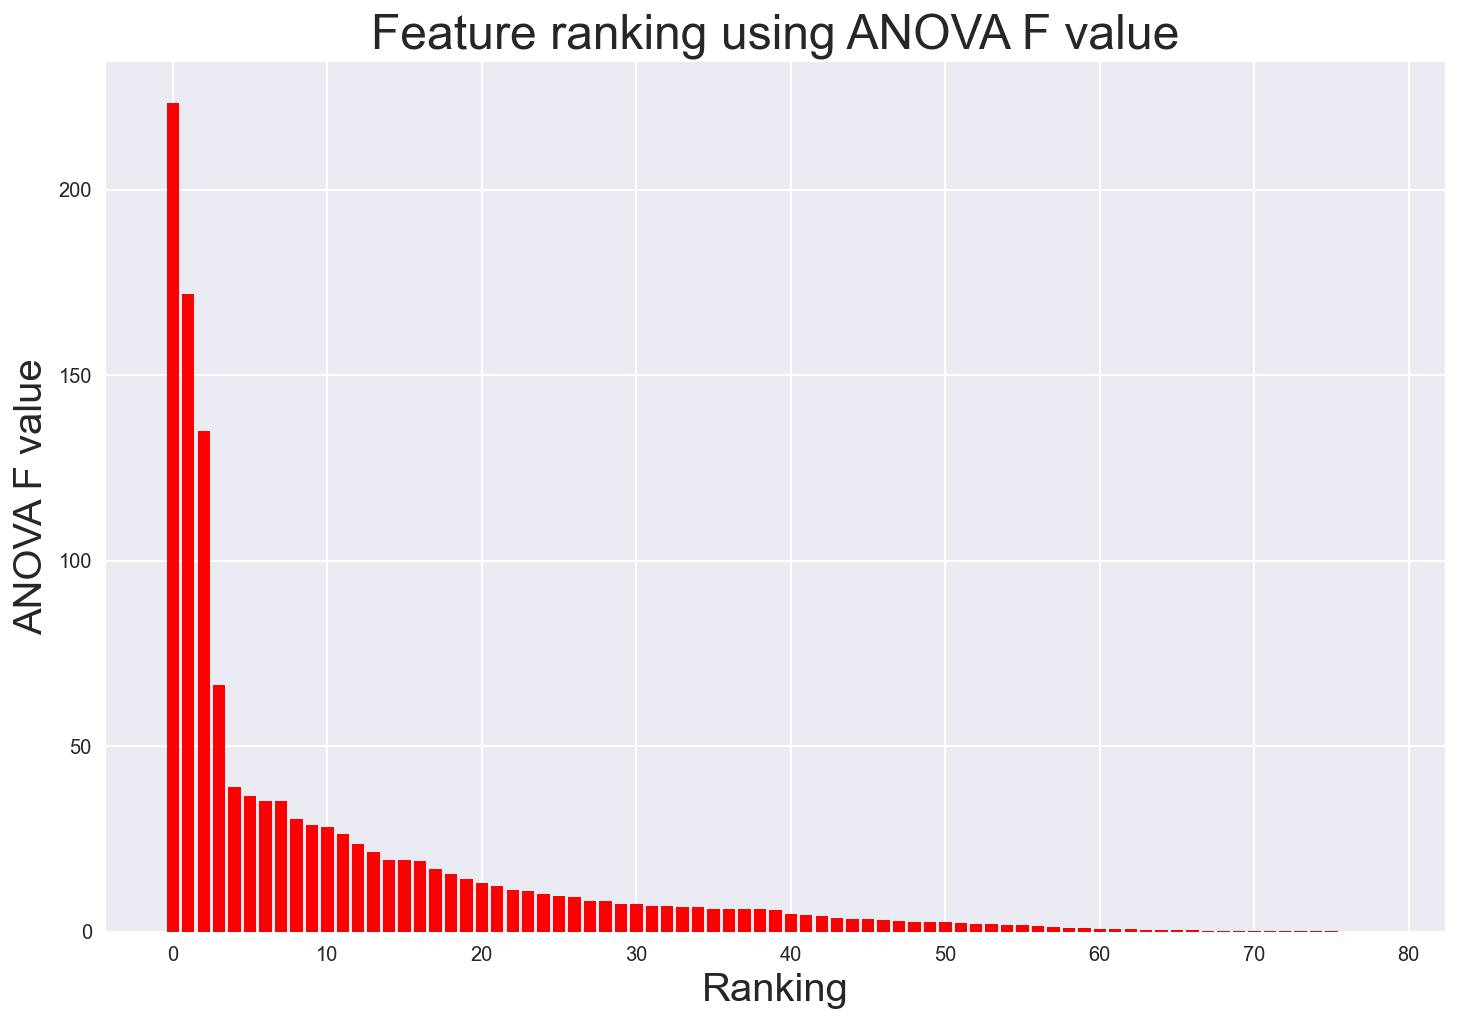

  rank  feature                                cumulative%    weight
------  -----------------------------------  -------------  --------
     1  number_of__talk__download_languages           18.2  223.349
     2  comment_count                                 32.2  172.022
     3  number_of__subtitled_videos                   43.1  135.07
     4  number_of__talk__more_resources               48.6   66.5778
     5  work_tag                                      51.7   38.8593
     6  number_of__talk__recommendations              54.7   36.6302
     7  growth_tag                                    57.6   35.1469
     8  personal_tag                                  60.4   35.1469
     9  success_tag                                   62.9   30.3231
    10  author_occupation                             65.2   28.6141
    11  leadership_tag                                67.5   28.2233
    12  psychology_tag                                69.7   26.4298
    13  business_tag                  

In [183]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
fs.fit(X_train, y_train)

# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# sort the scores for observations
sorted_scores = sorted(list(zip(X_train.columns, fs.scores_)), key=lambda x:x[1], reverse=True)

# tabulate the results for printing
total = sum([v for k,v in sorted_scores])
table=[]
cum = 0
count= 0
for k,v in sorted_scores:
    cum += v
    count+=1
    table.append([count, k, round(cum/total*100,1), round(v,4)])
    
# plot the graph
plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(sorted_scores))], [v for k,v in sorted_scores], color='red')

# Label the axes.
plt.ylabel('ANOVA F value', fontsize=20)
plt.xlabel('Ranking', fontsize=20)

# Title
plt.title('Feature ranking using ANOVA F value', fontsize=24)
plt.show()

#print the results
print(tabulate(table, headers=['rank', 'feature', 'cumulative%', 'weight']))

In [184]:
# get list of selected features
selected_features = [ i for i, j in sorted_scores[0:40]]
len(selected_features)

40

In [185]:
# display selected features
selected_features

['number_of__talk__download_languages',
 'comment_count',
 'number_of__subtitled_videos',
 'number_of__talk__more_resources',
 'work_tag',
 'number_of__talk__recommendations',
 'growth_tag',
 'personal_tag',
 'success_tag',
 'author_occupation',
 'leadership_tag',
 'psychology_tag',
 'business_tag',
 'brain_tag',
 'psychologist_occupation',
 'happiness_tag',
 'number_of__talks__take_actions',
 'age_months',
 'ted salon talk  partner _video',
 'duration',
 'self_tag',
 'ted institute talk_video',
 'communication_tag',
 'subjectivity',
 'ted stage talk_video',
 'ted  original_video',
 'engineer_occupation',
 'researcher_occupation',
 'artist_occupation',
 'teaching_tag',
 'writer_occupation',
 'technology_tag',
 'best web_video',
 'tedx talk_video',
 'body_tag',
 'philosopher_occupation',
 'comedian_occupation',
 'original content_video',
 'comedy_tag',
 'entrepreneur_tag']

In [186]:
# display selected features dataframe
ted_talk_preprocessed[selected_features]

number_of__talk__download_languages  comment_count  \
0                                      62    4952.000000   
1                                      47     288.000000   
2                                      51    2649.000000   
3                                      48    2093.000000   
4                                      52    2234.000000   
...                                   ...            ...   
4076                                    2       1.914286   
4077                                    4       1.857143   
4078                                    1       1.600000   
4079                                   12       1.571429   
4080                                    3       1.314286   

      number_of__subtitled_videos  number_of__talk__more_resources  work_tag  \
0                              61                                3         0   
1                              47                                1         0   
2                              50                                4         0   
3                              47                                1         0   
4                              51                                2         0   
...                           ...                              ...       ...   
4076                            0                                1         0   
4077                            0                                0         0   
4078                            0                                0         0   
4079                            0                                1         0   
4080                            0                                0         0   

      number_of__talk__recommendations  growth_tag  personal_tag  success_tag  \
0                                    1           0             0            0   
1                                    0           0             0            0   
2                                    0           0             0            1   
3                                    1           0             0            1   
4                                    1           0             0            0   
...                                ...         ...           ...          ...   
4076                                 0           0             0            0   
4077                                 0           0             0            0   
4078                                 0           0             0            0   
4079                                 0           0             0            0   
4080                                 0           0             0            0   

      author_occupation  leadership_tag  psychology_tag  business_tag  \
0                     1               0               0             0   
1                     0               0               0             0   
2                     0               0               1             1   
3                     0               1               0             1   
4                     0               0               1             0   
...                 ...             ...             ...           ...   
4076                  0               0               0             0   
4077                  0               0               0             0   
4078                  0               0               0             0   
4079                  0               0               0             0   
4080                  0               0               0             0   

      brain_tag  psychologist_occupation  happiness_tag  \
0             0                        0              0   
1             0                        0              0   
2             1                        1              0   
3             0                        0              0   
4             0                        0              0   
...         ...                      ...            ...   
4076          0                        0              0   
40

In [187]:
# create classification column
ted_talk_preprocessed['is_popular']

0       1
1       1
2       1
3       1
4       1
       ..
4076    0
4077    0
4078    0
4079    0
4080    0
Name: is_popular, Length: 4081, dtype: int64

The number of talks is a widely dispersed and highly skewed field, therefore predicting the exact number of views can be difficult. In order to find more general patterns of the influence of topics as applicable to the talks popularity, we are going to discretize the views and make it categorical.

In [188]:
# Exporting SelectKBest features

# Output: saving ted_talk after_cleaned dataframe posts to csv
ted_talk_preprocessed['is_popular'].to_csv('../dataset/ted_talk_preprocessed_target.csv', index = False)
ted_talk_preprocessed[selected_features].to_csv('../dataset/ted_talk_published_preprocessed_feature.csv', index = False)

## Create Feature Matrix (X =features) and Target (y popular class=is_popular)

3 sets of data is need to be created.

1) training set to train all models (60% of the data available)\
2) test set to check for accuracy after each modeling (20% of the data available)\
3) test best model selected using an unseen data to confirm performance (20% of the data available)

In [189]:
# create X (feature matrix(for features)) and y (target is_popular Ted talks)
X = ted_talk_preprocessed[selected_features]
y = ted_talk_preprocessed['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train) # 0.25 x 0.8 = 0.2

In [190]:
# separate duration for model evaluation later
X_duration = X_val['duration']

In [191]:
print(X_train.shape) # X_train, y_train will be used to train my models (60%)
print(y_train.shape)

print(X_test.shape) # X_test, y_test will be used to test the models (20%)
print(y_test.shape)

print(X_val.shape) # X_val, y_val will be used as unseen data to test the final selected model (20%)
print(y_val.shape)

(2448, 40)
(2448,)
(817, 40)
(817,)
(816, 40)
(816,)


In [192]:
# StandardScaler
ss = StandardScaler()
ss.fit(X_train)

# transform
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

## Modeling

Create 4 classification models - Support Vector Classifier, RandomForest, KNeighborsClassifier, Logistic Regression.

**Steps taken:**\
1) Obtain a baseline score\
2) Modeling using pipline Support Vector Classifier\
3) Modeling using pipline RandomForest\
4) Modeling using pipline KNeighborsClassifier\
5) Modeling using pipline Logistic Regression\
6) Evaluate their performance based on accuracy, confusion matrix and select the best model\
7) Evaluate best model's performance on unseen data\
8) Identify the top features that can predict whether a TED talk is popular or not\


- Train each model on training dataset (X_train, y_train dataset).
- Test each model on test dataset (X_test, y_test dataset).
- Test best model using unseen dataset (X_val, y_val dataset).
- Analyze confusion matrix for all models and obtain accuracy, sensitivity, specificity, precision for comparison


### Zero Rule Algorithm to obtain baseline
ZeroR is the simplest classification method which relies on the target and ignores all predictors. ZeroR classifier simply predicts the majority category (class). Although there is no predictability power in ZeroR, it is useful for determining a baseline performance as a benchmark for classification methods.

In [193]:
print("Accuracy of the baseline using Zero Rule Algorithm is") 
y_test.value_counts(normalize=True)

Accuracy of the baseline using Zero Rule Algorithm is


1    0.534884
0    0.465116
Name: is_popular, dtype: float64

### Support Vector Classifier

In [194]:
pipe_svc = Pipeline([
    ('svc', SVC())
])

params_svc={
    'svc__C': [0.1, 1, 10, 100, 1000], 
    'svc__gamma':    [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel':    ['rbf'], 
    'svc__random_state': [42],
}
gs_svc = GridSearchCV(pipe_svc,
                        param_grid=params_svc, 
                        cv=5,
                        n_jobs=2,
                        verbose=1)

gs_svc.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_svc.best_params_}')
print('Train Score:', gs_svc.score(X_train, y_train))
print('Test Score:', gs_svc.score(X_test, y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.7s
[Parallel(n_jobs=2)]: Done 125 out of 125 | elapsed:   37.5s finished


GridSearch Best Params: {'svc__C': 1000, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf', 'svc__random_state': 42}
Train Score: 0.755718954248366
Test Score: 0.7454100367197063


In [195]:
# Confusion matrix parameters function 

def conf_matrix(model, X_test, y_test):
    y_hat = model.predict(X_test) 
    # get confusion matrix data
    cm = confusion_matrix(y_test, y_hat)  
    # extract elements of confusion matrix
    tn, fp, fn, tp = cm.ravel()        
    
    # Convert Confusion Matrix to DataFrame
    df_cm = pd.DataFrame(cm, columns=['pred negative', 'pred positive'], index=['actual_negative', 'actual positive'])
    return df_cm
    
def conf_matrix_metrics(model, X_test, y_test):
    y_hat = model.predict(X_test) 
    cm = confusion_matrix(y_test, y_hat)  
    tn, fp, fn, tp = cm.ravel()           
    
    #calculate metrics 
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn/ (tn + fp)
    precision = tp /(tp + fp)
    
    return {'accuracy': np.round(accuracy,3),
            'sensitivity': np.round(sensitivity,3),
            'specificity': np.round(specificity,3),
            'precision': np.round(precision,3)}

In [196]:
print(conf_matrix(gs_svc, X_test, y_test))
conf_matrix_metrics(gs_svc, X_test, y_test)

                 pred negative  pred positive
actual_negative            267            113
actual positive             95            342


{'accuracy': 0.745,
 'sensitivity': 0.783,
 'specificity': 0.703,
 'precision': 0.752}

### RandomForest Modeling

In [197]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

params_rf={
    'rf__n_estimators': [25, 50, 100], 
    'rf__criterion':    ['gini', 'entropy'],
    'rf__max_depth':    [3, 5], 
    'rf__random_state': [42],
    'rf__max_features': ['auto'],
}
gs_rf = GridSearchCV(pipe_rf,
                        param_grid=params_rf, 
                        cv=5,
                        n_jobs=2,
                        verbose=1)

gs_rf.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_rf.best_params_}')
print('Train Score:', gs_rf.score(X_train, y_train))
print('Test Score:', gs_rf.score(X_test, y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.0s


GridSearch Best Params: {'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__max_features': 'auto', 'rf__n_estimators': 25, 'rf__random_state': 42}
Train Score: 0.7708333333333334
Test Score: 0.7466340269277846


[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    6.8s finished


In [198]:
print(conf_matrix(gs_rf, X_test, y_test))
conf_matrix_metrics(gs_rf, X_test, y_test)

                 pred negative  pred positive
actual_negative            272            108
actual positive             99            338


{'accuracy': 0.747,
 'sensitivity': 0.773,
 'specificity': 0.716,
 'precision': 0.758}

### KNeighborsClassifier

In [199]:
pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

params_knn = {
    'knn__leaf_size':   [3,5,7,9,14],
    'knn__n_neighbors': [3,5,10,15],
    'knn__p': [1,2]
}
gs_knn = GridSearchCV(pipe_knn, param_grid=params_knn,
                    cv=5,
                    n_jobs=2,
                    verbose=1)

gs_knn.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_knn.best_params_}')
print('Train Score:', gs_knn.score(X_train, y_train))
print('Test Score:', gs_knn.score(X_test, y_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   22.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   23.0s finished


GridSearch Best Params: {'knn__leaf_size': 3, 'knn__n_neighbors': 15, 'knn__p': 1}
Train Score: 0.7389705882352942
Test Score: 0.6964504283965728


In [200]:
print(conf_matrix(gs_knn, X_test, y_test))
conf_matrix_metrics(gs_knn, X_test, y_test)

                 pred negative  pred positive
actual_negative            279            101
actual positive            147            290


{'accuracy': 0.696,
 'sensitivity': 0.664,
 'specificity': 0.734,
 'precision': 0.742}

### Logistic Regression

In [201]:
pipe_lr = Pipeline([
    ('lr', LogisticRegression())
])

params_lr = {
    'lr__penalty':      ['l2', 'l1'],
    'lr__C':            [.5, .01, 0.1, 1],
    'lr__random_state': [42] 
}
gs_lr = GridSearchCV(pipe_lr, 
                    param_grid=params_lr,
                    cv=5,
                    n_jobs=2,
                    verbose=1)

gs_lr.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_lr.best_params_}')
print('Train Score:', gs_lr.score(X_train, y_train))
print('Test Score:', gs_lr.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


GridSearch Best Params: {'lr__C': 1, 'lr__penalty': 'l2', 'lr__random_state': 42}
Train Score: 0.7487745098039216
Test Score: 0.7417380660954712


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.4s finished


In [202]:
print(conf_matrix(gs_lr, X_test, y_test))
conf_matrix_metrics(gs_lr, X_test, y_test)

                 pred negative  pred positive
actual_negative            269            111
actual positive            100            337


{'accuracy': 0.742,
 'sensitivity': 0.771,
 'specificity': 0.708,
 'precision': 0.752}

### Summary of models performance

Other than KNeighborsClassifier performing at 0.696, all the rest of the models were performing at 0.74~ accuracy for test set. 

All the models on training set acheived minimum 0.74 and 0.696.\
All the models showed at least 1.3x better accuracy score than the baseline.

For Support Vector Classifier it achieved 0.756 and 0.745 on test data, the differential is 0.011\
For RandomForest Classifier it achieved 0.771 and 0.747 on test data, the differential is 0.024\
For KNeighborsClassifier it achieved 0.739 on train and 0.696 on test data, the differential is 0.043\
For Logistic Regression 0.749 on train and 0.742 on test data, the differential is 0.007

Hence the best model is Logistic Regression model because the train and test score is the closest to each other. We can predict with an accuracy of 74% on whether a TED talk is popular or not.




|           Dataset           |                                       Support Vector Classifier                                      |                                             RandomForest                                             |                                          KNeighborsClassifier                                         |                                                Logistic Regression                                               |
|:---------------------------:|:----------------------------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------:|
|            Train            |                                                 0.756                                                |                                                 0.771                                                |                                                 0.739                                                 |                                                 0.749                                                 |
|             Test            |                                                 0.745                                                |                                                 0.747                                                |                                                 0.696                                                 |                                                 0.742                                                 |
|       Confusion Matrix      | True Negative: 267<br>     False Negative: 95<br>     False Positive: 113<br>     True Positive: 342 | True Negative: 272<br>     False Negative: 99<br>     False Positive: 108<br>     True Positive: 338 | True Negative: 279<br>     False Negative: 147<br>     False Positive: 101<br>     True Positive: 290 | True Negative: 269<br>     False Negative: 100<br>     False Positive: 111<br>     True Positive: 337 |
| Confusion Matrix Parameters |    accuracy: 0.745<br>     sensitivity: 0.783<br>     specificity: 0.703<br>     precision: 0.752    |    accuracy: 0.747<br>     sensitivity: 0.773<br>     specificity: 0.716<br>     precision: 0.758    |     accuracy: 0.696<br>     sensitivity: 0.664<br>     specificity: 0.734<br>     precision: 0.742    |     accuracy: 0.742<br>     sensitivity: 0.771<br>     specificity: 0.708<br>     precision: 0.752    |


Before we look at best model's performance on unseen data!
Lets model fit Logistic Regression.


## Model fit with Logistic Regression

In [203]:
# display best parameters
gs_lr.best_params_

{'lr__C': 1, 'lr__penalty': 'l2', 'lr__random_state': 42}

In [204]:
# display best model
final_lr = Pipeline([
     ('lr', LogisticRegression(C= 1, penalty= 'l2', random_state= 42))
     ])

In [205]:
# fit using training set
final_lr.fit(X_train,y_train)

Pipeline(steps=[('lr', LogisticRegression(C=1, random_state=42))])

In [206]:
# score training data
final_lr.score(X_train,y_train)

0.7487745098039216

In [207]:
# score test data
final_lr.score(X_test,y_test)

0.7417380660954712

In [208]:
# score unseen data set
final_lr.score(X_val,y_val)

0.7475490196078431

In [209]:
# Generate our predictions using unseen data
pred = final_lr.predict(X_val)

In [210]:
#y_val.reset_index(inplace=True, drop = True)
y_val = np.array(y_val)

In [211]:
# Making a dataframe with unseen data, which contains features, actual class value, 
# predicted class value, and predict probability

results_pred = pd.DataFrame(X_val, columns=[selected_features]) # making a dataframe on one column known

# unseen
results_pred['actual'] = y_val # add 'actual' column
results_pred['predictions'] = pred
results_pred['predict_proba'] = [i[1] for i in final_lr.predict_proba(X_val)]
results_pred.shape

(816, 43)

In [212]:
# display prediction results
results_pred.head(20)

number_of__talk__download_languages comment_count  \
0                             1.311747      0.062257   
1                            -0.358237     -0.322944   
2                            -0.024240     -0.511613   
3                             0.866418     -0.087107   
4                             1.089083      0.077979   
5                            -1.582892     -0.574503   
6                            -1.471560     -0.311152   
7                             0.532421     -0.173580   
8                            -0.024240     -0.342597   
9                             0.198424      0.036708   
10                            0.087092     -0.435949   
11                           -0.024240     -0.203060   
12                           -0.803566      0.007228   
13                            0.309757      0.451388   
14                            1.089083     -0.519475   
15                           -0.024240     -0.472307   
16                           -1.137563     -0.539128   
17                           -0.135573     -0.582364   
18                            0.198424      0.203759   
19                           -0.135573     -0.354389   

   number_of__subtitled_videos number_of__talk__more_resources  work_tag  \
0                     1.225798                       -0.557217 -0.191960   
1                     0.040760                       -0.557217 -0.191960   
2                     0.277768                        0.654211 -0.191960   
3                     0.909788                        0.654211  5.209408   
4                     0.988791                       -0.557217 -0.191960   
5                    -0.828268                       -0.557217 -0.191960   
6                    -0.749266                       -0.557217 -0.191960   
7                     0.593778                       -0.557217 -0.191960   
8                     0.277768                       -0.557217 -0.191960   
9                    -1.697296                       -0.557217 -0.191960   
10                   -1.697296                       -0.557217 -0.191960   
11                   -1.697296                       -0.557217 -0.191960   
12                   -1.697296                       -0.557217 -0.191960   
13                    0.435773                       -0.557217 -0.191960   
14                    0.909788                        1.865639 -0.191960   
15                    0.277768                        3.077067 -0.191960   
16                   -0.512258                        0.654211 -0.191960   
17                    0.198765                       -0.557217 -0.191960   
18                    0.435773                       -0.557217 -0.191960   
19                   -1.697296                       -0.557217 -0.191960   

   number_of__talk__recommendations growth_tag personal_tag success_tag  \
0                          4.390237  -0.253669    -0.253669    -0.10361   
1                          1.133973   3.942149     3.942149    -0.10361   
2                          1.133973   3.942149     3.942149    -0.10361   
3                         -0.494159  -0.253669    -0.253669    -0.10361   
4                         -0.494159  -0.253669    -0.253669    -0.10361   
5                         -0.494159  -0.253669    -0.253669    -0.10361   
6                         -0.494159  -0.253669    -0.253669    -0.10361   
7                         -0.494159  -0.253669    -0.253669    -0.10361   
8                         -0.494159  -0.253669    -0.253669    -0.10361   
9                         -0.494159  -0.253669    -0.253669    -0.10361   
10                        -0.494159  -0.253669    -0.253669    -0.10361   
11                        -0.494159  -0.253669    -0.253669    -0.10361   
12                        -0.494159  -0.253669    -0.253669    -0.10361   
13                        -0.494159  -0.253669    -0.253669    -0.10361   
14                        -0.494159  -0.253669    -0.253669    -0.10361   
15                         1.

In [213]:
# identify popular TED talks' duration
duration_pred = pd.DataFrame(X_duration, columns=['duration'])
duration_pred['predictions'] = pred

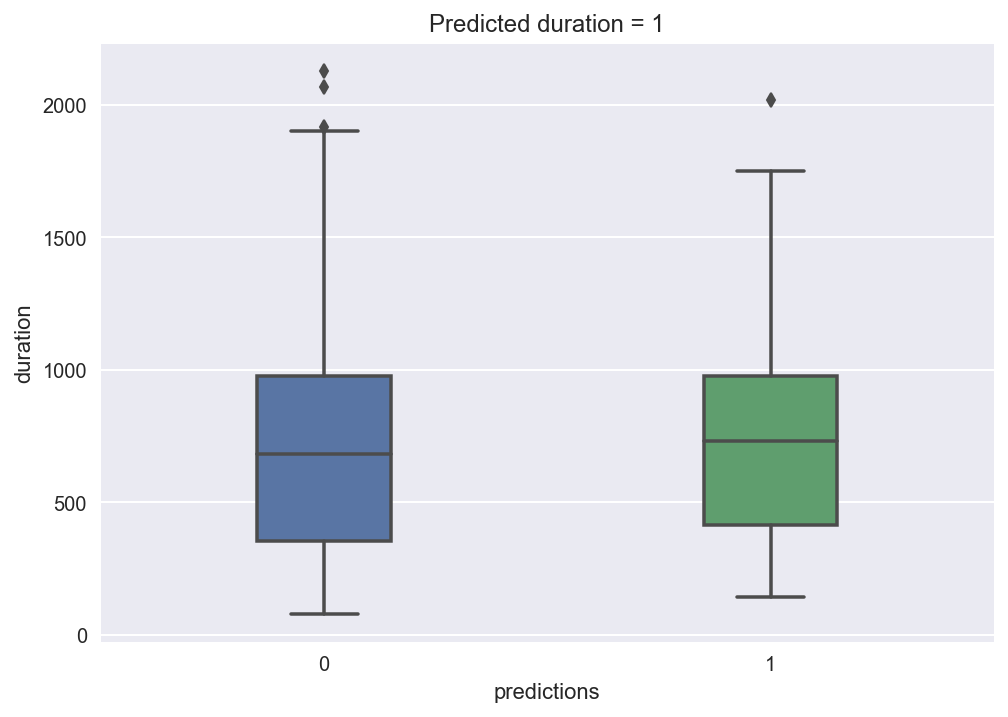

In [214]:
# plot predicted duration
sns.boxplot(x = duration_pred['predictions'], y = duration_pred['duration'], width = 0.3).set_title('Predicted duration = 1');

## Modeling Evaluation
Generating confusion matrix using unseen data

In [215]:
# Generate a confusion matrix.
cm = confusion_matrix(y_val, pred)
# convert into dataframe for better view
df_cm = pd.DataFrame(cm, columns=['pred negative', 'pred positive'], index=['actual_negative', 'actual positive'])
print("---------- This is the confusion matrix --------------")
print(df_cm)
print("------------------------------------------------------")
print('')

# assign terms for each confusion matrix parameter
tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()

# print out the scores
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('')

# look at the scores of the parameters
accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('')

print('Accuracy:',round(accuracy,3))
print('Sensitivity:',round(sensitivity,3))
print('Specificity:',round(specificity,3))
print('Precision:',round(precision,3))

---------- This is the confusion matrix --------------
                 pred negative  pred positive
actual_negative            279            101
actual positive            105            331
------------------------------------------------------

True Negatives: 279
False Positives: 101
False Negatives: 105
True Positives: 331


Accuracy: 0.748
Sensitivity: 0.759
Specificity: 0.734
Precision: 0.766


### Best model Logistic Regression achieved 74.8% score on unseen data, with 0% overfit

**Performance matrix:**

|                             | Train         | Test                                                                                                  | Unseen                                                                                                    |
|-----------------------------|---------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
|                       score |     0.749     |                                                 0.742                                                 |                                                   0.748                                                   |
|            confusion matrix | not generated | True Negative: 269<br>     False Negative: 100<br>     False Positive: 111<br>     True Positive: 337 | True Negatives: 279<br>     False Negatives: 105<br>     False Positives: 101<br>     True Positives: 331 |
| confusion matrix parameters | not generated |     accuracy: 0.742<br>     sensitivity: 0.771<br>     specificity: 0.708<br>     precision: 0.752    |       accuracy: 0.748<br>     sensitivity: 0.759<br>     specificity: 0.734<br>     precision: 0.766      |



Negative = unpopular TED talks = 0 = view count below median\
Positive = is popular TED talks = 1 = view count above median\
True positive = 331, correctly predicted as is popular TED talks\
True negative = 279, correctly predicted as unpopular TED talks\
False negative = 105, means popular TED talks predicted as unpopular TED talks\
False positive = 101, means unpopular TED talk predicted as popular TED talks

Type I error = False Positive = 101 talks\
Type II error = False Negative = 105 talks

In this case, there is no 'worse-off' for being Type I or Type II error. This is because misclassification a talk into either category is equally bad. Hence unable to explain which error is worse.

**Intepretation:**
- Acurracy of unseen data is 74.8% meaning the model predicted 74.8% of the unseen data correctly to the correct TED talk popularity category.
- Missclassification rate = 25.2%, means 25.2% of the TED talks did not get classified correctly.
- Sensitivity (recall) is 75.9%, meaning if a talk belongs to popular talk, 75.9% probabiliy that it will be identified as a talk from popular talk class.
- Specificity is 73.4%, meaning that if a talk belongs to the unpopular class, it will have 73.4% probability chance that it will be identified as a talk from the unpopular class.
- Precision is 76.6%, meaning 76.6% probability of popular talks will be predicted as popular talks


### Top Predictive Features
The top predictive features are:
1. comment_count
2. number_of__talk__download_languages
3. duration
4. leadership_tag
5. happiness_tag	
6. success_tag
7. self_tag
8. comedy_tag
9. number_of__talk__more_resources
10. number_of__talk__recommendations
11. ted salon talk partner _video

The top inversely correlated features are:
12. age_months
13. ted original_video (longer animated videos)
14. number_of__subtitled_videos
15. original content_video

Based on the results. I observed that comment count, tag(topics about leadership, happiness, success, self, comedy) and age of the TED talks are the deciding factors of whether a talk is popular. Highly commented, more downloaded languages, reasonably 8 to 16min duration, non-animated, recent funny talks on leadership, happiness, success on oneself will be a highly viewed TED talk.


To my surprise, occupation of the speaker is a less important feature. Transcript sentiment is a non-predictive feature as expected, based on exploratory data analysis in [View_count_prediction_using_ted_talk_transcripts](urlView_count_prediction_using_ted_talk_transcripts.ipynb), all the TED talks were highly positive and opinionated. This aligns with the vision of TED, which is to inspire communicate passion of interesting people. Hence, it is difficult to use sentiments to differentiate a popular and non popular TED talk.

In [216]:
# Please see below for the full list:
coef_rank = pd.DataFrame(zip(X.columns, np.transpose(final_lr['lr'].coef_.tolist()[0])), columns=['features', 'coef']).\
sort_values('coef',ascending=False)

# display data
coef_rank

features      coef
1                         comment_count  1.545311
0   number_of__talk__download_languages  1.331461
19                             duration  0.463988
10                       leadership_tag  0.224362
15                        happiness_tag  0.167257
8                           success_tag  0.159361
20                             self_tag  0.142547
38                           comedy_tag  0.142428
3       number_of__talk__more_resources  0.139844
5      number_of__talk__recommendations  0.137991
18       ted salon talk  partner _video  0.137343
24                 ted stage talk_video  0.116358
21             ted institute talk_video  0.091782
39                     entrepreneur_tag  0.087188
23                         subjectivity  0.079484
31                       technology_tag  0.077789
13                            brain_tag  0.076489
33                      tedx talk_video  0.074041
9                     author_occupation  0.073981
29                         teaching_tag  0.068727
12                         business_tag  0.061617
34                             body_tag  0.060485
16       number_of__talks__take_actions  0.059599
22                    communication_tag  0.052030
4                              work_tag  0.051957
7                          personal_tag  0.047712
6                            growth_tag  0.047712
11                       psychology_tag  0.030585
32                       best web_video  0.016778
35               philosopher_occupation  0.014454
14              psychologist_occupation  0.011762
27                researcher_occupation -0.001756
36                  comedian_occupation -0.018840
30                    writer_occupation -0.069624
26                  engineer_occupation -0.070206
28                    artist_occupation -0.104875
37               original content_video -0.148123
2           number_of__subtitled_videos -0.252050
25                  ted  original_video -0.291965
17                           age_months -1.324447

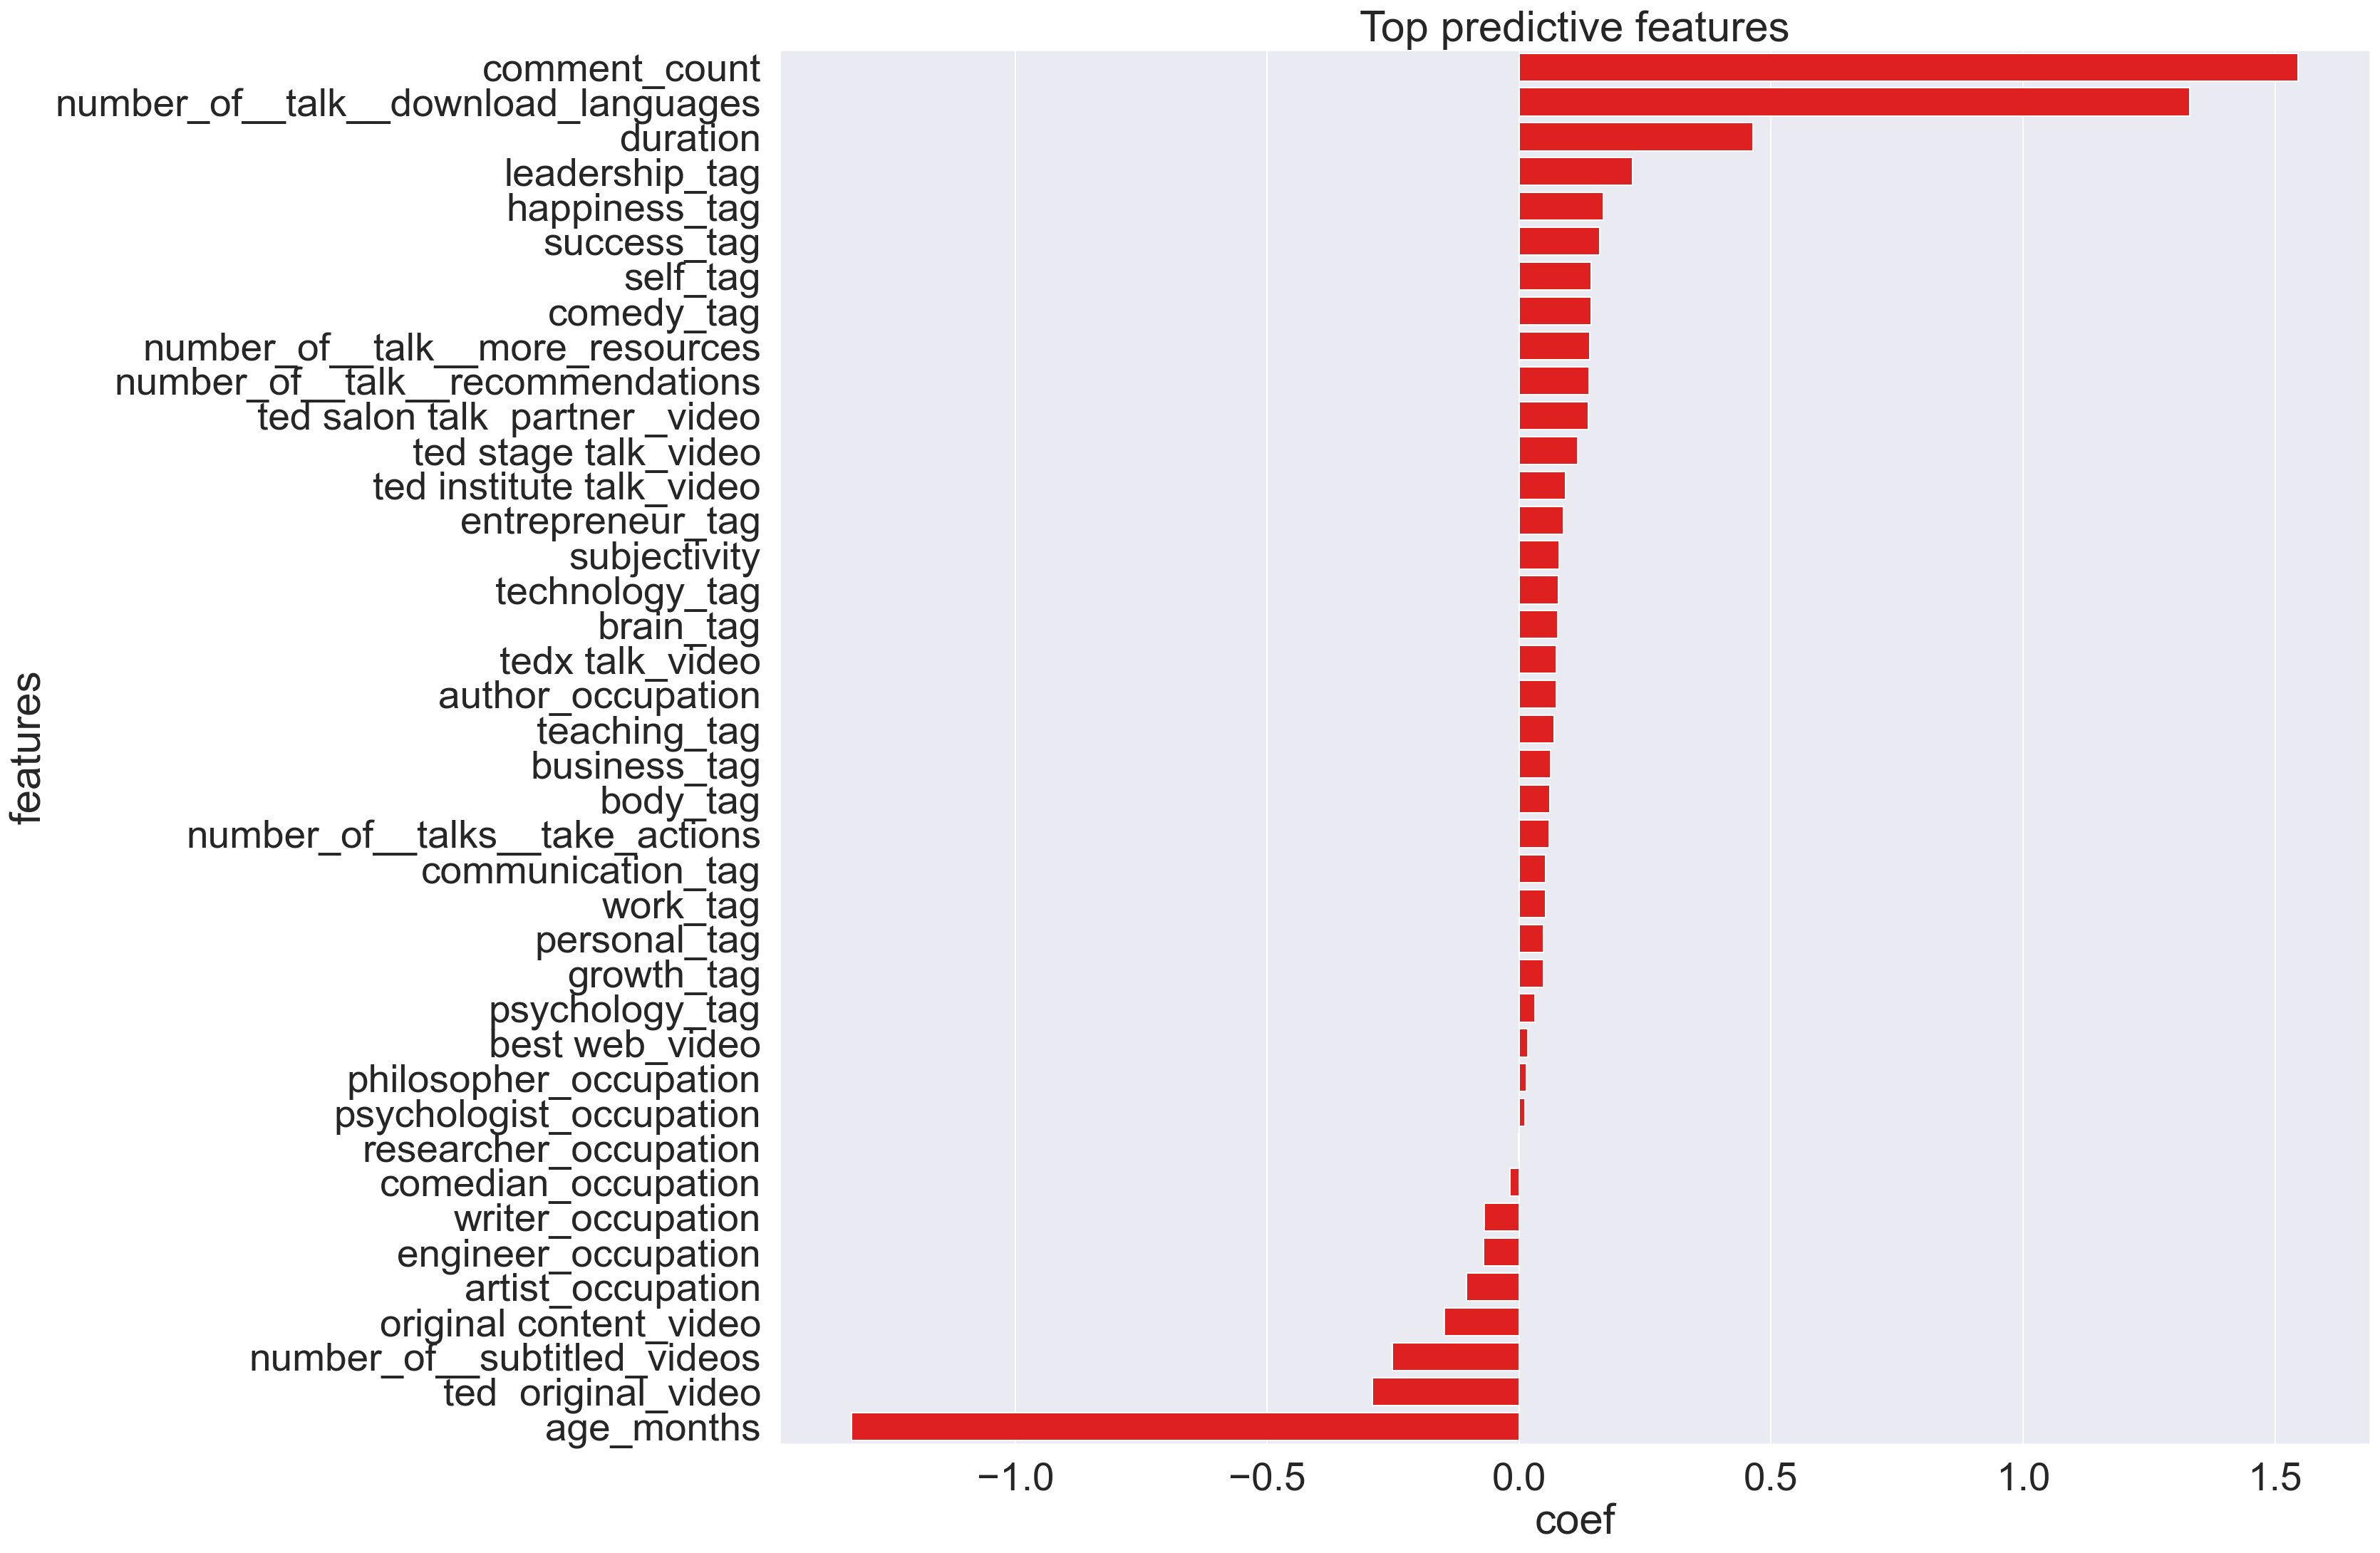

In [217]:
# plot graph for top predictive features
plt.figure(figsize=(20,18))
sns.set(font_scale=2.5)
ax = sns.barplot(y=coef_rank.features, x=coef_rank.coef, data=coef_rank[:30], color='red').\
set_title('Top predictive features')

## Developing a content based TED talk Recommender System

During the data cleaning process of this project, I notice the recommendation features in this dataset is mostly null values else not useful. As TED talk homepage has a fully developed recommender system, I see the demand for it and hence decided to create a simple one.

In content based recommender systems, keywords or properties of the items are taken into consideration while recommending an item to an user. So, in a nutshell it is like recommending similar items. Imagine you are reading a book on data visualization and want to look for other books on the same topic. In this scenario, content based recommender system would be apt.

In our project, the recommender was done based on the title of TED talks.

Using t-distributed Stochastic Neighbor Embedding (tSNE) to visualize the topic space is by far the most popular choice by most people who attempted recommender creation for TED talk. 

Model frequently used was Latent Dirichlet Allocation (LDA) which creates a latent space where documents that have similar topics that are closer together. This is because matrix documents from a similar topic tend to have similar words, and LDA picks up on this. A label was then assigned to each topic based on the most frequent words for each topic. 

Others uses Gensim Word2Vec model, which algorithm receives a large amount of text data (speeches, book content, dictionaries, crawled text from websites and so on) and assigns each word to a corresponding vector in space (the dimension of the vector is typically around 50–1000, depending on the data set). These “word vectors” are positioned close to other words, that are used in a similar context such as within the same sentence. E.g. the word „sing“ could be positioned close to „song“. The assignment also depends on the data set. 

The last modeling method that was K means clustering. KMeans attempts to organize the data into a specified number of clusters. The number of clusters is required to be defined. The number of clusters cannot exceed the number of features in the dataset. The goal of KMeans is to identify similar data points and cluster them together while trying to distance each cluster as far as possible. Its “similarity” calculation is determined via Euclidean distance or an ordinary straight line between two points. The shorter the Euclidean distance the more similar the points are.

After studying the above methods, I decided to go with Term Frequency-Inverse Document Frequency(Tfidf) for creating the word vector. To find out similar documents among different documents, we will need to compute a measure of similarity. Usually when dealing with Tf-Idf vectors, we use cosine similarity. Think of cosine similarity as measuring how close one TF-Idf vector is from the other. Now if you remember from the previous discussion, we were able to represent each Ted title as a vector, so the cosine similarity will become means for us to find out how similar the TED title of one Ted Talk is to the other. This method is selected because it is easy to apply and most importantly, it is very accurate! Please see below for the results.

In [218]:
# import data for titles
ted_talk_recommend = pd.read_csv('../dataset/ted_talk_after_cleaned.csv')

In [219]:
# display columns
ted_talk_recommend.columns

Index(['talk__id', 'talk__description', 'view_count', 'comment_count',
       'duration', 'video_type_name', 'event', 'number_of__speakers',
       'speaker__description', 'speaker__who_he_is', 'speaker__why_listen',
       'speaker__is_published', 'all_speakers_details', 'is_talk_featured',
       'talks__tags', 'number_of__tags', 'is_subtitle_required',
       'number_of__subtitled_videos', 'number_of__talk__download_languages',
       'number_of__talk__more_resources', 'number_of__talk__recommendations',
       'number_of__related_talks', 'ad_duration', 'post_ad_duration',
       'number_of__talks__take_actions', 'talk__name', 'speaker__name',
       'url__webpage'],
      dtype='object')

In [220]:
# select only features needed for recmmender creation
ted_talk_recommend_title = ted_talk_recommend[['talk__id','talk__name', 'url__webpage']]

In [221]:
# display dataframe
ted_talk_recommend_title.head()

talk__id                                         talk__name  \
0        66                        Do schools kill creativity?   
1      2405  This is what happens when you reply to spam email   
2      1569           Your body language may shape who you are   
3       848                   How great leaders inspire action   
4      1042                         The power of vulnerability   

                                                                               url__webpage  
0                     https://www.ted.com/talks/sir_ken_robinson_do_schools_kill_creativity  
1  https://www.ted.com/talks/james_veitch_this_is_what_happens_when_you_reply_to_spam_email  
2              https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are  
3                    https://www.ted.com/talks/simon_sinek_how_great_leaders_inspire_action  
4                          https://www.ted.com/talks/brene_brown_the_power_of_vulnerability

A word is important in a document if, it occurs a lot in the document, but rarely in other documents in the corpus. Term Frequency measures how often the word appears in a given document, while Inverse term frquency measures how rare the word is in a corpus. The product of these two quantities, measures the importance of the word and is known as Tf-Idf. Creating a tf-idf representation is fairly straightforward, if you are working with a machine learning frame-work, such as scikit-learn, it's fairly straighforward to create a matrix representation of text data

In [222]:
# istantiate tfidfvectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [223]:
# fit
tfidf_matrix = tf.fit_transform(ted_talk_recommend_title['talk__name'])

In [224]:
# check amtrix created
tfidf_matrix.shape

(4396, 24133)

To find out similar documents among different documents, we will need to compute a measure of similarity. Usually when dealing with Tf-Idf vectors, we use cosine similarity. Think of cosine similarity as measuring how close one TF-Idf vector is from the other. Since we were able to represent each transcript as a vector, so the cosine similarity will become a means for us to find out how similar the title of one Ted Talk is to the other.

In [225]:
# create cosine similiarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}

for idx, row in ted_talk_recommend_title.iterrows(): #iterates through all the rows

# the below code 'similar_indice' stores similar ids based on cosine similarity. sorts them in ascending order [:-5:-1] is then used
# 0 means no similarity and 1 means perfect similarity#
    similar_indices = cosine_similarities[idx].argsort()[:-5:-1] 

    #stores 5 most similar talks, you can change it as per your needs
    similar_items = [(cosine_similarities[idx][i], ted_talk_recommend_title['talk__id'][i], \
                      ted_talk_recommend_title['url__webpage'][i]) for i in similar_indices]
    results[row['talk__id']] = similar_items[1:]

In [226]:
# diplay 66 talk id only for better viewing
results[66]

[(0.19284336702733668,
  1732,
  'https://www.ted.com/talks/geoffrey_canada_our_failing_schools_enough_is_enough'),
 (0.1879978317183334,
  1613,
  'https://www.ted.com/talks/julie_burstein_4_lessons_in_creativity'),
 (0.18085773368151464,
  396,
  'https://www.ted.com/talks/isaac_mizrahi_fashion_and_creativity')]

In [227]:
#below code 'function item(id)' returns a row matching the id along with talk Title. Initially it is a dataframe, then we convert it to a list#
def item(id):
    return ted_talk_recommend_title.loc[ted_talk_recommend_title['talk__id'] == id]['talk__name'].tolist()[0]

def wbpagelink(id):
    return ted_talk_recommend_title.loc[ted_talk_recommend_title['talk__id'] == id]['url__webpage'].tolist()[0]

def recommend(id, num):
    if (num == 0):
        print("Unable to recommend any ted talks as you have not chosen the number of talks to be recommended")
    elif (num==1):
        print("Recommending " + str(num) + " ted talks similar to: " + item(id) + '\n' + wbpagelink(id))
        print(' ')
        
    else :
        print("Recommending " + str(num) + " ted talks similar to: " + item(id) + '\n' + wbpagelink(id))
        print(' ')
        print("----------------------------------------------------------")

    recs = results[id][:num]
    for rec in recs:
        print("You may also like to view: " + item(rec[1]) + " (score:" + str(rec[0]) + ")\n"+ rec[2])
        print(' ')

In [228]:
#the first argument in the below function to be passed is the id of the talk, second argument is the number of talks you want to be recommended#
recommend(1042,3)

Recommending 3 ted talks similar to: The power of vulnerability
https://www.ted.com/talks/brene_brown_the_power_of_vulnerability
 
----------------------------------------------------------
You may also like to view: An art made of trust, vulnerability and connection (score:0.21840989708732303)
https://www.ted.com/talks/marina_abramovic_an_art_made_of_trust_vulnerability_and_connection
 
You may also like to view: The power of time off (score:0.18263010476165611)
https://www.ted.com/talks/stefan_sagmeister_the_power_of_time_off
 
You may also like to view: How to understand power (score:0.1778930987294059)
https://www.ted.com/talks/eric_liu_how_to_understand_power
 


In [229]:
# recommendation for talk id 20319
recommend(20319,3)

Recommending 3 ted talks similar to: How do cigarettes affect the body?
https://www.ted.com/talks/krishna_sudhir_how_do_cigarettes_affect_the_body
 
----------------------------------------------------------
You may also like to view: How rollercoasters affect your body (score:0.421405328448158)
https://www.ted.com/talks/brian_d_avery_how_rollercoasters_affect_your_body
 
You may also like to view: What you should know about vaping and e-cigarettes (score:0.1748056453106719)
https://www.ted.com/talks/suchitra_krishnan_sarin_what_you_should_know_about_vaping_and_e_cigarettes
 
You may also like to view: Own your body's data (score:0.16312576817621094)
https://www.ted.com/talks/talithia_williams_own_your_body_s_data
 


In [230]:
# recommendation for talk id 66
recommend(66,3)

Recommending 3 ted talks similar to: Do schools kill creativity?
https://www.ted.com/talks/sir_ken_robinson_do_schools_kill_creativity
 
----------------------------------------------------------
You may also like to view: Our failing schools. Enough is enough! (score:0.19284336702733668)
https://www.ted.com/talks/geoffrey_canada_our_failing_schools_enough_is_enough
 
You may also like to view: 4 lessons in creativity (score:0.1879978317183334)
https://www.ted.com/talks/julie_burstein_4_lessons_in_creativity
 
You may also like to view: Fashion and creativity (score:0.18085773368151464)
https://www.ted.com/talks/isaac_mizrahi_fashion_and_creativity
 


### Summary of the recommender results

I would say this simple recommender is more like a search engine that find identical words from the selected title rather than identical meanings from the content. This is expected as only the title of the TEd talk is fed into this simple recommender, hence it does not take into the account of its content/transcripts.

Nevertheless, I find the results of this recommender is pretty promising. The recommender took words that exists in the talk, input by the user and find similar words in other talks for recommendation. It is not 100% accurate but you can see word similarities to the title input. Example, talk id 20319, How do cigarettes affect the body? It recommended a talk with the phrase "affect your body" and "cigarettes". "cigarettes" is an important unique word and the recommender is able to pick this up as similarity. The first recommended talk "How rollercoasters affect your body" has a higher weightage as it has more similar words ("affect your body") than the second recommendation. This shows the recommender also consider the number of similar words.


## Conclusion

**Viable classification model**
After evaluating all the models, the final optimized model is the Logistic Regression classifier with accuracy score to be 0.74, 0% overfit, with the following parameters:
- C=1
- penalty = l2
- random state = 42

I used the best performing model logistic regression to predict if a TED talk is popular or unpopular. The model demostrates moderately good accuarcy of popularity prediction and has 0% overfit. From there, I found out which are the top predictive features of a popular TED talk. They are:
- comment count
- video age
- number of download languages
- duration
- leadership tag
- happiness tag
- whether it is a ted original video (animated)
- Number of subtitled videos

Majority of the features above are aligned with my EDA results.

In a nutshell, characteristics of a popular TED talk is highly commented, published recently, 8 to 16 min long, high number of download languages, non-animated videos, low in number of subtitle language, likely to be about leadership, happiness and success. Primary stakeholders TED fundrising and marketing department and secondary stakeholders - TED speakers can now make use of my model to increase popularity of their talks, so that big ideas can outreach to more people. This can increases interest and more funds can be raised to support world's most challenging issues.

On a sidenote, view count based on transcripts and sentiments are less promising. Modeling results and EDA shows that unpopular and popular TED talks have very similar sentiments, which are opinionated and positive. Transcript wise, best model is Naive Bayes + Tfidf achieved 63.1% score on unseen data. This result is not promising because based on EDA and modeling, important words used for popular and unpopular words are similar. They are 'one', 'knowledge', 'think', 'people'. This can be observed from the model coefficients generated, they were all negative. Meaning, no words can predict a unpopular TED talk. The sentiments and transcripts modeling result is however, understandable. Popular and unpopular TED talks all aligned with TED's vision, which is foster the spread of great ideas. It aims to provide a platform for thinkers, visionaries and teachers, so that people around the globe can gain a better understanding of the biggest issues faced by the world, and feed a desire to help create a better future. 

**Project Achievement Summary**
- View count prediction using transcripts ~63% accuracy
- View count prediction using features ~75% accuracy with 0% overfit
- Sentiment Analysis. All talks are positive and opinionated. This aligned with TED vision
- Created a simple content based recommender Reasonable recommendations made by the model. Further improvement needed. Please see recommendations.

## Recommendations

Areas for primary stakeholders (TED organisation fundraising and marketing department):
- Publish less animated videos and focus in more physical human presentations
- Invite more leaders for light hearted talks.
- Increase the number of embedded subtitles as subtitles are usually stored on a separate file.
- Decrease the number of subtitled videos as most non native englishing public prefers to download the video and watch offline (see previous point).


Areas for secondary stakeholders (TED speakers):
- TED speakers can consider my model and make adjustment to their presentation style.

Areas for my future expansion and future exploration:
- Expand recommender to that applies Collaborative filtering, which is find users who are similar and recommend what they like (user-based). Currently this method is not used by TED, hence great value for exploration.
- Increase the description or attributions from the items the user has interacted to recommend similar items. Examples, year published, speaker, duration, rather than just title alone.
- Evaluate recommender statistically
- Explore depolyment of recommender
- Moving forward, the model can be continuously improved by introducing more new data to it. Currently there is only 4000~ ted talk features. This can be increased as more TED talks were published.
- Other features eg comment content, number of words in the transcripts, speed of the speakers, gender of the speakers to be included into the dataset.
- Since TED is about supporting world's challenging issues, we can expand the model to predict the view count of challenging or less challenging issues.
- Since one of the feature is comment count, we can analyze deeper to see what are the factors that will trigger more comments and discussion of the public. When number comments increases, more people will go and view the video.
- Therefore, data scientist in TED organisation can consider predicting view count using viewer profiles information collected. 


## Future Steps
Now that we have proven the viability of classifying prediction model, the next step will be for TED fundrising and marketing department to implement the features for their upcoming talks. Example, made the characteristics of a popular TED talk known to the future speakers as recommendations or make less of animated videos and focus in physical human talks.

## Limitations
- Our model has an accuarcy 0.74 hence there will be risk of falsely prediction. The implementation plan can still be adjusted accordingly. Speaker and TED organisation will have the right to decide the nature and features of talk that suits them most.
- This modeling process only works for binary classification. For Multi classification problems, the process will have to be modified and reevaluated.
- Transcripts and sentiments have limitation for predictions, reason being all the talks, be it popular or unpopular are aligned with the vision of TED organization. 


## Sources and References
[The Audacious Project](urlhttps://audaciousproject.org/)\
[Playing TEDTalks with subtitles offline](urlhttps://translations.ted.com/Playing_TEDTalks_with_subtitles_offline)